In [1]:
%matplotlib widget

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib as mpl
import matplotlib.animation as animation

import seaborn as sns

from scipy.linalg import expm
from scipy.signal import savgol_filter
from scipy import stats

import os
import pickle

import xmltodict

In [3]:
# import opensim_ipython as osim

# import sys
# # Are we running this script as a test? Users can ignore this line!
# running_as_test = True  #'unittest' in str().join(sys.argv)

# # Define global model where the arm lives.
# arm = osim.Model()
# if not running_as_test: arm.setUseVisualizer(True)

# # ---------------------------------------------------------------------------
# # Create two links, each with a mass of 1 kg, centre of mass at the body's
# # origin, and moments and products of inertia of zero.
# # ---------------------------------------------------------------------------

# humerus = osim.Body("humerus",
#                     1.0,
#                     osim.Vec3(0, 0, 0),
#                     osim.Inertia(0, 0, 0))
# radius = osim.Body("radius",
#                    1.0,
#                    osim.Vec3(0, 0, 0),
#                    osim.Inertia(0, 0, 0))

# # ---------------------------------------------------------------------------
# # Connect the bodies with pin joints. Assume each body is 1m long.
# # ---------------------------------------------------------------------------

# shoulder = osim.PinJoint("shoulder",
#                          arm.getGround(), # PhysicalFrame
#                          osim.Vec3(0, 0, 0),
#                          osim.Vec3(0, 0, 0),
#                          humerus, # PhysicalFrame
#                          osim.Vec3(0, 1, 0),
#                          osim.Vec3(0, 0, 0))

# elbow = osim.PinJoint("elbow",
#                       humerus, # PhysicalFrame
#                       osim.Vec3(0, 0, 0),
#                       osim.Vec3(0, 0, 0),
#                       radius, # PhysicalFrame
#                       osim.Vec3(0, 1, 0),
#                       osim.Vec3(0, 0, 0))

# # ---------------------------------------------------------------------------
# # Add a muscle that flexes the elbow (actuator for robotics people).
# # ---------------------------------------------------------------------------

# biceps = osim.Millard2012EquilibriumMuscle("biceps",  # Muscle name
#                                            200.0,  # Max isometric force
#                                            0.6,  # Optimal fibre length
#                                            0.55,  # Tendon slack length
#                                            0.0)  # Pennation angle
# biceps.addNewPathPoint("origin",
#                        humerus,
#                        osim.Vec3(0, 0.8, 0))

# biceps.addNewPathPoint("insertion",
#                        radius,
#                        osim.Vec3(0, 0.7, 0))

# # ---------------------------------------------------------------------------
# # Add a controller that specifies the excitation of the muscle.
# # ---------------------------------------------------------------------------

# brain = osim.PrescribedController()
# brain.addActuator(biceps)
# brain.prescribeControlForActuator("biceps",
#                                   osim.StepFunction(0.5, 3.0, 0.3, 1.0))

# # ---------------------------------------------------------------------------
# # Build model with components created above.
# # ---------------------------------------------------------------------------

# arm.addBody(humerus)
# arm.addBody(radius)
# arm.addJoint(shoulder) # Now required in OpenSim4.0
# arm.addJoint(elbow)
# arm.addForce(biceps)
# arm.addController(brain)

# # ---------------------------------------------------------------------------
# # Add a console reporter to print the muscle fibre force and elbow angle.
# # ---------------------------------------------------------------------------

# # We want to write our simulation results to the console.
# reporter = osim.ConsoleReporter()
# reporter.set_report_time_interval(1.0)
# reporter.addToReport(biceps.getOutput("fiber_force"))
# elbow_coord = elbow.getCoordinate().getOutput("value")
# reporter.addToReport(elbow_coord, "elbow_angle")
# arm.addComponent(reporter)

# # ---------------------------------------------------------------------------
# # Add display geometry. 
# # ---------------------------------------------------------------------------

# bodyGeometry = osim.Ellipsoid(0.1, 0.5, 0.1)
# bodyGeometry.setColor(osim.Gray)
# humerusCenter = osim.PhysicalOffsetFrame()
# humerusCenter.setName("humerusCenter")
# humerusCenter.setParentFrame(humerus)
# humerusCenter.setOffsetTransform(osim.Transform(osim.Vec3(0, 0.5, 0)))
# humerus.addComponent(humerusCenter)
# humerusCenter.attachGeometry(bodyGeometry.clone())

# radiusCenter = osim.PhysicalOffsetFrame()
# radiusCenter.setName("radiusCenter")
# radiusCenter.setParentFrame(radius)
# radiusCenter.setOffsetTransform(osim.Transform(osim.Vec3(0, 0.5, 0)))
# radius.addComponent(radiusCenter)
# radiusCenter.attachGeometry(bodyGeometry.clone())

# # ---------------------------------------------------------------------------
# # Configure the model.
# # ---------------------------------------------------------------------------

# state = arm.initSystem()
# # Fix the shoulder at its default angle and begin with the elbow flexed.
# shoulder.getCoordinate().setLocked(state, True)
# elbow.getCoordinate().setValue(state, 0.5 * osim.SimTK_PI)
# arm.equilibrateMuscles(state)

# # ---------------------------------------------------------------------------
# # Simulate.
# # ---------------------------------------------------------------------------

# manager = osim.Manager(arm)
# state.setTime(0)
# manager.initialize(state)
# state = manager.integrate(10.0)

# # ---------------------------------------------------------------------------
# # Print/save model file
# # ---------------------------------------------------------------------------

# arm.printToXML("SimpleArm.osim")

In [4]:
independent_joints = [#'eye-rx',
 #'eye-ry',
 'elv_angle',
 'shoulder_elv',
 'shoulder_rot',
 'elbow_flexion',
 'pro_sup',
 #'deviation',
 #'flexion'
 ]

actuator_names = ['DELT1',
 'DELT2',
 'DELT3',
 'SUPSP',
 'INFSP',
 'SUBSC',
 'TMIN',
 'TMAJ',
 'PECM1',
 'PECM2',
 'PECM3',
 'LAT1',
 'LAT2',
 'LAT3',
 'CORB',
 'TRIlong',
 'TRIlat',
 'TRImed',
 'ANC',
 'SUP',
 'BIClong',
 'BICshort',
 'BRA',
 'BRD',
 #'ECRL',
 #'ECRB',
 #'ECU',
 #'FCR',
 #'FCU',
 #'PL',
 'PT',
 'PQ',
 # 'FDSL',
 # 'FDSR',
 # 'FDSM',
 # 'FDSI',
 # 'FDPL',
 # 'FDPR',
 # 'FDPM',
 # 'FDPI',
 # 'EDCL',
 # 'EDCR',
 # 'EDCM',
 # 'EDCI',
 # 'EDM',
 # 'EIP',
 # 'EPL',
 # 'EPB',
 # 'FPL',
 #'APL'
 ]

actuator_names_dict = {'DELT1': 'deltoid1_r',
 'DELT2': 'deltoid2_r',
 'DELT3': 'deltoid3_r',
 'SUPSP': 'supraspinatus_r',
 'INFSP': 'infraspinatus_r',
 'SUBSC': 'subscapularis_r',
 'TMIN': 'teres_minor_r',
 'TMAJ': 'teres_major_r',
 'PECM1': 'pectoralis_major1_r',
 'PECM2': 'pectoralis_major2_r',
 'PECM3': 'pectoralis_major3_r',
 'LAT1': 'latissimus_dorsi1_r',
 'LAT2': 'latissimus_dorsi2_r',
 'LAT3': 'latissimus_dorsi3_r',
 'CORB': 'coracobrachialis_r',
 'TRIlong': 'triceps_longhead_r',
 'TRIlat': 'triceps_lateralis_r',
 'TRImed': 'triceps_medialis_r',
 'ANC': 'anconeus_r',
 'SUP': 'supinator_brevis_r',
 'BIClong': 'biceps_longhead_r',
 'BICshort': 'biceps_shorthead_r',
 'BRA': 'brachialis_r',
 'BRD': 'brachioradialis_r',
 'PT': 'pronator_teres_r',
 'PQ': 'pron_quad_r'}

In [728]:
### BASE CLASS FOR TRAJECTORY DATA
class TrajectoryData(object):
    
    SHOW_MINJERK = False  #if this is set to True, end-effector methods yield MinJerk trajectories instead of actual trajectories!

    def __init__(self):
        self.initialized = True
        self.preprocessed = False
        self.trials_defined = False
        
    # methods to override:
    # ----------------------------
    
    def preprocess(self):
        raise NotImplementedError
    
    def compute_indices(self):
        raise NotImplementedError
    
    
    # read-only properties:
    #-----------------------------
    
    @property
    def position_series(self):
        if self.SHOW_MINJERK:
            return self._minjerk_position_series
        return self._position_series
    
    @property
    def velocity_series(self):
        if self.SHOW_MINJERK:
            return self._minjerk_velocity_series
        return self._velocity_series
    
    @property
    def acceleration_series(self):
        if self.SHOW_MINJERK:
            return self._minjerk_acceleration_series
        return self._acceleration_series
    
    @property
    def qpos_series(self):
        return self._qpos_series
    
    @property
    def qvel_series(self):
        return self._qvel_series
    
    @property
    def qacc_series(self):
        return self._qacc_series
    
    @property
    def act_series(self):
        return self._act_series
    
    @property
    def target_position_series(self):
        return self._target_position_series
    
    @property
    def target_radius_series(self):
        return self._target_radius_series
    
    @property
    def target_idx_series(self):
        return self._target_idx_series
    
    @property
    def time_series(self):
        return self._time_series
    
    @property
    def time_per_step(self):
        return self._time_per_step
    
    @property
    def indices(self):
        return self._indices
    
    @property
    def action_series(self):
        return self._action_series
    
    @property
    def control_series(self):
        return self._control_series
    
    @property
    def reward_series(self):
        return self._reward_series
    
    
    #-----------------------------

    def compute_minjerk(self, MINJERK_USER_CONSTRAINTS=True):
        assert self.initialized and self.preprocessed and self.trials_defined, "ERROR: Need to call preprocess() and compute_indices() first! "
        
        assert not isinstance(self.selected_movements_indices[0][0], list), "Indices are prepared for computing summary statisitcs. Cannot run compute_minjerk() with this."  #e.g., if EPISODE_ID == "VARIABLE"

        ## REFERENCE TRAJECTORY: MinJerk
        self._minjerk_position_series = np.zeros_like(np.squeeze(self._position_series)) * np.nan
        self._minjerk_velocity_series = np.zeros_like(np.squeeze(self._velocity_series)) * np.nan
        self._minjerk_acceleration_series = np.zeros_like(np.squeeze(self._acceleration_series)) * np.nan
        
        for episode_index_current, (last_idx, current_idx, next_idx) in enumerate(self.selected_movements_indices):
            if MINJERK_USER_CONSTRAINTS:
                T = [np.concatenate((self._position_series[current_idx], self._position_series[next_idx - 1]))]
            else:
                T = [np.squeeze([self._target_position_series[last_idx] if last_idx >= 0 else self._position_series[0], self._target_position_series[current_idx]]).reshape(-1,)]
            x0 = np.concatenate((np.squeeze([self._position_series[current_idx], self._velocity_series[current_idx], self._acceleration_series[current_idx]]).reshape(-1,), T[0]))
            dim = 3
            x_minjerk, u_minjerk = minimumjerk_deterministic(next_idx - current_idx - 1, x0=x0, T=T, final_vel=self._velocity_series[next_idx - 1], final_acc=self._acceleration_series[next_idx - 1], P=2, dim=dim, dt=self._time_per_step, initialuservalues=None)
            self._minjerk_position_series[current_idx: next_idx] = x_minjerk[:, :dim]
            self._minjerk_velocity_series[current_idx: next_idx] = x_minjerk[:, dim:2*dim]
            self._minjerk_acceleration_series[current_idx: next_idx] = x_minjerk[:, 2*dim:3*dim]
            
    def get_statistics_info(self):
        if hasattr(self, "stats_episode_index_current"):
            return {"episode_index_current": self.stats_episode_index_current, "compute_deviation": self.stats_compute_deviation, "normalize_time": self.stats_normalize_time}
            
    def compute_statistics(self, episode_index_current, compute_deviation=False, normalize_time=False):
        self.stats_episode_index_current = episode_index_current
        self.stats_compute_deviation = compute_deviation
        self.stats_normalize_time = normalize_time
        
        last_idx_hlp, current_idx_hlp, next_idx_hlp = self.selected_movements_indices[episode_index_current]
        
        assert isinstance(last_idx_hlp, list), "No data to aggregate. Use compute_trial() instead."  #e.g., if EPISODE_ID == "VARIABLE"
        
        init_val = np.unique(self.target_position_series[episode_index_current][[i+1 for i in last_idx_hlp if i>=0]], axis=0).reshape(-1,)
        final_val = np.unique(self.target_position_series[episode_index_current][[i+1 for i in current_idx_hlp if i>=0]], axis=0).reshape(-1,)
        assert init_val.shape == (3,), "ERROR: Cannot reliably determine (nominal) initial position."
        assert final_val.shape == (3,), "ERROR: Cannot reliably determine (nominal) target position."
        assert init_val is not final_val, "ERROR: Initial and target position do not differ!"
        
        self.init_val = init_val
        self.final_val = final_val
        
        # for current_idx, next_idx in zip(current_idx_hlp, next_idx_hlp):
        #     input((self.init_val, self.position_series[episode_index_current][current_idx], self.final_val, self.position_series[episode_index_current][next_idx]))

        self.projected_trajectories_pos_mean, self.projected_trajectories_pos_cov, self.projected_trajectories_pos_min, self.projected_trajectories_pos_max = compute_trajectory_statistics(self.position_series[episode_index_current], current_idx_hlp, next_idx_hlp, project=True, init_val=init_val, final_val=final_val, use_rel_vals=True, output_deviation=compute_deviation)
        self.projected_trajectories_vel_mean, self.projected_trajectories_vel_cov, self.projected_trajectories_vel_min, self.projected_trajectories_vel_max = compute_trajectory_statistics(self.velocity_series[episode_index_current], current_idx_hlp, next_idx_hlp, project=True, init_val=init_val, final_val=final_val, use_rel_vals=False, output_deviation=compute_deviation)
        self.projected_trajectories_acc_mean, self.projected_trajectories_acc_cov, self.projected_trajectories_acc_min, projected_trajectories_acc_max = compute_trajectory_statistics(self.acceleration_series[episode_index_current], current_idx_hlp, next_idx_hlp, project=True, init_val=init_val, final_val=final_val, use_rel_vals=False, output_deviation=compute_deviation)
        self.qpos_series_mean, self.qpos_series_cov, self.qpos_series_min, self.qpos_series_max = compute_trajectory_statistics(self.qpos_series[episode_index_current], current_idx_hlp, next_idx_hlp)
        self.qvel_series_mean, self.qvel_series_cov, self.qvel_series_min, self.qvel_series_max = compute_trajectory_statistics(self.qvel_series[episode_index_current], current_idx_hlp, next_idx_hlp)
        self.qacc_series_mean, self.qacc_series_cov, self.qacc_series_min, self.qacc_series_max = compute_trajectory_statistics(self.qacc_series[episode_index_current], current_idx_hlp, next_idx_hlp)
        self.target_pos_mean, self.target_pos_cov, _, _ = compute_trajectory_statistics(self.target_position_series[episode_index_current], current_idx_hlp, next_idx_hlp)
        self.target_radius_mean, self.target_radius_cov, _, _ = compute_trajectory_statistics(self.target_radius_series[episode_index_current], current_idx_hlp, next_idx_hlp)
        self.target_idx_mean, self.target_idx_cov, _, _ = compute_trajectory_statistics(self.target_idx_series[episode_index_current], current_idx_hlp, next_idx_hlp)
        self.target_idx_mean = self.target_idx_mean.astype(int)
        _, self.time_series_cov, self.time_series_extended, _ = compute_trajectory_statistics(self.time_series[episode_index_current], current_idx_hlp, next_idx_hlp, rel_to_init=True, normalize=normalize_time)
        if not normalize_time and not (np.isclose(self.time_series_cov, 0).all() or np.isnan(trajectories.time_series_cov).all()):
            raise ValueError(f"ERROR: Ensure that time series are correctly aligned.")
            
    def get_trial_info(self):
        if hasattr(self, "trial_index_current"):
            return {"trial_index_current": self.trial_index_current, "compute_deviation": self.trial_compute_deviation, "normalize_time": self.trial_normalize_time, "joint_id": self.trial_joint_id}        

    def compute_trial(self, trial_index_current, compute_deviation=False, normalize_time=False):
        self.trial_index_current = trial_index_current
        self.trial_compute_deviation = compute_deviation
        self.trial_normalize_time = normalize_time
        
        last_idx, current_idx, next_idx = self.selected_movements_indices[trial_index_current]
        
        assert not isinstance(last_idx, list), "Indices are prepared for computing summary statisitcs. Use compute_statistics() instead."  #e.g., if EPISODE_ID == "VARIABLE"
        
        time_series_shifted = np.array(self.time_series[current_idx: next_idx]) - self.time_series[current_idx]
        if normalize_time:
            time_series_shifted = (time_series_shifted - time_series_shifted[0])/(time_series_shifted[-1] - time_series_shifted[0])
        self.time_series_trial = time_series_shifted
        
        # if REPEATED_MOVEMENTS and (RADIUS_ID == "ALL"):            
        #     init_val=position_series[current_idx]
        # else:
        #     init_val=target_position_series[last_idx] if last_idx >= 0 else position_series[0]
        # final_val=target_position_series[current_idx + 1] #or position_series[next_idx - 1]
        init_val = self.target_position_series[last_idx + 1] if last_idx >= 0 else self.position_series[0]
        final_val = self.target_position_series[current_idx + 1]
        
        self.init_val = init_val
        self.final_val = final_val
        
        self.target_radius_series_trial = self.target_radius_series[current_idx: next_idx]
        self.target_idx_series_trial = self.target_idx_series[current_idx: next_idx]

        self.projected_trajectories_pos_trial = project_trajectory(self.position_series[current_idx: next_idx], init_val=init_val, final_val=final_val, use_rel_vals=True, output_deviation=compute_deviation)
        self.projected_trajectories_vel_trial = project_trajectory(self.velocity_series[current_idx: next_idx], init_val=init_val, final_val=final_val, use_rel_vals=False, output_deviation=compute_deviation)
        self.projected_trajectories_acc_trial = project_trajectory(self.acceleration_series[current_idx: next_idx], init_val=init_val, final_val=final_val, use_rel_vals=False, output_deviation=compute_deviation)
        self.qpos_series_trial = self.qpos_series[current_idx: next_idx, :]
        self.qvel_series_trial = self.qvel_series[current_idx: next_idx, :]
        self.qacc_series_trial = self.qacc_series[current_idx: next_idx, :]



In [899]:
### PRE-PROCESS SIMULATION DATA FROM ALEKSI'S RL ENVIRONMENT
class TrajectoryData_RL(TrajectoryData):
    RADIUS_ID_NUMS = 5  #number of different radii per movement
    
    def __init__(self, filename, REPEATED_MOVEMENTS=False):
        
        self.filepath = os.path.expanduser(f"~/user-in-the-box/output/{filename}/")  #warning: here, "self.filepath" is directory!
        self.REPEATED_MOVEMENTS = REPEATED_MOVEMENTS
        
        super().__init__()
        
        if self.REPEATED_MOVEMENTS:
            self.RADIUS_ID_NUMS = 5  #number of different radii per movement

            rep_movs_data = {}
            rep_movs_data_action = {}
            for subdir in [i for i in os.listdir((os.path.expanduser(self.filepath))) if os.path.isdir(os.path.join(os.path.expanduser(self.filepath), i))]:
                subdir_abs = os.path.join(os.path.expanduser(self.filepath), subdir)
                for subsubdir in [i for i in os.listdir(subdir_abs) if os.path.isdir(os.path.join(subdir_abs, i))]:
                    subsubdir_abs = os.path.join(os.path.expanduser(self.filepath), subdir, subsubdir)
                    rep_movs_filepath = os.path.join(subsubdir_abs, "state_log.pickle")
                    rep_movs_filepath_action = os.path.join(subsubdir_abs, "action_log.pickle")
                    with open(os.path.expanduser(rep_movs_filepath), "rb") as f:
                        helper = pickle.load(f)
                        for k, v in helper.items():
                            rep_movs_data[f"{subdir}__{subsubdir}__{k}"] = v
                    with open(os.path.expanduser(rep_movs_filepath_action), "rb") as f:
                        helper = pickle.load(f)
                        for k, v in helper.items():
                            rep_movs_data_action[f"{subdir}__{subsubdir}__{k}"] = v
            self.data = rep_movs_data
            self.data_action = rep_movs_data_action
        else:
            with open(os.path.join(self.filepath, "state_log.pickle"), "rb") as f:
                self.data = pickle.load(f)
            with open(os.path.join(self.filepath, "action_log.pickle"), "rb") as f:
                self.data_action = pickle.load(f)
                
        self.data_copy = self.data.copy()
        self.data_action_copy = self.data_action.copy()
        
    def preprocess(self, MOVEMENT_ID="7", RADIUS_ID="ALL", EPISODE_ID="2"):
        self.MOVEMENT_ID = MOVEMENT_ID.zfill(len(list(self.data.keys())[0].split("movement_")[-1].split("__")[0]))  # only used if self.REPEATED_MOVEMENTS == True
        self.RADIUS_ID = RADIUS_ID
        
        self.AGGREGATE_TRIALS = EPISODE_ID == "VARIABLE"
        
        # reset to data/data_action resulting from __init__() [necessary to call preprocess() multiple times in a row]:
        self.data = self.data_copy.copy()
        self.data_action = self.data_action_copy.copy()
        
        EPISODE_ID_NUMS = len(np.unique(list(map(lambda x: x.split('episode_')[-1].split('_')[0], self.data.keys()))))
        print(f"{EPISODE_ID_NUMS} episodes identified.")
        
        if self.REPEATED_MOVEMENTS:
            if self.AGGREGATE_TRIALS:
                EPISODE_ID_LIST = [f"{EPISODE_ID_CURRENT}".zfill(len(list(self.data.keys())[0].split("episode_")[-1])) for EPISODE_ID_CURRENT in range(EPISODE_ID_NUMS)]
            else:
                EPISODE_ID_LIST = [EPISODE_ID]
            assert self.RADIUS_ID == "ALL"

        if not self.AGGREGATE_TRIALS:
            self.EPISODE_ID = EPISODE_ID.zfill(len(list(self.data.keys())[0].split("episode_")[-1]))  #.zfill(3 + (("100episodes" not in filepath) and ("state_log" not in filepath) and ("TwoLevel" not in filepath)) - ("TwoLevel" in filepath))
            data_key = f"episode_{self.EPISODE_ID}"
            self.data_key = data_key
        else:
            assert self.REPEATED_MOVEMENTS, "ERROR: Check code dependencies..."

            self.EPISODE_ID = EPISODE_ID
            
            self.data_copy = self.data.copy()
            self.data_action_copy = self.data_action.copy()
            
            for RADIUS_ID_CURRENT in range(self.RADIUS_ID_NUMS):
                self.data[f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{self.EPISODE_ID}"] = {}
                self.data_action[f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{self.EPISODE_ID}"] = {}
                for EPISODE_ID_CURRENT in EPISODE_ID_LIST:
                    data_key = f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{EPISODE_ID_CURRENT}"
                    for k, v in self.data[data_key].items():
                        if k != f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{self.EPISODE_ID}":
                            self.data[f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{self.EPISODE_ID}"][k] = v if k not in self.data[f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{self.EPISODE_ID}"] else self.data[f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{self.EPISODE_ID}"][k] + v
                    for k, v in self.data_action[data_key].items():
                        if k != f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{self.EPISODE_ID}":
                            self.data_action[f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{self.EPISODE_ID}"][k] = v if k not in self.data_action[f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{self.EPISODE_ID}"] else self.data_action[f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{self.EPISODE_ID}"][k] + v
    
        
        if self.RADIUS_ID == "ALL" and self.REPEATED_MOVEMENTS:
            self._position_series = []
            self._velocity_series = []
            self._acceleration_series = []
            self._qpos_series = []
            self._qvel_series = []
            self._qacc_series = []
            self._target_position_series = []
            self._target_radius_series = []
            self._target_idx_series = []
            self._time_series = []
            self._time_per_step = []
            self._indices = []

            self._action_series = []
            self._control_series = []
            self._reward_series = []

            for RADIUS_ID_CURRENT in range(self.RADIUS_ID_NUMS):
                data_key = f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{self.EPISODE_ID}"
                self._position_series.append(np.squeeze(self.data[data_key]["fingertip_xpos"]))
                self._velocity_series.append(np.squeeze(self.data[data_key]["fingertip_xvelp"]))
                self._qpos_series.append(np.squeeze(self.data[data_key]["qpos"] if "qpos" in self.data[data_key] else np.zeros((len(self.data[data_key]["timestep"]), len(independent_joints))) * np.nan))
                self._qvel_series.append(np.squeeze(self.data[data_key]["qvel"] if "qvel" in self.data[data_key] else np.zeros((len(self.data[data_key]["timestep"]), len(independent_joints))) * np.nan))
                self._qacc_series.append(np.squeeze(self.data[data_key]["qacc"] if "qacc" in self.data[data_key] else np.zeros((len(self.data[data_key]["timestep"]), len(independent_joints))) * np.nan))
                self._target_position_series.append(np.squeeze(self.data[data_key]["target_position"]))
                self._target_radius_series.append(np.squeeze(self.data[data_key]["target_radius"]))
                self._target_idx_series.append(np.squeeze(self.data[data_key]["target_idx"] if "target_idx" in self.data[data_key] else np.array(self.data[data_key]["target_radius"]) * np.nan))    
                self._time_series.append(np.squeeze(self.data[data_key]["timestep"]))

                self._action_series.append(np.squeeze(self.data_action[data_key]["action"]))
                self._control_series.append(np.squeeze(self.data_action[data_key]["ctrl"]))
                self._reward_series.append(np.squeeze(self.data_action[data_key]["reward"]))

                self._time_per_step.append(0.01 if self.REPEATED_MOVEMENTS else np.diff(self._time_series[-1]).mean())  #0.01
                #current_indices = np.append(np.insert(np.where(self.data[data_key]["target_hit"])[0], 0, 0), len(self.data[data_key]["target_hit"]))
                current_indices = np.insert(np.where(self.data[data_key]["target_spawned"])[0], 0, 0)
                if len(current_indices) <= 2:  #recompute self._indices based on switches in target position
                    current_indices = np.where(np.diff(np.squeeze(self._target_position_series[-1]), axis=0).sum(axis=1))[0] + 1
                assert len(current_indices) > 2
                self._indices.append(current_indices)

                # recover end-effector position time series [only for corrupted pickle file]
                if self.filepath in ["log.pickle", "state_log.pickle"] or self.filepath.endswith("log_one_policy_100episodes_100Hz.pickle"):
                    current_position_series = (np.cumsum(self._velocity_series[-1], axis=0) * self._time_per_step[-1])
                    current_position_series = pd.DataFrame(current_position_series).apply(lambda x: savgol_filter(x, 15, 3, deriv=0, delta = self._time_per_step[-1])).values
                    current_position_series += self._target_position_series[-1][self._indices[1] - 1] - current_position_series[self._indices[1] - 1] #ensure that target is reached at target hit/switch time
                    self._position_series[-1] = current_position_series

                #self._velocity_series.append(pd.DataFrame(self._position_series[-1]).apply(lambda x: savgol_filter(x, 15, 3, deriv=1, delta = self._time_per_step[-1])).values)
                self._acceleration_series.append(pd.DataFrame(self._position_series[-1]).apply(lambda x: savgol_filter(x, 15, 3, deriv=2, delta = self._time_per_step[-1])).values)

            assert len(self._position_series) == len(self._acceleration_series)
            assert len(self._position_series) == len(self._velocity_series)
            assert len(self._position_series) == len(self._target_position_series)
            assert len(self._position_series) == len(self._target_radius_series)
            assert len(self._position_series) == len(self._target_idx_series)

            assert len(self._position_series) == len(self._qpos_series)
            assert len(self._position_series) == len(self._qvel_series)
            assert len(self._position_series) == len(self._qacc_series)

            assert len(self._position_series) == len(self._action_series)
            assert len(self._position_series) == len(self._control_series)
            assert len(self._position_series) == len(self._reward_series)

        #     # Compute mean and covariance for each trial of self._position_series/self._velocity_series/self._acceleration_series
        #     self._position_series_mean = []
        #     self._position_series_cov = []
        #     self._position_series_min = []
        #     self._position_series_max = []
        #     self._velocity_series_mean = []
        #     self._velocity_series_cov = []
        #     self._velocity_series_min = []
        #     self._velocity_series_max = []
        #     self._acceleration_series_mean = []
        #     self._acceleration_series_cov = []
        #     self._acceleration_series_min = []
        #     self._acceleration_series_max = []
        #     self._target_position_series_mean = []
        #     self._target_position_series_cov = []  #should be zero!
        #     self._target_radius_series_mean = []
        #     self._target_radius_series_cov = []  #should be zero!
        #     self._time_series_normaldist = []
        #     self._indices_normaldist = [0]

        #     assert len((n_trials := np.unique(list(map(lambda x: len(x), self._indices))))) == 1, "ERROR: Episodes have different numbers of identified trials! Cannot reliably identify which trials to aggregate."

        #     for current_meta_idx in range(n_trials[0] - 1):
        #         current_position_subseries = [k[current_idx:next_idx] for episode_id, k in enumerate(self._position_series) if (current_idx := self._indices[episode_id][current_meta_idx]) is not None and (next_idx := self._indices[episode_id][current_meta_idx + 1]) is not None]
        #         current_velocity_subseries = [k[current_idx:next_idx] for episode_id, k in enumerate(self._velocity_series) if (current_idx := self._indices[episode_id][current_meta_idx]) is not None and (next_idx := self._indices[episode_id][current_meta_idx + 1]) is not None]
        #         current_acceleration_subseries = [k[current_idx:next_idx] for episode_id, k in enumerate(self._acceleration_series) if (current_idx := self._indices[episode_id][current_meta_idx]) is not None and (next_idx := self._indices[episode_id][current_meta_idx + 1]) is not None]
        #         current_target_position_subseries = [k[current_idx:next_idx] for episode_id, k in enumerate(self._target_position_series) if (current_idx := self._indices[episode_id][current_meta_idx]) is not None and (next_idx := self._indices[episode_id][current_meta_idx + 1]) is not None]
        #         current_target_radius_subseries = [k[current_idx:next_idx] for episode_id, k in enumerate(self._target_radius_series) if (current_idx := self._indices[episode_id][current_meta_idx]) is not None and (next_idx := self._indices[episode_id][current_meta_idx + 1]) is not None]
        #         data_lengths = sorted([len(i) for i in current_position_subseries], reverse=True)        

        #         self._position_series_mean += [np.mean([k[j] for k in current_position_subseries if j < k.shape[0]], axis=0) for j in range(self.data_lengths[0])]
        #         self._position_series_cov += [((np.cov([k[j] for k in current_position_subseries if j < k.shape[0]], rowvar=False))) for j in range(self.data_lengths[1])] + [np.zeros((3,3)) for _ in range(self.data_lengths[1], data_lengths[0])]
        #         self._position_series_min += [np.min([k[j] for k in current_position_subseries if j < k.shape[0]], axis=0) for j in range(self.data_lengths[0])]
        #         self._position_series_max += [np.max([k[j] for k in current_position_subseries if j < k.shape[0]], axis=0) for j in range(self.data_lengths[0])]
        #         self._velocity_series_mean += [np.mean([k[j] for k in current_velocity_subseries if j < k.shape[0]], axis=0) for j in range(self.data_lengths[0])]
        #         self._velocity_series_cov += [((np.cov([k[j] for k in current_velocity_subseries if j < k.shape[0]], rowvar=False))) for j in range(self.data_lengths[1])] + [np.zeros((3,3)) for _ in range(self.data_lengths[1], data_lengths[0])]
        #         self._velocity_series_min += [np.min([k[j] for k in current_velocity_subseries if j < k.shape[0]], axis=0) for j in range(self.data_lengths[0])]
        #         self._velocity_series_max += [np.max([k[j] for k in current_velocity_subseries if j < k.shape[0]], axis=0) for j in range(self.data_lengths[0])]
        #         self._acceleration_series_mean += [np.mean([k[j] for k in current_acceleration_subseries if j < k.shape[0]], axis=0) for j in range(self.data_lengths[0])]
        #         self._acceleration_series_cov += [((np.cov([k[j] for k in current_acceleration_subseries if j < k.shape[0]], rowvar=False))) for j in range(self.data_lengths[1])] + [np.zeros((3,3)) for _ in range(self.data_lengths[1], data_lengths[0])]
        #         self._acceleration_series_min += [np.min([k[j] for k in current_acceleration_subseries if j < k.shape[0]], axis=0) for j in range(self.data_lengths[0])]
        #         self._acceleration_series_max += [np.max([k[j] for k in current_acceleration_subseries if j < k.shape[0]], axis=0) for j in range(self.data_lengths[0])]
        #         self._target_position_series_mean += [np.mean([k[j] for k in current_target_position_subseries if j < k.shape[0]], axis=0) for j in range(self.data_lengths[0])]
        #         self._target_position_series_cov += [((np.cov([k[j] for k in current_target_position_subseries if j < k.shape[0]], rowvar=False))) for j in range(self.data_lengths[1])] + [np.zeros((3,3)) for _ in range(self.data_lengths[1], data_lengths[0])]
        #         self._target_radius_series_mean += [np.mean([k[j] for k in current_target_radius_subseries if j < k.shape[0]], axis=0) for j in range(self.data_lengths[0])]
        #         self._target_radius_series_cov += [((np.cov([k[j] for k in current_target_radius_subseries if j < k.shape[0]], rowvar=False))) for j in range(self.data_lengths[1])] + [np.array(0.) for _ in range(self.data_lengths[1], data_lengths[0])]

        #         assert len(self._position_series_mean) == len(self._position_series_cov)  #ensure that self._indices_normaldist applies to both self._position_series_mean and self._position_series_cov
        #         self._indices_normaldist += [len(self._position_series_mean)]


        #         # Reset time series after each trial, as we use comptued "mean" trials which do not have an actual time correspondence in original data
        #         if np.cov(self._time_per_step) != 0:
        #             print(f"WARNING: Check whether self._time_per_step was computed correctly, to ensure that time series are correctly aligned.")
        #         self._time_series_normaldist += list(np.arange(self._indices_normaldist[-1] - self._indices_normaldist[-2]) * np.mean(self._time_per_step))

        #     self._position_series = np.squeeze(self._position_series_mean)
        #     self._position_series_cov = np.squeeze(self._position_series_cov)
        #     self._position_series_min = np.squeeze(self._position_series_min)
        #     self._position_series_max = np.squeeze(self._position_series_max)
        #     self._velocity_series = np.squeeze(self._velocity_series_mean)
        #     self._velocity_series_cov = np.squeeze(self._velocity_series_cov)
        #     self._velocity_series_min = np.squeeze(self._velocity_series_min)
        #     self._velocity_series_max = np.squeeze(self._velocity_series_max)
        #     self._acceleration_series = np.squeeze(self._acceleration_series_mean)
        #     self._acceleration_series_cov = np.squeeze(self._acceleration_series_cov)
        #     self._acceleration_series_min = np.squeeze(self._acceleration_series_min)
        #     self._acceleration_series_max = np.squeeze(self._acceleration_series_max)
        #     self._target_position_series = np.squeeze(self._target_position_series_mean)
        #     self._target_position_series_cov = np.squeeze(self._target_position_series_cov)
        #     self._target_radius_series = np.squeeze(self._target_radius_series_mean)
        #     self._target_radius_series_cov = np.squeeze(self._target_radius_series_cov)
        #     self._time_series = np.squeeze(self._time_series_normaldist)

        #     assert np.isclose(np.max(self._target_position_series_cov), 0), "ERROR: Variance of target position is not zero! Something must have went wrong during assignment of corresponding trials..."
        #     assert np.isclose(np.max(self._target_radius_series_cov), 0), "ERROR: Variance of target radius is not zero! Something must have went wrong during assignment of corresponding trials..."

            # reset data_key for storing to correct file:
            RADIUS_ID_CURRENT = "ALL"
            data_key = f"movement_{self.MOVEMENT_ID}__radius_{RADIUS_ID_CURRENT}__episode_{self.EPISODE_ID}"
            self.data_key = data_key

        else:
            self._position_series = self.data[data_key]["fingertip_xpos"]
            self._velocity_series = self.data[data_key]["fingertip_xvelp"]
            self._qpos_series = np.squeeze(self.data[data_key]["qpos"] if "qpos" in self.data[data_key] else np.zeros((len(self.data[data_key]["timestep"]), len(independent_joints))) * np.nan)
            self._qvel_series = np.squeeze(self.data[data_key]["qvel"] if "qvel" in self.data[data_key] else np.zeros((len(self.data[data_key]["timestep"]), len(independent_joints))) * np.nan)
            self._qacc_series = np.squeeze(self.data[data_key]["qacc"] if "qacc" in self.data[data_key] else np.zeros((len(self.data[data_key]["timestep"]), len(independent_joints))) * np.nan)
            self._target_position_series = self.data[data_key]["target_position"]
            self._target_radius_series = self.data[data_key]["target_radius"]
            self._target_idx_series = self.data[data_key]["target_idx"] if "target_idx" in self.data[data_key] else np.array(self.data[data_key]["target_radius"]) * np.nan
            self._time_series = self.data[data_key]["timestep"]
            
            self._action_series = np.squeeze(self.data_action[data_key]["action"])
            self._control_series = np.squeeze(self.data_action[data_key]["ctrl"])
            self._reward_series = np.squeeze(self.data_action[data_key]["reward"])

            self._time_per_step = np.diff(self._time_series).mean()  #0.01
            #self._indices = np.append(np.insert(np.where(self.data[data_key]["target_hit"])[0], 0, 0), len(self.data[data_key]["target_hit"]))
            self._indices = np.insert(np.where(self.data[data_key]["target_spawned"])[0], 0, 0)
            if len(self._indices) <= 2:  #recompute self._indices based on switches in target position
                self._indices = np.where(np.diff(np.squeeze(self._target_position_series), axis=0).sum(axis=1))[0] + 1
            assert len(self._indices) > 2
            
            # Ensure that first trial corresponds to movement towards target 1, as it is for TrajectoryData_STUDY below
            if not (np.isnan(trajectories_SIMULATION.target_idx_series).all() or trajectories_SIMULATION.target_idx_series[self._indices[0]] == 1):
                self._indices = self._indices[1:]
            assert (np.isnan(trajectories_SIMULATION.target_idx_series).all() or trajectories_SIMULATION.target_idx_series[self._indices[0]] == 1), "Cannot align indices of simulation and study data."

            # recover end-effector position time series [only for corrupted pickle file]
            if self.filepath in ["log.pickle", "state_log.pickle"] or self.filepath.endswith("log_one_policy_100episodes_100Hz.pickle"):
                self._position_series = (np.cumsum(self._velocity_series, axis=0) * self._time_per_step)
                self._position_series = pd.DataFrame(self._position_series).apply(lambda x: savgol_filter(x, 15, 3, deriv=0, delta = self._time_per_step)).values
                self._position_series += self._target_position_series[self._indices[1] - 1] - self._position_series[self._indices[1] - 1] #ensure that target is reached at target hit/switch time

            #self._velocity_series = pd.DataFrame(self._position_series).apply(lambda x: savgol_filter(x, 15, 3, deriv=1, delta = self._time_per_step)).values
            self._acceleration_series = pd.DataFrame(self._position_series).apply(lambda x: savgol_filter(x, 15, 3, deriv=2, delta = self._time_per_step)).values
        
        self.preprocessed = True
        
    def compute_indices(self, TRIAL_IDS=None, N_MOVS=None, AGGREGATE_TRIALS=False):
        self.TRIAL_IDS = TRIAL_IDS  #list of indices, None, or "different_target_sizes"; if None or "different_target_sizes": use N_MOVS
        self.N_MOVS = N_MOVS  #only used if TRIAL_IDS is None or "different_target_sizes"; if None: use all trials        
        self.AGGREGATE_TRIALS = AGGREGATE_TRIALS
        
        if AGGREGATE_TRIALS:
        #     init_vals = [i[0] for i in target_position_series]
        #     target_vals = [i[1] for i in target_position_series]
        #     assert np.unique(init_vals).shape == (3,)
        #     assert np.unique(target_vals).shape == (3,)
        #     assert np.unique(init_vals) is not np.unique(target_vals)

        #     self.selected_movements_indices = list(zip(np.concatenate(([-1], indices_normaldist)), indices_normaldist, indices_normaldist[1:]))[1::2]
        #     assert len(self.selected_movements_indices) == self.RADIUS_ID_NUMS if self.RADIUS_ID == "ALL" else 1

            self.selected_movements_indices = [list(zip(np.concatenate(([-1], indices_radius)), indices_radius, indices_radius[1:]))[1::2] for indices_radius in self._indices]
            assert len(self.selected_movements_indices) == self.RADIUS_ID_NUMS if self.RADIUS_ID == "ALL" else 1

            # concatenate last_idx, current_idx, and next_idx for all trials:
            self.selected_movements_indices = [tuple([self.selected_movements_indices_radius_trial[j] for self.selected_movements_indices_radius_trial in self.selected_movements_indices_radius] for j in range(3)) for self.selected_movements_indices_radius in self.selected_movements_indices]
        elif self.REPEATED_MOVEMENTS:
            self.selected_movements_indices = [list(zip(np.concatenate(([-1], indices_radius)), indices_radius, indices_radius[1:]))[1::2] for indices_radius in self._indices]
            assert len(self.selected_movements_indices) == self.RADIUS_ID_NUMS if self.RADIUS_ID == "ALL" else 1
            self.selected_movements_indices = [tuple([self.selected_movements_indices_radius_trial[j] for self.selected_movements_indices_radius_trial in self.selected_movements_indices_radius] for j in range(3)) for self.selected_movements_indices_radius in self.selected_movements_indices]
        elif self.TRIAL_IDS == "different_target_sizes":
            self.selected_movements_indices = list(zip(np.concatenate(([-1], self._indices)), self._indices, self._indices[1:]))
            
            
            episode_target_radii = np.sort(np.unique(self._target_radius_series[:-1]))
            assert len(episode_target_radii) > 1, "ERROR: Could not find different target sizes in used data set. Set TRIAL_IDS to a list of indices or None."
            target_radii = episode_target_radii[np.round(np.linspace(0, len(episode_target_radii) - 1, min(self.N_MOVS, len(episode_target_radii)))).astype(int)]

            # for each of the self.N_MOVS values in target_radii, choose first movement with this target radius:
            self.selected_movements_indices_target_sizes = [(i, target_radius) for target_radius in target_radii for i in [j for j in self.selected_movements_indices if (self.target_radius_series[j[1]] == target_radius)][:1]]
            self.selected_movements_indices, self.target_sizes = list(map((lambda x: x[0]), self.selected_movements_indices_target_sizes)), list(map((lambda x: x[1]), self.selected_movements_indices_target_sizes))
        else:
            self.selected_movements_indices = list(zip(np.concatenate(([-1], self._indices)), self._indices, self._indices[1:]))
            if self.TRIAL_IDS is not None:
                self.selected_movements_indices = [self.selected_movements_indices[i] for i in self.TRIAL_IDS]            
            elif self.N_MOVS is not None:
                self.selected_movements_indices = self.selected_movements_indices[:self.N_MOVS]
        
        self.trials_defined = True
        
        return self.selected_movements_indices

In [900]:
### PRE-PROCESS EXPERIMENTALLY OBSERVED USER DATA
class TrajectoryData_STUDY(TrajectoryData):
    
    STUDY_DIRECTION_NUMS = 13  #number of targets in experimental ISO task
    
    def __init__(self, USER_ID="U1", TASK_CONDITION="Standing_ID_ISO_15_plane", independent_joints=None, actuator_names=None):
        self.USER_ID = USER_ID
        self.TASK_CONDITION = TASK_CONDITION
        
        if independent_joints is None:
            self.independent_joints = [#'eye-rx',
             #'eye-ry',
             'elv_angle',
             'shoulder_elv',
             'shoulder_rot',
             'elbow_flexion',
             'pro_sup',
             #'deviation',
             #'flexion'
             ]
        else:
            self.independent_joints = independent_joints
        
        if actuator_names is None:
            self.actuator_names = ['DELT1',
             'DELT2',
             'DELT3',
             'SUPSP',
             'INFSP',
             'SUBSC',
             'TMIN',
             'TMAJ',
             'PECM1',
             'PECM2',
             'PECM3',
             'LAT1',
             'LAT2',
             'LAT3',
             'CORB',
             'TRIlong',
             'TRIlat',
             'TRImed',
             'ANC',
             'SUP',
             'BIClong',
             'BICshort',
             'BRA',
             'BRD',
             #'ECRL',
             #'ECRB',
             #'ECU',
             #'FCR',
             #'FCU',
             #'PL',
             'PT',
             'PQ',
             # 'FDSL',
             # 'FDSR',
             # 'FDSM',
             # 'FDSI',
             # 'FDPL',
             # 'FDPR',
             # 'FDPM',
             # 'FDPI',
             # 'EDCL',
             # 'EDCR',
             # 'EDCM',
             # 'EDCI',
             # 'EDM',
             # 'EIP',
             # 'EPL',
             # 'EPB',
             # 'FPL',
             #'APL'
             ]
        else:
            self.actuator_names = actuator_names
            
        self.actuator_names_dict = {'DELT1': 'deltoid1_r',
         'DELT2': 'deltoid2_r',
         'DELT3': 'deltoid3_r',
         'SUPSP': 'supraspinatus_r',
         'INFSP': 'infraspinatus_r',
         'SUBSC': 'subscapularis_r',
         'TMIN': 'teres_minor_r',
         'TMAJ': 'teres_major_r',
         'PECM1': 'pectoralis_major1_r',
         'PECM2': 'pectoralis_major2_r',
         'PECM3': 'pectoralis_major3_r',
         'LAT1': 'latissimus_dorsi1_r',
         'LAT2': 'latissimus_dorsi2_r',
         'LAT3': 'latissimus_dorsi3_r',
         'CORB': 'coracobrachialis_r',
         'TRIlong': 'triceps_longhead_r',
         'TRIlat': 'triceps_lateralis_r',
         'TRImed': 'triceps_medialis_r',
         'ANC': 'anconeus_r',
         'SUP': 'supinator_brevis_r',
         'BIClong': 'biceps_longhead_r',
         'BICshort': 'biceps_shorthead_r',
         'BRA': 'brachialis_r',
         'BRD': 'brachioradialis_r',
         'PT': 'pronator_teres_r',
         'PQ': 'pron_quad_r'}
        
        super().__init__()
        
        data_markers_STUDY = pd.read_csv(f"/mnt/nas12tb/markus/experiment_data_aleksi/{USER_ID}/P1_filtered/PhaseSpace_{USER_ID}_{TASK_CONDITION}.csv")
        data_IK_STUDY = pd.read_csv(f"/mnt/nas12tb/markus/experiment_data_aleksi/{USER_ID}/P3_filtered/PhaseSpace_{USER_ID}_{TASK_CONDITION}.csv")
        data_ID_STUDY = pd.read_csv(f"/mnt/nas12tb/markus/experiment_data_aleksi/{USER_ID}/P4_filtered/PhaseSpace_{USER_ID}_{TASK_CONDITION}.csv")
        #data_StaticOptimization_STUDY = pd.read_csv(f"/mnt/external/data/NewExperimentForCHI/{USER_ID}/P5/PhaseSpace_{USER_ID}_{TASK_CONDITION}_Cropped_Free_StaticOptimization_activation.sto", skiprows=8, delimiter="\t")
        data_StaticOptimization_STUDY = self._control_xml_to_DataFrame(f"/mnt/external/data/NewExperimentForCHI/{USER_ID}/P5/PhaseSpace_{USER_ID}_{TASK_CONDITION}_Cropped_Free_StaticOptimization_controls.xml")

        #interpolate data_ID_STUDY and data_StaticOptimization_STUDY at time steps of data_IK_STUDY
        data_ID_STUDY_interpolated = pd.concat((data_IK_STUDY.set_index("time"), data_ID_STUDY.set_index("time")), axis=1).loc[:,  data_ID_STUDY.set_index("time").columns].sort_index().interpolate(method="index").loc[data_IK_STUDY["time"]].reset_index()
        data_StaticOptimization_STUDY_interpolated = pd.concat((data_IK_STUDY.set_index("time"), data_StaticOptimization_STUDY.set_index("time")), axis=1).loc[:,  data_StaticOptimization_STUDY.set_index("time").columns].sort_index().interpolate(method="index").loc[data_IK_STUDY["time"]].reset_index()
        # TODO: are StaticOpimization files time-aligned with other files??
        
        #combine end-effector, joint angle/velocity/acceleration, and joint torque data
        self.data = pd.concat((data_markers_STUDY, data_IK_STUDY, data_ID_STUDY_interpolated, data_StaticOptimization_STUDY_interpolated), axis=1)
        self.data_action = data_StaticOptimization_STUDY_interpolated
    
            
    def preprocess(self, AGGREGATE_TRIALS=False):
        self.AGGREGATE_TRIALS = AGGREGATE_TRIALS

        #load indices of individual trials (timesteps at which new target was visible for the first time)
        self._indices = np.load(f'/mnt/nas12tb/markus/results_btrzx1/NewExperimentForCHI/{self.USER_ID}/PhaseSpace_{self.USER_ID}_{self.TASK_CONDITION}_SubMovIndices.npy', allow_pickle=True)

        self._position_series = self.data.loc[:, [f"end_effector_pos_{xyz}" for xyz in ("X", "Y", "Z")]].values
        self._velocity_series = self.data.loc[:, [f"end_effector_vel_{xyz}" for xyz in ("X", "Y", "Z")]].values
        self._acceleration_series = self.data.loc[:, [f"end_effector_acc_{xyz}" for xyz in ("X", "Y", "Z")]].values
        self._qpos_series = self.data.loc[:, [f"{joint_name}_pos" for joint_name in self.independent_joints]].values
        self._qvel_series = self.data.loc[:, [f"{joint_name}_vel" for joint_name in self.independent_joints]].values
        self._qacc_series = self.data.loc[:, [f"{joint_name}_acc" for joint_name in self.independent_joints]].values
        self._act_series = self.data.loc[:, [self.actuator_names_dict[i] for i in self.actuator_names]].values
        self._action_series = self._act_series.copy()
        self._control_series = self._act_series.copy()
        self._target_position_series = self.data.loc[:, [f"target_{xyz}" for xyz in ("x", "y", "z")]].values
        self._target_radius_series = 0.025 * np.ones((self._target_position_series.shape[0],))
        self._target_idx_series = pd.cut(self.data.index, bins=pd.IntervalIndex(list(map(lambda x: pd.Interval(*x, closed="left"), self._indices[:, :2])))).map(lambda x: self._indices[np.where(self._indices[:, 0] == x.left)[0], 3]).astype("Int64").values
        self._time_series = self.data["time"].values
        #ensures equality of the three time columns resulting from the concatenation above
        assert all(self._time_series[:, 0] == self._time_series[:, 1]) and all(self._time_series[:, 0] == self._time_series[:, 2])
        self._time_series = self._time_series[:, 0]
        self._time_per_step = np.mean(np.diff(self._time_series))

        # Transform end-effector values to coordinate system used for MuJoCo simulation (x -> front, y -> left, z -> up)
        self._position_series = self._position_series[:, [2, 0, 1]]
        self._velocity_series = self._velocity_series[:, [2, 0, 1]]
        self._acceleration_series = self._acceleration_series[:, [2, 0, 1]]
        self._target_position_series = self._target_position_series[:, [2, 0, 1]]
        
        if AGGREGATE_TRIALS:
            # TODO: implement without needing to copy the same data series (self.STUDY_DIRECTION_NUMS) times for legacy reasons...
            self._position_series = [self._position_series] * self.STUDY_DIRECTION_NUMS
            self._velocity_series = [self._velocity_series] * self.STUDY_DIRECTION_NUMS
            self._acceleration_series = [self._acceleration_series] * self.STUDY_DIRECTION_NUMS
            self._qpos_series = [self._qpos_series] * self.STUDY_DIRECTION_NUMS
            self._qvel_series = [self._qvel_series] * self.STUDY_DIRECTION_NUMS
            self._qacc_series = [self._qacc_series] * self.STUDY_DIRECTION_NUMS
            self._act_series = [self._act_series] * self.STUDY_DIRECTION_NUMS
            self._action_series = [self._action_series] * self.STUDY_DIRECTION_NUMS
            self._control_series = [self._control_series] * self.STUDY_DIRECTION_NUMS
            self._target_position_series = [self._target_position_series] * self.STUDY_DIRECTION_NUMS
            self._target_radius_series = [self._target_radius_series] * self.STUDY_DIRECTION_NUMS
            self._target_idx_series = [self._target_idx_series] * self.STUDY_DIRECTION_NUMS
            self._time_series = [self._time_series] * self.STUDY_DIRECTION_NUMS
            self._time_per_step = [self._time_per_step] * self.STUDY_DIRECTION_NUMS
        
        self.preprocessed = True
    
    def compute_indices(self, TRIAL_IDS=None, N_MOVS=None):
        self.TRIAL_IDS = TRIAL_IDS  #Target ID if AGGREGATE_TRIALS==True, else Trial ID; if None: use N_MOVS
        self.N_MOVS = N_MOVS  #only used if TRIAL_IDS is None; if None: use all trials
        
        #group indices of trials with same movement direction (i.e., same target position)
        # WARNING: first group contains movements to target with target_idx 1, last group contains movements to target with target_idx 0!
        # WARNING: last_idx corresponds to first index of a trial with target corresponding to inital (target) position of current trial, although this trial does not have to be executed earlier
        self.trials_to_current_init_pos = np.where(self._indices[1:, 3] == self._indices[0, 3])[0]
        assert len(self.trials_to_current_init_pos) > 0, f"Cannot determine target position of target {self._indices[0, 2]}, since no trial preceding a movement to the current target was found."
        if self.AGGREGATE_TRIALS:
            self.selected_movements_indices = [list(zip(self._indices[direction_meta_indices_before, 0], self._indices[direction_meta_indices, 0], self._indices[direction_meta_indices, 1])) for trial_idx in list(range(1, self.STUDY_DIRECTION_NUMS)) + [0] if (direction_meta_indices := np.where(self._indices[:, 3] == trial_idx)[0]) is not None if (direction_meta_indices_before := np.where(self._indices[:, 3] == (trial_idx - 1) % self.STUDY_DIRECTION_NUMS)[0]) is not None]
            assert len(self.selected_movements_indices) == self.STUDY_DIRECTION_NUMS  
            #concatenate last_idx, current_idx, and next_idx for all trials:
            self.selected_movements_indices = [tuple([selected_movements_indices_direction_trial[j] for selected_movements_indices_direction_trial in selected_movements_indices_direction] for j in range(3)) for selected_movements_indices_direction in self.selected_movements_indices]
        else:
            self.selected_movements_indices = list(zip(np.hstack(([self._indices[self.trials_to_current_init_pos[0], 0]], self._indices[:-1, 0])), self._indices[:, 0], self._indices[:, 1]))
        
        # Compute target vector for each trial to ensure that trial data is consistent and correct
        target_position_series = self._target_position_series[0] if self.AGGREGATE_TRIALS else self._target_position_series
        assert len(np.unique(target_position_series[self._indices[self.trials_to_current_init_pos, 0]])) == 3, f"ERROR: Target positions do not match for trials with same init/target id!"
        self.selected_movements_indices_per_trial = list(zip(np.hstack(([self._indices[self.trials_to_current_init_pos[0], 0]], self._indices[:-1, 0])), self._indices[:, 0], self._indices[:, 1]))
        self.target_positions_per_trial = target_position_series[np.squeeze(self.selected_movements_indices_per_trial)[:, :2], :]
        self.target_vecs = self.target_positions_per_trial[:, 1, :] - self.target_positions_per_trial[:, 0, :]
        
        if self.TRIAL_IDS is not None:
            if self.AGGREGATE_TRIALS:
                #self.TRIAL_IDS consists of Target IDs (0, ..., self.STUDY_DIRECTION_NUMS - 1)
                self.selected_movements_indices = [self.selected_movements_indices[(i - 1) % self.STUDY_DIRECTION_NUMS] for i in self.TRIAL_IDS]
                # WARNING: self.target_positions_per_trial and self.target_vecs are not updated!
            else:
                #one_trial_per_direction_id = [np.where(self._indices[:, 3] == trial_idx)[0][0] for trial_idx in self.TRIAL_IDS]
                #self.selected_movements_indices = [self.selected_movements_indices[i] for i in one_trial_per_direction_id]
                self.selected_movements_indices = [self.selected_movements_indices[i] for i in self.TRIAL_IDS]
                self.target_positions_per_trial = [self.target_positions_per_trial[i] for i in self.TRIAL_IDS]
                self.target_vecs = [self.target_vecs[i] for i in self.TRIAL_IDS]
        elif self.N_MOVS is not None:
            # Only keep first N_MOVS trials:
            ##self._indices = self._indices[:self.N_MOVS]  
            #no need to start to use "1:self.N_MOVS+1" here, since order of trials should have already changed in self._indices and self.selected_movements_indices...
            self.selected_movements_indices = self.selected_movements_indices[:self.N_MOVS]
            self.target_positions_per_trial = self.target_positions_per_trial[:self.N_MOVS]
            self.target_vecs = self.target_vecs[:self.N_MOVS]
        
        self.trials_defined = True
        
        return self.selected_movements_indices
    
    def _control_xml_to_DataFrame(self, filename):
        with open(filename, 'rb') as f:
            data_StaticOptimization_STUDY_xml = xmltodict.parse(f.read())

        data_StaticOptimization_STUDY_times = {cl['@name']: [float(cl_el['t']) for cl_el in cl['x_nodes']['ControlLinearNode']] for cl in data_StaticOptimization_STUDY_xml['OpenSimDocument']['ControlSet']['objects']['ControlLinear']}
        data_StaticOptimization_STUDY_values = {cl['@name']: [float(cl_el['value']) for cl_el in cl['x_nodes']['ControlLinearNode']] for cl in data_StaticOptimization_STUDY_xml['OpenSimDocument']['ControlSet']['objects']['ControlLinear']}
        data_StaticOptimization_STUDY_time = {'time': list(data_StaticOptimization_STUDY_times.values())[0]}
        assert all([data_StaticOptimization_STUDY_time['time'] == data_StaticOptimization_STUDY_times[i] for i in data_StaticOptimization_STUDY_times])

        data_StaticOptimization_STUDY = pd.concat((pd.DataFrame(data_StaticOptimization_STUDY_time), pd.DataFrame(data_StaticOptimization_STUDY_values)), axis=1)

        return data_StaticOptimization_STUDY

In [901]:
### PRE-PROCESS SIMULATION DATA FROM MARKUS' MPC ENVIRONMENT
class TrajectoryData_MPC(TrajectoryData):
    
    MPC_DIRECTION_NUMS = 13  #number of targets in experimental ISO task
    
    def __init__(self, SIMULATION_SUBDIR, USER_ID="U1", TASK_CONDITION="Standing_ID_ISO_15_plane", independent_joints=None, actuator_names=None):
        self.USER_ID = USER_ID
        self.TASK_CONDITION = TASK_CONDITION
        self.SIMULATION_SUBDIR = SIMULATION_SUBDIR
        
        if independent_joints is None:
            self.independent_joints = [#'eye-rx',
             #'eye-ry',
             'elv_angle',
             'shoulder_elv',
             'shoulder_rot',
             'elbow_flexion',
             'pro_sup',
             #'deviation',
             #'flexion'
             ]
        else:
            self.independent_joints = independent_joints
        
        if actuator_names is None:
            self.actuator_names = self.independent_joints  #INFO: torque-actuated model is used here!
        else:
            self.actuator_names = actuator_names
            
        self.actuator_names_dict = {'DELT1': 'deltoid1_r',
         'DELT2': 'deltoid2_r',
         'DELT3': 'deltoid3_r',
         'SUPSP': 'supraspinatus_r',
         'INFSP': 'infraspinatus_r',
         'SUBSC': 'subscapularis_r',
         'TMIN': 'teres_minor_r',
         'TMAJ': 'teres_major_r',
         'PECM1': 'pectoralis_major1_r',
         'PECM2': 'pectoralis_major2_r',
         'PECM3': 'pectoralis_major3_r',
         'LAT1': 'latissimus_dorsi1_r',
         'LAT2': 'latissimus_dorsi2_r',
         'LAT3': 'latissimus_dorsi3_r',
         'CORB': 'coracobrachialis_r',
         'TRIlong': 'triceps_longhead_r',
         'TRIlat': 'triceps_lateralis_r',
         'TRImed': 'triceps_medialis_r',
         'ANC': 'anconeus_r',
         'SUP': 'supinator_brevis_r',
         'BIClong': 'biceps_longhead_r',
         'BICshort': 'biceps_shorthead_r',
         'BRA': 'brachialis_r',
         'BRD': 'brachioradialis_r',
         'PT': 'pronator_teres_r',
         'PQ': 'pron_quad_r'}
        
        super().__init__()
        
        self.data = pd.read_csv(f'/mnt/nas12tb/markus/results_btrzx1/NewExperimentForCHI/{USER_ID}/{SIMULATION_SUBDIR}/{TASK_CONDITION}/complete.csv')        
        #TODO: self.data_action = ?

    def preprocess(self, AGGREGATE_TRIALS=False):
        
        self.AGGREGATE_TRIALS = AGGREGATE_TRIALS
        
        #load indices of individual trials (timesteps at which new target was visible for the first time)
        self._indices = np.load(f'/mnt/nas12tb/markus/results_btrzx1/NewExperimentForCHI/{self.USER_ID}/{self.SIMULATION_SUBDIR}/{self.TASK_CONDITION}/SubMovIndices.npy', allow_pickle=True)
        
        self._position_series = self.data.loc[:, [f"end-effector_xpos_{xyz}" for xyz in ("x", "y", "z")]].values
        self._velocity_series = self.data.loc[:, [f"end-effector_xvel_{xyz}" for xyz in ("x", "y", "z")]].values
        self._acceleration_series = self.data.loc[:, [f"end-effector_xacc_{xyz}" for xyz in ("x", "y", "z")]].values
        self._qpos_series = self.data.loc[:, [f"{joint_name}_pos" for joint_name in self.independent_joints]].values
        self._qvel_series = self.data.loc[:, [f"{joint_name}_vel" for joint_name in self.independent_joints]].values
        self._qacc_series = self.data.loc[:, [f"{joint_name}_acc" for joint_name in self.independent_joints]].values
        self._act_series = self.data.loc[:, [f"A_{joint_name}" for joint_name in self.independent_joints]].values
        self._action_series = self._act_series.copy()
        self._control_series = self._act_series.copy()
        self._target_position_series = self.data.loc[:, [f"target_{xyz}" for xyz in ("x", "y", "z")]].values
        self._target_radius_series = 0.025 * np.ones((self._target_position_series.shape[0],))
        self._target_idx_series = pd.cut(self.data.index, bins=pd.IntervalIndex(list(map(lambda x: pd.Interval(*x, closed="left"), self._indices[:, :2])))).map(lambda x: self._indices[np.where(self._indices[:, 0] == x.left)[0], 3]).astype("Int64").values
        self._time_series = self.data["time"].values
        self._time_per_step = np.mean(np.diff(self._time_series)[np.abs(stats.zscore(np.diff(self._time_series))) <= 3])
        
        # Transform end-effector values to coordinate system used for MuJoCo simulation (x -> front, y -> left, z -> up)
        self._position_series = self._position_series[:, [2, 0, 1]]
        self._velocity_series = self._velocity_series[:, [2, 0, 1]]
        self._acceleration_series = self._acceleration_series[:, [2, 0, 1]]
        self._target_position_series = self._target_position_series[:, [2, 0, 1]]
        
        if AGGREGATE_TRIALS:
            # TODO: implement without needing to copy the same data series (self.MPC_DIRECTION_NUMS) times for legacy reasons...
            self._position_series = [self._position_series] * self.MPC_DIRECTION_NUMS
            self._velocity_series = [self._velocity_series] * self.MPC_DIRECTION_NUMS
            self._acceleration_series = [self._acceleration_series] * self.MPC_DIRECTION_NUMS
            self._qpos_series = [self._qpos_series] * self.MPC_DIRECTION_NUMS
            self._qvel_series = [self._qvel_series] * self.MPC_DIRECTION_NUMS
            self._qacc_series = [self._qacc_series] * self.MPC_DIRECTION_NUMS
            self._act_series = [self._act_series] * self.MPC_DIRECTION_NUMS
            self._action_series = [self._action_series] * self.MPC_DIRECTION_NUMS
            self._control_series = [self._control_series] * self.MPC_DIRECTION_NUMS
            self._target_position_series = [self._target_position_series] * self.MPC_DIRECTION_NUMS
            self._target_radius_series = [self._target_radius_series] * self.MPC_DIRECTION_NUMS
            self._target_idx_series = [self._target_idx_series] * self.MPC_DIRECTION_NUMS
            self._time_series = [self._time_series] * self.MPC_DIRECTION_NUMS
            self._time_per_step = [self._time_per_step] * self.MPC_DIRECTION_NUMS
        
        self.preprocessed = True
    
    def compute_indices(self, TRIAL_IDS=None, N_MOVS=None):
        self.TRIAL_IDS = TRIAL_IDS  #Target ID if AGGREGATE_TRIALS==True, else Trial ID; if None: use N_MOVS
        self.N_MOVS = N_MOVS  #only used if TRIAL_IDS is None; if None: use all trials
        
        #group indices of trials with same movement direction (i.e., same target position)
        # WARNING: first group contains movements to target with target_idx 1, last group contains movements to target with target_idx 0!
        # WARNING: last_idx corresponds to first index of a trial with target corresponding to inital (target) position of current trial, although this trial does not have to be executed earlier
        self.trials_to_current_init_pos = np.where(self._indices[1:, 3] == self._indices[0, 3])[0]
        assert len(self.trials_to_current_init_pos) > 0, f"Cannot determine target position of target {self._indices[0, 2]}, since no trial preceding a movement to the current target was found."
        if self.AGGREGATE_TRIALS:
            self.selected_movements_indices = [list(zip(self._indices[direction_meta_indices_before, 0], self._indices[direction_meta_indices, 0], self._indices[direction_meta_indices, 1])) for trial_idx in list(range(1, self.MPC_DIRECTION_NUMS)) + [0] if (direction_meta_indices := np.where(self._indices[:, 3] == trial_idx)[0]) is not None if (direction_meta_indices_before := np.where(self._indices[:, 3] == (trial_idx - 1) % self.MPC_DIRECTION_NUMS)[0]) is not None]
            assert len(self.selected_movements_indices) == self.MPC_DIRECTION_NUMS  
            #concatenate last_idx, current_idx, and next_idx for all trials:
            self.selected_movements_indices = [tuple([selected_movements_indices_direction_trial[j] for selected_movements_indices_direction_trial in selected_movements_indices_direction] for j in range(3)) for selected_movements_indices_direction in self.selected_movements_indices]
        else:
            self.selected_movements_indices = list(zip(np.hstack(([self._indices[self.trials_to_current_init_pos[0], 0]], self._indices[:-1, 0])), self._indices[:, 0], self._indices[:, 1]))
        
        # Compute target vector for each trial to ensure that trial data is consistent and correct
        target_position_series = self._target_position_series[0] if self.AGGREGATE_TRIALS else self._target_position_series
        assert len(np.unique(target_position_series[self._indices[self.trials_to_current_init_pos, 0]])) == 3, f"ERROR: Target positions do not match for trials with same init/target id!"
        self.selected_movements_indices_per_trial = list(zip(np.hstack(([self._indices[self.trials_to_current_init_pos[0], 0]], self._indices[:-1, 0])), self._indices[:, 0], self._indices[:, 1]))
        self.target_positions_per_trial = target_position_series[np.squeeze(self.selected_movements_indices_per_trial)[:, :2], :]
        self.target_vecs = self.target_positions_per_trial[:, 1, :] - self.target_positions_per_trial[:, 0, :]
        
        if self.TRIAL_IDS is not None:
            if self.AGGREGATE_TRIALS:
                #self.TRIAL_IDS consists of Target IDs (0, ..., self.MPC_DIRECTION_NUMS - 1)
                self.selected_movements_indices = [self.selected_movements_indices[(i - 1) % self.MPC_DIRECTION_NUMS] for i in self.TRIAL_IDS]
                # WARNING: self.target_positions_per_trial and self.target_vecs are not updated!
            else:
                self.selected_movements_indices = [self.selected_movements_indices[i] for i in self.TRIAL_IDS]
                self.target_positions_per_trial = [self.target_positions_per_trial[i] for i in self.TRIAL_IDS]
                self.target_vecs = [self.target_vecs[i] for i in self.TRIAL_IDS]
        elif self.N_MOVS is not None:
            # Only keep first N_MOVS trials:
            ##self._indices = self._indices[:self.N_MOVS]  
            #no need to start to use "1:self.N_MOVS+1" here, since order of trials should have already changed in self._indices and self.selected_movements_indices...
            self.selected_movements_indices = self.selected_movements_indices[:self.N_MOVS]
            self.target_positions_per_trial = self.target_positions_per_trial[:self.N_MOVS]
            self.target_vecs = self.target_vecs[:self.N_MOVS]
        
        self.trials_defined = True
        
        return self.selected_movements_indices
    
    def _control_xml_to_DataFrame(self, filename):
        with open(filename, 'rb') as f:
            data_StaticOptimization_STUDY_xml = xmltodict.parse(f.read())

        data_StaticOptimization_STUDY_times = {cl['@name']: [float(cl_el['t']) for cl_el in cl['x_nodes']['ControlLinearNode']] for cl in data_StaticOptimization_STUDY_xml['OpenSimDocument']['ControlSet']['objects']['ControlLinear']}
        data_StaticOptimization_STUDY_values = {cl['@name']: [float(cl_el['value']) for cl_el in cl['x_nodes']['ControlLinearNode']] for cl in data_StaticOptimization_STUDY_xml['OpenSimDocument']['ControlSet']['objects']['ControlLinear']}
        data_StaticOptimization_STUDY_time = {'time': list(data_StaticOptimization_STUDY_times.values())[0]}
        assert all([data_StaticOptimization_STUDY_time['time'] == data_StaticOptimization_STUDY_times[i] for i in data_StaticOptimization_STUDY_times])

        data_StaticOptimization_STUDY = pd.concat((pd.DataFrame(data_StaticOptimization_STUDY_time), pd.DataFrame(data_StaticOptimization_STUDY_values)), axis=1)

        return data_StaticOptimization_STUDY

In [53]:
def project_trajectory(trajectory, init_val=None, final_val=None, use_rel_vals=True, output_deviation=False):
    #INFO: use_rel_vals should be True when projecting position, but not when projecting velocity, acceleration, etc.!
    #INFO: if output_deviation is True, deviation from direct path between initial and target position
    if init_val is None:
        init_val = trajectory[0]
    if final_val is None:
        final_val = trajectory[-1]
    init_val = np.array(init_val)
    final_val = np.array(final_val)
    proj_vector = final_val - init_val
    proj_vector_normalized = proj_vector / np.linalg.norm(proj_vector)**2  #normalize vector to project on
    proj_vector_normalized = proj_vector_normalized.flatten()
    
    projected_trajectory = np.array([np.dot(state_vec - init_val*use_rel_vals, proj_vector_normalized) for state_vec in trajectory])
    
    if output_deviation:
        # compute deviation from direct path
        projected_trajectory_deviation = np.array([np.linalg.norm((state_vec - init_val*use_rel_vals) - state_vec_projected*proj_vector) for state_vec, state_vec_projected in zip(trajectory, projected_trajectory)])
        return projected_trajectory_deviation
    
    return projected_trajectory

def project_trajectory_cov(trajectory, init_val, final_val,):
    init_val = np.array(init_val)
    final_val = np.array(final_val)
    proj_vector = final_val - init_val
    proj_vector_normalized = proj_vector / np.linalg.norm(proj_vector)**2  #normalize vector to project on
    proj_vector_normalized = proj_vector_normalized.flatten()
    
    projected_trajectory_cov = np.array([np.dot(proj_vector_normalized, np.dot(state_cov, proj_vector_normalized)) for state_cov in trajectory])
    return projected_trajectory_cov

In [670]:
def compute_trajectory_statistics(trajectory, current_idx_list, next_idx_list, project=False, rel_to_init=False, normalize=False, **kwargs):
    assert isinstance(current_idx_list, list)
    assert isinstance(next_idx_list, list)
        
    trajectory_trials = []
    for current_idx, next_idx in zip(current_idx_list, next_idx_list):
        if project:
            #input((kwargs["init_val"], kwargs["final_val"], trajectory[current_idx: next_idx]))
            #input((kwargs["final_val"] - kwargs["init_val"]))
            trajectory_trial = project_trajectory(trajectory[current_idx: next_idx], **kwargs)
        else:
            trajectory_trial = trajectory[current_idx: next_idx]
        if rel_to_init:
            trajectory_trial -= trajectory_trial[0]
        if normalize:  #for time series, use trajectory_min generated with normalize=True
            trajectory_trial /= np.max(trajectory_trial)
        trajectory_trials.append(trajectory_trial)            

    data_lengths = sorted([len(i) for i in trajectory_trials], reverse=True)
    if len(data_lengths) == 1:
        data_lengths.append(data_lengths[0])
    
    trajectory_mean = np.array([np.mean([k[j] for k in trajectory_trials if j < k.shape[0]], axis=0) for j in range(data_lengths[0])])
    trajectory_cov = np.array([np.cov([k[j] for k in trajectory_trials if j < k.shape[0]], rowvar=False) for j in range(data_lengths[1])] + [np.array(0.) if trajectory_trials[0].ndim == 1 else np.zeros((trajectory_trials[0].shape[1], trajectory_trials[0].shape[1])) for _ in range(data_lengths[1], data_lengths[0])])
    trajectory_min = np.array([np.min([k[j] for k in trajectory_trials if j < k.shape[0]], axis=0) for j in range(data_lengths[0])])
    trajectory_max = np.array([np.max([k[j] for k in trajectory_trials if j < k.shape[0]], axis=0) for j in range(data_lengths[0])])

    assert len(trajectory_mean) == len(trajectory_cov)  #ensure that indices apply to both trajectory_mean and trajectory_cov
    
    return trajectory_mean, trajectory_cov, trajectory_min, trajectory_max

In [498]:
# Compute Minjerk trajectory as reference trajectory
def minimumjerk_deterministic(N, T, initialuservalues, dim, P, dt, x0, final_vel=None, final_acc=None, passage_times=None):
    if x0 is None:
        x0 = np.hstack((np.mean(np.squeeze(initialuservalues), axis=0), T[0]))

    if passage_times is None:
        passage_times = np.linspace(0, N, P).astype(
            int)  # WARNING: here: equally distributed target passage times!
    # else:
    #     passage_times = np.insert(passage_times, 0, 0)  #assume that argument "passage_times" had P - 1 values, as first "target switch" (i.e., from initial position to first real target) is fixed

    assert len(passage_times) == P

    n = dim * (3 + P)  # dimension of state vector (incorporating position, velocity, acceleration and "via-points" T)

    assert P == 2
    N_minjerk = np.ceil(passage_times[1]).astype(int)
    
    if final_vel is None:  #only used in VARIANT 2
        final_vel = np.zeros((dim,))
    if final_acc is None:  #only used in VARIANT 2
        final_acc = np.zeros((dim,))
    assert final_vel.shape == (dim,)
    assert final_acc.shape == (dim,)
        
#     ### VARIANT 1:  (this variant terminates with zero velocity and acceleration, independent of "final_vel" and "final_acc"!)
#     ## (Online) Control Algorithm
    
#     A = [None] * (N_minjerk)
#     B = [None] * (N_minjerk)
    
#     x = np.zeros((N + 1, n))
#     u = np.zeros((N, dim))

#     x[0] = x0
#     for i in range(0, N_minjerk):
#         u[i] = T[0][1*dim:]

#         ### COMPUTE time-dependent system matrices (with time relexation due to usage of passage_times[1] instead of int(passage_times[1]); for stochastic wrapper, see minjerk_get_all_timedependent_system_matrices()):
#         movement_time = (passage_times[1] - i) * dt
#         A_continuous = np.vstack(
#             (np.hstack((np.zeros(shape=(dim, dim)), np.eye(dim), np.zeros(shape=(dim, (P + 1) * dim)))),
#              np.hstack((np.zeros(shape=(dim, 2 * dim)), np.eye(dim), np.zeros(shape=(dim, P * dim)))),
#              np.hstack(((-60 / (movement_time ** 3)) * np.eye(dim), (-36 / (movement_time ** 2)) * np.eye(dim),
#                         (-9 / movement_time) * np.eye(dim), np.zeros(shape=(dim, P * dim)))),
#              np.zeros(shape=(P * dim, (P + 3) * dim))))
#         B_continuous = np.vstack((np.zeros(shape=(2 * dim, dim)),
#                                   (60 / (movement_time ** 3)) * np.eye(dim), np.zeros(shape=(P * dim, dim))))
#         # using explicit solution formula:
#         A[i] = expm(A_continuous * dt)
#         B[i] = np.linalg.pinv(A_continuous).dot(A[i] - np.eye((3 + P) * dim)).dot(B_continuous)
#         # B[i] = np.vstack((np.linalg.inv(A_continuous[:3*dim, :3*dim]).dot(A[i][:3*dim, :3*dim] - np.eye(3 * dim)).dot(B_continuous[:3*dim]),
#         #                     np.zeros(shape=(P * dim, dim))))
#         ############################################

#         x[i + 1] = A[i].dot(x[i]) + B[i].dot(u[i])

#     for i in range(N_minjerk, N):  # extend trajectory with constant last value
#         u[i] = T[0][1*dim:]
#         x[i + 1] = x[i] * np.repeat(np.array([1, 0, 0, 1, 1]), dim)

    ### VARIANT 2:
    # Explicit Solution Formula (current implementation only yields position time series!)
    t_f = passage_times[1] * dt
    #compute MinJerk trajectory per dimension
    
    #SHORT CODE:
    coeff_vec = np.array([[x0[0 + i], t_f * x0[1*dim + i], 0.5 * (t_f ** 2) * x0[2*dim + i],
                       -10 * x0[0 + i] - 6 * t_f * x0[1*dim + i] - 1.5 * (t_f ** 2) * x0[2*dim + i] + 10 * T[0][1*dim + i] - 4 * t_f * final_vel[i] + 0.5 * (t_f ** 2) * final_acc[i],
                       15 * x0[0 + i] + 8 * t_f * x0[1*dim + i] + 1.5 * (t_f ** 2) * x0[2*dim + i] - 15 * T[0][1*dim + i] + 7 * t_f * final_vel[i] - 1 * (t_f ** 2) * final_acc[i],
                       -6 * x0[0 + i] - 3 * t_f * x0[1*dim + i] - 0.5 * (t_f ** 2) * x0[2*dim + i] + 6 * T[0][1*dim + i] - 3 * t_f * final_vel[i] + 0.5 * (t_f ** 2) * final_acc[i]] for i in range(dim)] + 
                    [[x0[1*dim + i], t_f * x0[2*dim + i],
                       (3 / t_f) * (-10 * x0[0 + i] - 6 * t_f * x0[1*dim + i] - 1.5 * (t_f ** 2) * x0[2*dim + i] + 10 * T[0][1*dim + i] - 4 * t_f * final_vel[i] + 0.5 * (t_f ** 2) * final_acc[i]),
                       (4 / t_f) * (15 * x0[0 + i] + 8 * t_f * x0[1*dim + i] + 1.5 * (t_f ** 2) * x0[2*dim + i] - 15 * T[0][1*dim + i] + 7 * t_f * final_vel[i] - 1 * (t_f ** 2) * final_acc[i]),
                       (5 / t_f) * (-6 * x0[0 + i] - 3 * t_f * x0[1*dim + i] - 0.5 * (t_f ** 2) * x0[2*dim + i] + 6 * T[0][1*dim + i] - 3 * t_f * final_vel[i] + 0.5 * (t_f ** 2) * final_acc[i]), 0] for i in range(dim)] +
                    [[x0[2*dim + i],
                   (2 / t_f) * (3 / t_f) * (-10 * x0[0 + i] - 6 * t_f * x0[1*dim + i] - 1.5 * (t_f ** 2) * x0[2*dim + i] + 10 * T[0][1*dim + i] - 4 * t_f * final_vel[i] + 0.5 * (t_f ** 2) * final_acc[i]),
                   (3 / t_f) * (4 / t_f) * (15 * x0[0 + i] + 8 * t_f * x0[1*dim + i] + 1.5 * (t_f ** 2) * x0[2*dim + i] - 15 * T[0][1*dim + i] + 7 * t_f * final_vel[i] - 1 * (t_f ** 2) * final_acc[i]),
                   (4 / t_f) * (5 / t_f) * (-6 * x0[0 + i] - 3 * t_f * x0[1*dim + i] - 0.5 * (t_f ** 2) * x0[2*dim + i] + 6 * T[0][1*dim + i] - 3 * t_f * final_vel[i] + 0.5 * (t_f ** 2) * final_acc[i]), 0, 0] for i in range(dim)])
    x = np.squeeze([coeff_vec @ np.array([(j / passage_times[1]) ** ii for ii in range(6)]) for j in range(N_minjerk + 1)])
    #LONG CODE:
    # x = []
    # for i in range(dim):  #position
    #     coeff_vec = np.array([x0[0 + i], t_f * x0[1*dim + i], 0.5 * (t_f ** 2) * x0[2*dim + i],
    #                        -10 * x0[0 + i] - 6 * t_f * x0[1*dim + i] - 1.5 * (t_f ** 2) * x0[2*dim + i] + 10 * T[0][1*dim + i] - 4 * t_f * final_vel[i] + 0.5 * (t_f ** 2) * final_acc[i],
    #                        15 * x0[0 + i] + 8 * t_f * x0[1*dim + i] + 1.5 * (t_f ** 2) * x0[2*dim + i] - 15 * T[0][1*dim + i] + 7 * t_f * final_vel[i] - 1 * (t_f ** 2) * final_acc[i],
    #                        -6 * x0[0 + i] - 3 * t_f * x0[1*dim + i] - 0.5 * (t_f ** 2) * x0[2*dim + i] + 6 * T[0][1*dim + i] - 3 * t_f * final_vel[i] + 0.5 * (t_f ** 2) * final_acc[i]])
    #     x_current_dimension = [coeff_vec @ np.array([(j / passage_times[1]) ** ii for ii in range(6)]) for j in range(N_minjerk + 1)]
    #     x.append(x_current_dimension)
    # for i in range(dim):  #velocity
    #     coeff_vec = np.array([x0[1*dim + i], t_f * x0[2*dim + i],
    #                        (3 / t_f) * (-10 * x0[0 + i] - 6 * t_f * x0[1*dim + i] - 1.5 * (t_f ** 2) * x0[2*dim + i] + 10 * T[0][1*dim + i] - 4 * t_f * final_vel[i] + 0.5 * (t_f ** 2) * final_acc[i]),
    #                        (4 / t_f) * (15 * x0[0 + i] + 8 * t_f * x0[1*dim + i] + 1.5 * (t_f ** 2) * x0[2*dim + i] - 15 * T[0][1*dim + i] + 7 * t_f * final_vel[i] - 1 * (t_f ** 2) * final_acc[i]),
    #                        (5 / t_f) * (-6 * x0[0 + i] - 3 * t_f * x0[1*dim + i] - 0.5 * (t_f ** 2) * x0[2*dim + i] + 6 * T[0][1*dim + i] - 3 * t_f * final_vel[i] + 0.5 * (t_f ** 2) * final_acc[i])])
    #     x_current_dimension = [coeff_vec @ np.array([(j / passage_times[1]) ** ii for ii in range(5)]) for j in range(N_minjerk + 1)]
    #     x.append(x_current_dimension)
    # for i in range(dim):  #acceleration
    #     coeff_vec = np.array([x0[2*dim + i],
    #                        (2 / t_f) * (3 / t_f) * (-10 * x0[0 + i] - 6 * t_f * x0[1*dim + i] - 1.5 * (t_f ** 2) * x0[2*dim + i] + 10 * T[0][1*dim + i] - 4 * t_f * final_vel[i] + 0.5 * (t_f ** 2) * final_acc[i]),
    #                        (3 / t_f) * (4 / t_f) * (15 * x0[0 + i] + 8 * t_f * x0[1*dim + i] + 1.5 * (t_f ** 2) * x0[2*dim + i] - 15 * T[0][1*dim + i] + 7 * t_f * final_vel[i] - 1 * (t_f ** 2) * final_acc[i]),
    #                        (4 / t_f) * (5 / t_f) * (-6 * x0[0 + i] - 3 * t_f * x0[1*dim + i] - 0.5 * (t_f ** 2) * x0[2*dim + i] + 6 * T[0][1*dim + i] - 3 * t_f * final_vel[i] + 0.5 * (t_f ** 2) * final_acc[i])])
    #     x_current_dimension = [coeff_vec @ np.array([(j / passage_times[1]) ** ii for ii in range(4)]) for j in range(N_minjerk + 1)]
    #     x.append(x_current_dimension)
    # x = np.array(x).T
    
    if N > N_minjerk:
        x = np.concatenate((x, [x[-1]] * (N - N_minjerk)))
    u = None  #[T[0][1*dim:]] * (N_minjerk + 1)

    return x, u



In [11]:
# x_minjerk, u_minjerk = minimumjerk_deterministic(10, x0=x0, T=T, P=2, dim=3, dt=time_per_step, initialuservalues=None)
# x_minjerk, u_minjerk

In [819]:

filepath = "~/user-in-the-box/output/log_one_policy_100episodes_100Hz.pickle"  #"~/user-in-the-box/output/log_100episodes_100Hz.pickle"  #"~/user-in-the-box/output/log.pickle"
filepath = "~/user-in-the-box/output/state_log.pickle"
filepath = "~/user-in-the-box/output/with-camera-dwelling-selection-100episodes.pickle"
filepath = "~/user-in-the-box/output/TwoLevelSL-100Hz-state-log.pickle"
filepath = "~/user-in-the-box/output/tracking-OnePolicy-composite-10runs-100Hz.pickle"

#filename = "pointing-OnePolicy-basic-stochastic"
#filename = "pointing-OnePolicy-neural_effort-stochastic"
#filename = "pointing-OnePolicy-composite-stochastic"
#filename = "tracking-OnePolicy-basic-stochastic"
#filename = "tracking-OnePolicy-neural_effort-stochastic"
#filename = "tracking-OnePolicy-composite-stochastic"
#filepath = f"~/user-in-the-box/output/{filename}.pickle"

#filename = "NegativeExpDistance/NegativeExpDistance-neural"
#filename = "NegativeExpDistance/NegativeExpDistance-composite"
#filename = "NegativeExpDistance/NegativeExpDistance-muscle_state"
filename = "iso-pointing-U1-locked-wrist(1)"
filepath = f"~/user-in-the-box/output/{filename}/state_log.pickle"

#filename = "state_log(3)"
#filepath = f"~/user-in-the-box/output/{filename}.pickle"
    
#filename = "NegativeExpDistance-neural/repeated-movements"
#filepath = f"~/user-in-the-box/output/{filename}/"  #warning: here, "filepath" is directory!

REPEATED_MOVEMENTS = "repeated-movements" in filename



In [926]:
#####
#ALEKSI RL

####
filename = "iso-pointing-U1"
filepath = f"~/user-in-the-box/output/{filename}/state_log.pickle"

MOVEMENT_ID = "7"#.zfill(len(list(data.keys())[0].split("movement_")[-1].split("__")[0]))  # only used if REPEATED_MOVEMENTS == True
RADIUS_ID = "ALL"  #"1".zfill(len(list(data.keys())[0].split("radius_")[-1].split("__")[0]))  # only used if REPEATED_MOVEMENTS == True

EPISODE_ID = "2"#.zfill(len(list(data.keys())[0].split("episode_")[-1]))  #.zfill(3 + (("100episodes" not in filepath) and ("state_log" not in filepath) and ("TwoLevel" not in filepath)) - ("TwoLevel" in filepath))
#EPISODE_ID = "VARIABLE"

USER_ID = "U1"  #(only used if SHOW_STUDY == True)
AGGREGATE_TRIALS = False  #(only used if SHOW_STUDY == True)

####

REPEATED_MOVEMENTS = "repeated-movements" in filename

# Preprocess simulation trajectories (RL environment):
trajectories_SIMULATION = TrajectoryData_RL(filename, REPEATED_MOVEMENTS=REPEATED_MOVEMENTS)
trajectories_SIMULATION.preprocess(MOVEMENT_ID=MOVEMENT_ID, RADIUS_ID=RADIUS_ID, EPISODE_ID=EPISODE_ID)

# Preprocess simulation trajectories (ISO Task User Study):
trajectories_STUDY = TrajectoryData_STUDY(USER_ID=USER_ID, independent_joints=independent_joints, actuator_names=actuator_names)
trajectories_STUDY.preprocess(AGGREGATE_TRIALS=AGGREGATE_TRIALS)

if not os.path.exists(f"plots/{filename}"):  #create plot (sub-)directories
    os.makedirs(f"plots/{filename}")

50 episodes identified.


In [914]:
[trajectories_STUDY.target_idx_series[i] for i in trajectories_STUDY.indices[:, 0]]
[trajectories_SIMULATION.target_idx_series[i] for i in trajectories_SIMULATION.indices]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 1]

In [823]:
#####
#MARKUS MPC

USER_ID = "U4"  #(only used if SHOW_STUDY == True)
SIMULATION_SUBDIR = ["fitts_btrzx1_PO_final_2_09092021_2021-05-19_cso_sae_noise", 
                          "fitts_btrzx1_PO_final_2_09092021_2021-05-19_ctc_cso_sae_noise",
                          "fitts_btrzx1_PO_final_2_09092021_2021-05-19_accjoint_cso_sae_noise"][0]

TASK_CONDITION = "Standing_ID_ISO_15_plane"

REPEATED_MOVEMENTS = False

AGGREGATE_TRIALS = True

trajectories_SIMULATION = TrajectoryData_MPC(SIMULATION_SUBDIR, USER_ID=USER_ID, TASK_CONDITION=TASK_CONDITION)
trajectories_SIMULATION.preprocess(AGGREGATE_TRIALS=AGGREGATE_TRIALS)

In [760]:
#####
#MARKUS MPC

USER_ID = "U4"  #(only used if SHOW_STUDY == True)
SIMULATION_SUBDIR = ["fitts_btrzx1_PO_final_2_09092021_2021-05-19_cso_sae_noise", 
                          "fitts_btrzx1_PO_final_2_09092021_2021-05-19_ctc_cso_sae_noise",
                          "fitts_btrzx1_PO_final_2_09092021_2021-05-19_accjoint_cso_sae_noise"][1]

TASK_CONDITION = "Standing_ID_ISO_15_plane"

REPEATED_MOVEMENTS = False

AGGREGATE_TRIALS = True

trajectories_SIMULATION2 = TrajectoryData_MPC(SIMULATION_SUBDIR, USER_ID=USER_ID, TASK_CONDITION=TASK_CONDITION)
trajectories_SIMULATION2.preprocess(AGGREGATE_TRIALS=AGGREGATE_TRIALS)

In [923]:
#####
#MARKUS MPC

USER_ID = "U4"  #(only used if SHOW_STUDY == True)
SIMULATION_SUBDIR = ["fitts_btrzx1_PO_final_2_09092021_2021-05-19_cso_sae_noise", 
                          "fitts_btrzx1_PO_final_2_09092021_2021-05-19_ctc_cso_sae_noise",
                          "fitts_btrzx1_PO_final_2_09092021_2021-05-19_accjoint_cso_sae_noise"][2]

TASK_CONDITION = "Standing_ID_ISO_15_plane"

REPEATED_MOVEMENTS = False

AGGREGATE_TRIALS = True

trajectories_SIMULATION3 = TrajectoryData_MPC(SIMULATION_SUBDIR, USER_ID=USER_ID, TASK_CONDITION=TASK_CONDITION)
trajectories_SIMULATION3.preprocess(AGGREGATE_TRIALS=AGGREGATE_TRIALS)

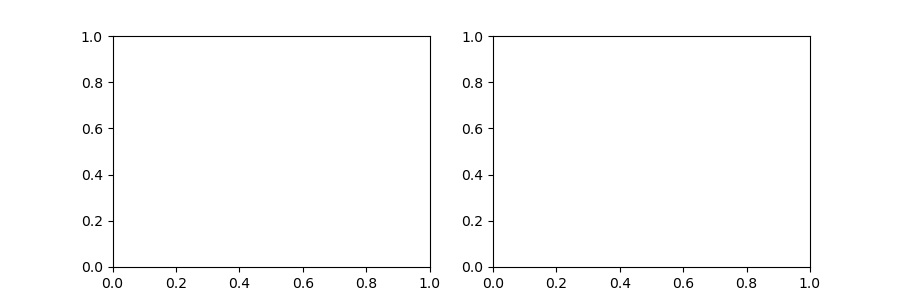

In [14]:
if "endeffector_fig" in locals():
    plt.close(endeffector_fig)
# endeffector_fig = plt.figure()
# endeffector_ax = endeffector_fig.gca()

SHOW_ANIMATION = False

plt.ion()
if not SHOW_ANIMATION:
    endeffector_fig, endeffector_ax = plt.subplots(1, 2, figsize=[9, 3])
else:
    endeffector_fig = plt.figure(figsize=[9, 9])
    endeffector_ax = []
    for i in range(1):
        endeffector_ax.append(endeffector_fig.add_subplot(1, 1, i + 1, projection='3d'))

In [763]:
trajectories_SIMULATION.get_statistics_info()

trajectories_SIMULATION.init_val

array([ 0.55   , -0.19947,  0.11228])

In [927]:
for axis in endeffector_ax:
    axis.clear()
endeffector_fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.26, hspace=0.2)

####
MINJERK_USER_CONSTRAINTS = True

# WHICH/HOW MANY MOVS?
TRIAL_IDS = [0,1,2,3,4]  #corresponds to target IDs if AGGREGATE_TRIALS==True, else trial IDs; either a list of indices, None, or "different_target_sizes" (in the latter two cases, N_MOVS is used)
N_MOVS = 4 #number of movements to visualize (only used, if TRIAL_IDS is not a list of indices)

# WHAT TO PLOT?
PLOT_ENDEFFECTOR = True  #if True plot End-effector position and velocity, else plot qpos and qvel for joint with index JOINT_ID (see independent_joints below)
JOINT_ID = 0  #only used if PLOT_ENDEFFECTOR == False
PLOT_DEVIATION = True

# HOW TO PLOT?
NORMALIZE_TIME = False
PLOT_TIME_SERIES = True  #if True plot Position and Velocity Time Series, else plot Phasespace and Hooke plots
CONF_LEVEL = "min/max"  # might be between 0 and 1, or "min/max"; only used if EPISODE_ID == "VARIABLE"

# WHICH BASELINE?
SHOW_MINJERK = False
SHOW_STUDY = True

#SHOW_ANIMATION (defined above)
####    


if EPISODE_ID == "VARIABLE":
    #assert REPEATED_MOVEMENTS, "ERROR: Check code dependencies..."
    assert PLOT_TIME_SERIES, "Plotting distributions (e.g., as CI or min/max-ranges) of Phasepace/Hooke profiles is not implemented yet."

if PLOT_DEVIATION:
    assert PLOT_TIME_SERIES, "Deviation should be plotted as Time Series, not as Phasespace/Hooke plots."
    assert PLOT_ENDEFFECTOR, "Deviation can only be plotted for end-effector projections, not for (scalar) joint angle/velocity values."

if REPEATED_MOVEMENTS:
    #assert RADIUS_ID == "ALL"
    assert PLOT_TIME_SERIES, "Plotting distributions (e.g., as CI or min/max-ranges) of Phasepace/Hooke profiles is not implemented yet."
    assert not SHOW_STUDY, "Cannot plot data from user study together with simulation data for different radii."
    
if SHOW_MINJERK:
    assert not SHOW_STUDY, "Cannot currently plot both minjerk and user study trajectories as reference."
    

# Define trajectory sets to plot:
trajectories_SIMULATION.compute_indices(TRIAL_IDS=TRIAL_IDS, N_MOVS=N_MOVS)  #RL
trajectories_SIMULATION.SHOW_MINJERK = False
trajectories_info = [(trajectories_SIMULATION, {'linestyle': '-', 'label': 'Simulation'}, {'alpha': 0.2}, "")]  #contains tuples consisting of 1. a TrajectoryData instance, 2. a dict with plotting kwargs for regular (line) plots, 3. a dict with plotting kwargs for "fill_between" plots, and 4. a code string to execute at the beginning

# trajectories_SIMULATION.compute_indices(TRIAL_IDS=TRIAL_IDS, N_MOVS=N_MOVS)  #MPC
# trajectories_SIMULATION2.compute_indices(TRIAL_IDS=TRIAL_IDS, N_MOVS=N_MOVS)  #MPC
# trajectories_SIMULATION3.compute_indices(TRIAL_IDS=TRIAL_IDS, N_MOVS=N_MOVS)  #MPC
# trajectories_info = [(trajectories_SIMULATION, {'linestyle': '-', 'label': 'Simulation 1'}, {'alpha': 0.2, 'hatch': '\\'}, ""), (trajectories_SIMULATION2, {'linestyle': '--', 'label': 'Simulation 2'}, {'alpha': 0.2, 'hatch': '+'}, ""), (trajectories_SIMULATION3, {'linestyle': '-.', 'label': 'Simulation 3'}, {'alpha': 0.2, 'hatch': '.'}, "")]

if SHOW_STUDY:
    trajectories_STUDY.compute_indices(TRIAL_IDS=TRIAL_IDS, N_MOVS=N_MOVS)
    trajectories_info.append((trajectories_STUDY, {'linestyle': '-.', 'label': 'Study'}, {'alpha': 0.2}, ""))

if SHOW_MINJERK:
    trajectories_SIMULATION.compute_minjerk(MINJERK_USER_CONSTRAINTS=MINJERK_USER_CONSTRAINTS)
    trajectories_info.append((trajectories_SIMULATION, {'linestyle': '--', 'label': 'MinJerk'}, {'alpha': 0.2}, "trajectories.SHOW_MINJERK = True"))

## ANALYSIS OF POINTING TASKS -> Use trajectories projections onto direct path between initial and (fixed) target position
if not SHOW_ANIMATION:
    if PLOT_DEVIATION:
        endeffector_ax[0].set_title("Position Deviation from Direct Path")
        endeffector_ax[0].set_xlabel(f"Time {'[normalized]' if NORMALIZE_TIME else '(s)'}")
        endeffector_ax[0].set_ylabel("Position Deviation (m)")

        endeffector_ax[1].set_title("Velocity Deviation from Direct Path")
        endeffector_ax[1].set_xlabel(f"Time {' [normalized]' if NORMALIZE_TIME else '(s)'}")
        endeffector_ax[1].set_ylabel("Velocity Deviation (m/s)")
    else:
        if PLOT_ENDEFFECTOR:
            if PLOT_TIME_SERIES:
                endeffector_ax[0].set_title("Projected Position Time Series")
                endeffector_ax[0].set_xlabel(f"Time {'[normalized]' if NORMALIZE_TIME else '(s)'}")
                endeffector_ax[0].set_ylabel("Position [normalized]")

                endeffector_ax[1].set_title("Projected Velocity Time Series")
                endeffector_ax[1].set_xlabel(f"Time {' [normalized]' if NORMALIZE_TIME else '(s)'}")
                endeffector_ax[1].set_ylabel("Velocity (1/s) [normalized]")
            else:
                endeffector_ax[0].set_title("Projected Phasespace Plot")
                endeffector_ax[0].set_xlabel("Position [normalized]")
                endeffector_ax[0].set_ylabel("Velocity [normalized]")

                endeffector_ax[1].set_title("Projected Hooke Plot")
                endeffector_ax[1].set_xlabel("Position [normalized]")
                endeffector_ax[1].set_ylabel("Acceleration [normalized]")
        else:            
            if PLOT_TIME_SERIES:
                endeffector_ax[0].set_title(f"Joint Angle – {independent_joints[JOINT_ID]}")
                endeffector_ax[0].set_xlabel(f"Time {'[normalized]' if NORMALIZE_TIME else '(s)'}")
                endeffector_ax[0].set_ylabel("Joint Angle (rad)")

                endeffector_ax[1].set_title(f"Joint Velocity – {independent_joints[JOINT_ID]}")
                endeffector_ax[1].set_xlabel(f"Time {' [normalized]' if NORMALIZE_TIME else '(s)'}")
                endeffector_ax[1].set_ylabel("Joint Velocity (rad/s)")
            else:
                endeffector_ax[0].set_title(f"{independent_joints[JOINT_ID]} – Phasespace Plot")
                endeffector_ax[0].set_xlabel("Joint Angle (rad)")
                endeffector_ax[0].set_ylabel("Joint Velocity (rad/s)")

                endeffector_ax[1].set_title(f"{independent_joints[JOINT_ID]} – Hooke Plot")
                endeffector_ax[1].set_xlabel("Joint Angle (rad)")
                endeffector_ax[1].set_ylabel("Joint Acceleration (rad/s^2)")

## ANALYSIS OF TRACKING TASKS -> Use 3D plots of trajectories
else:
    blue_line = Line2D([0], [0], color='tab:blue', linestyle='-', label='End-Effector')
    red_line = Line2D([0], [0], color='red', linestyle='-', label='Target')
    endeffector_ax[0].legend(handles=[blue_line, red_line])
    
    endeffector_ax[0].set_title("Position Trajectory")
    endeffector_ax[0].set_xlabel("x")
    endeffector_ax[0].set_ylabel("y")
    endeffector_ax[0].set_zlabel("z")
    ax_lims = np.vstack((np.min((np.squeeze(position_series).min(axis=0), np.squeeze(target_position_series).min(axis=0)), axis=0), np.max((np.squeeze(position_series).max(axis=0), np.squeeze(target_position_series).max(axis=0)), axis=0))).T
    # endeffector_ax[0].set_xlim(*ax_lims[0, :])
    # endeffector_ax[0].set_ylim(*ax_lims[1, :])
    # endeffector_ax[0].set_zlim(*ax_lims[2, :])
    ax_lims_centers, ax_lims_ranges = ax_lims.mean(axis=1), ax_lims@[-1, 1]
    endeffector_ax[0].set_xlim(ax_lims_centers[0] - 0.5*np.max(ax_lims_ranges), ax_lims_centers[0] + 0.5*np.max(ax_lims_ranges))
    endeffector_ax[0].set_ylim(ax_lims_centers[1] - 0.5*np.max(ax_lims_ranges), ax_lims_centers[1] + 0.5*np.max(ax_lims_ranges))
    endeffector_ax[0].set_zlim(ax_lims_centers[2] - 0.5*np.max(ax_lims_ranges), ax_lims_centers[2] + 0.5*np.max(ax_lims_ranges))

if not SHOW_ANIMATION:
    methods_handles = []
    
    for trajectories, trajectory_plotting_kwargs, range_plotting_kwargs, code_to_exec in trajectories_info:
        exec(code_to_exec)  #necessary to get MinJerk trajectories from RL-Simulation class
        
        methods_handles.append(Line2D([0], [0], color="black", **{k: v for k,v in trajectory_plotting_kwargs.items() if k != "color"}))
        
        endeffector_ax[0].set_prop_cycle(None)
        endeffector_ax[1].set_prop_cycle(None)
                
        for episode_index_current, (last_idx_hlp, current_idx_hlp, next_idx_hlp) in enumerate(trajectories.selected_movements_indices):
            if isinstance(last_idx_hlp, list):  #if EPISODE_ID == "VARIABLE"
                
                trajectories.compute_statistics(episode_index_current, compute_deviation=PLOT_DEVIATION, normalize_time=NORMALIZE_TIME)
                
#                 #compute_statistics
#                 init_val = np.unique(trajectories.target_position_series[episode_index_current][[i+1 for i in last_idx_hlp if i>=0]], axis=0).reshape(-1,)
#                 final_val = np.unique(trajectories.target_position_series[episode_index_current][[i+1 for i in current_idx_hlp if i>=0]], axis=0).reshape(-1,)
#                 assert init_val.shape == (3,), "ERROR: Cannot reliably determine (nominal) initial position."
#                 assert final_val.shape == (3,), "ERROR: Cannot reliably determine (nominal) target position."
#                 assert init_val is not final_val, "ERROR: Initial and target position do not differ!"

#                 projected_trajectories_pos_mean, projected_trajectories_pos_cov, projected_trajectories_pos_min, projected_trajectories_pos_max = compute_trajectory_statistics(trajectories.position_series[episode_index_current], current_idx_hlp, next_idx_hlp, project=True, init_val=init_val, final_val=final_val, use_rel_vals=True, output_deviation=PLOT_DEVIATION)
#                 projected_trajectories_vel_mean, projected_trajectories_vel_cov, projected_trajectories_vel_min, projected_trajectories_vel_max = compute_trajectory_statistics(trajectories.velocity_series[episode_index_current], current_idx_hlp, next_idx_hlp, project=True, init_val=init_val, final_val=final_val, use_rel_vals=False, output_deviation=PLOT_DEVIATION)
#                 projected_trajectories_acc_mean, projected_trajectories_acc_cov, projected_trajectories_acc_min, projected_trajectories_acc_max = compute_trajectory_statistics(trajectories.acceleration_series[episode_index_current], current_idx_hlp, next_idx_hlp, project=True, init_val=init_val, final_val=final_val, use_rel_vals=False, output_deviation=PLOT_DEVIATION)
#                 qpos_series_mean, qpos_series_cov, qpos_series_min, qpos_series_max = compute_trajectory_statistics(trajectories.qpos_series[episode_index_current], current_idx_hlp, next_idx_hlp)
#                 qvel_series_mean, qvel_series_cov, qvel_series_min, qvel_series_max = compute_trajectory_statistics(trajectories.qvel_series[episode_index_current], current_idx_hlp, next_idx_hlp)
#                 qacc_series_mean, qacc_series_cov, qacc_series_min, qacc_series_max = compute_trajectory_statistics(trajectories.qacc_series[episode_index_current], current_idx_hlp, next_idx_hlp)
#                 target_pos_mean, target_pos_cov, _, _ = compute_trajectory_statistics(trajectories.target_position_series[episode_index_current], current_idx_hlp, next_idx_hlp)
#                 target_radius_mean, target_radius_cov, _, _ = compute_trajectory_statistics(trajectories.target_radius_series[episode_index_current], current_idx_hlp, next_idx_hlp)
#                 target_idx_mean, target_idx_cov, _, _ = compute_trajectory_statistics(trajectories.target_idx_series[episode_index_current], current_idx_hlp, next_idx_hlp)
#                 target_idx_mean = target_idx_mean.astype(int)
#                 _, time_series_cov, time_series_extended, _ = compute_trajectory_statistics(trajectories.time_series[episode_index_current], current_idx_hlp, next_idx_hlp, rel_to_init=True, normalize=NORMALIZE_TIME)
#                 if not NORMALIZE_TIME and not np.isclose(time_series_cov, 0).all():
#                     raise ValueError(f"ERROR: Ensure that time series are correctly aligned.")

                if PLOT_TIME_SERIES:
                    ### POSITION PLOT
                    latest_plot, = endeffector_ax[0].plot(trajectories.time_series_extended, trajectories.projected_trajectories_pos_mean if PLOT_ENDEFFECTOR else trajectories.qpos_series_mean[:, JOINT_ID], label=f'W={2*trajectories.target_radius_mean[0]:.2g}' if (RADIUS_ID == "ALL" and REPEATED_MOVEMENTS) else f'T{trajectories.target_idx_mean[0]}' if not np.isnan(trajectories.target_idx_mean).all() else None, **{k: v for k,v in trajectory_plotting_kwargs.items() if k != "label"})

                    if trajectories.AGGREGATE_TRIALS:
                        if CONF_LEVEL == "min/max":
                            # add min/max bounds
                            endeffector_ax[0].fill_between(trajectories.time_series_extended, trajectories.projected_trajectories_pos_min if PLOT_ENDEFFECTOR else trajectories.qpos_series_min[:, JOINT_ID], trajectories.projected_trajectories_pos_max if PLOT_ENDEFFECTOR else trajectories.qpos_series_max[:, JOINT_ID], color=latest_plot.get_color(), **{k: v for k,v in range_plotting_kwargs.items() if k != "color"})
                        else:
                            # add confidence interval bounds
                            if PLOT_DEVIATION:
                                raise NotImplementedError("ERROR: Not sure if it makes sense to plot difference between projected standard deviation and direct path...")
                            projected_or_joint_trajectories_pos_std =  np.sqrt(trajectories.projected_trajectories_pos_cov if PLOT_ENDEFFECTOR else trajectories.qpos_series_cov[:, JOINT_ID])
                            endeffector_ax[0].fill_between(trajectories.time_series_extended, (trajectories.projected_trajectories_pos_mean if PLOT_ENDEFFECTOR else trajectories.qpos_series_mean[:, JOINT_ID]) - stats.norm.ppf((CONF_LEVEL + 1)/2) * projected_or_joint_trajectories_pos_std, (trajectories.projected_trajectories_pos_mean if PLOT_ENDEFFECTOR else trajectories.qpos_series_mean[:, JOINT_ID]) + stats.norm.ppf((CONF_LEVEL + 1)/2) * projected_or_joint_trajectories_pos_std, color=latest_plot.get_color(), **{k: v for k,v in range_plotting_kwargs.items() if k != "color"})

                        # display lower bound of target area (i.e., target center - target radius) in projected position plot
                        if (not PLOT_DEVIATION) and PLOT_ENDEFFECTOR:
                            #TODO: modify init_val, final_val!
                            target_radius_normalized = trajectories.target_radius_mean[0]/np.linalg.norm(trajectories.final_val-trajectories.init_val)   #relative (i.e., normalized) target radius
                            target_area_boundary_projected = 1 - target_radius_normalized
                            endeffector_ax[0].axhline(target_area_boundary_projected, linestyle='--', color=latest_plot.get_color(), alpha=.2)

                    ### VELOCITY PLOT
                    latest_plot, = endeffector_ax[1].plot(trajectories.time_series_extended, trajectories.projected_trajectories_vel_mean if PLOT_ENDEFFECTOR else trajectories.qvel_series_mean[:, JOINT_ID], label=f'W={2*trajectories.target_radius_mean[0]:.2g}' if (RADIUS_ID == "ALL" and REPEATED_MOVEMENTS) else f'T{trajectories.target_idx_mean[0]}' if not np.isnan(trajectories.target_idx_mean).all() else None, **{k: v for k,v in trajectory_plotting_kwargs.items() if k != "label"})

                    if trajectories.AGGREGATE_TRIALS:
                        if CONF_LEVEL == "min/max":
                            # add min/max bounds
                            endeffector_ax[1].fill_between(trajectories.time_series_extended, trajectories.projected_trajectories_vel_min if PLOT_ENDEFFECTOR else trajectories.qvel_series_min[:, JOINT_ID], trajectories.projected_trajectories_vel_max if PLOT_ENDEFFECTOR else trajectories.qvel_series_max[:, JOINT_ID], color=latest_plot.get_color(), **{k: v for k,v in range_plotting_kwargs.items() if k != "color"})
                        else:
                            # add confidence interval bounds
                            projected_or_joint_trajectories_vel_std =  np.sqrt(trajectories.projected_trajectories_vel_cov if PLOT_ENDEFFECTOR else trajectories.qvel_series_cov[:, JOINT_ID])
                            endeffector_ax[1].fill_between(trajectories.time_series_extended, (trajectories.projected_trajectories_vel_mean if PLOT_ENDEFFECTOR else trajectories.qvel_series_mean[:, JOINT_ID]) - stats.norm.ppf((CONF_LEVEL + 1)/2) * projected_or_joint_trajectories_vel_std, (trajectories.projected_trajectories_vel_mean if PLOT_ENDEFFECTOR else trajectories.qvel_series_mean[:, JOINT_ID]) + stats.norm.ppf((CONF_LEVEL + 1)/2) * projected_or_joint_trajectories_vel_std, color=latest_plot.get_color(), **{k: v for k,v in range_plotting_kwargs.items() if k != "color"})
                else:
                    ### PHASESPACE PLOT
                    latest_plot, = endeffector_ax[0].plot(trajectories.projected_trajectories_pos_mean if PLOT_ENDEFFECTOR else trajectories.qpos_series_mean[:, JOINT_ID], trajectories.projected_trajectories_vel_mean if PLOT_ENDEFFECTOR else trajectories.qvel_series_mean[:, JOINT_ID], label=f'W={2*trajectories.target_radius_mean[0]:.2g}' if (RADIUS_ID == "ALL" and REPEATED_MOVEMENTS) else f'T{trajectories.target_idx_mean[0]}' if not np.isnan(trajectories.target_idx_mean).all() else None, **{k: v for k,v in trajectory_plotting_kwargs.items() if k != "label"})

                    if AGGREGATE_TRIALS:
                        raise NotImplementedError("""Can show distribution of aggregated trials only if PLOT_TIME_SERIES == True.""")

                    ### HOOKE PLOT
                    latest_plot, = endeffector_ax[1].plot(trajectories.projected_trajectories_pos_mean if PLOT_ENDEFFECTOR else trajectories.qpos_series_mean[:, JOINT_ID], trajectories.projected_trajectories_acc_mean if PLOT_ENDEFFECTOR else trajectories.qacc_series_mean[:, JOINT_ID], label=f'W={2*trajectories.target_radius_mean[0]:.2g}' if (RADIUS_ID == "ALL" and REPEATED_MOVEMENTS) else f'T{trajectories.target_idx_mean[0]}' if not np.isnan(trajectories.target_idx_mean).all() else None, **{k: v for k,v in trajectory_plotting_kwargs.items() if k != "label"})

                    if AGGREGATE_TRIALS:
                        raise NotImplementedError("""Can show distribution of aggregated trials only if PLOT_TIME_SERIES == True.""")

            else:
                trajectories.compute_trial(episode_index_current, compute_deviation=PLOT_DEVIATION, normalize_time=NORMALIZE_TIME)
                projected_or_joint_trajectory_pos = trajectories.projected_trajectories_pos_trial if PLOT_ENDEFFECTOR else trajectories.qpos_series_trial[:, JOINT_ID]
                projected_or_joint_trajectory_vel = trajectories.projected_trajectories_vel_trial if PLOT_ENDEFFECTOR else trajectories.qvel_series_trial[:, JOINT_ID]
                projected_or_joint_trajectory_acc = trajectories.projected_trajectories_acc_trial if PLOT_ENDEFFECTOR else trajectories.qacc_series_trial[:, JOINT_ID]

#                 last_idx, current_idx, next_idx = last_idx_hlp, current_idx_hlp, next_idx_hlp
#                 time_series_shifted = np.array(trajectories.time_series[current_idx: next_idx]) - trajectories.time_series[current_idx]
#                 if NORMALIZE_TIME:
#                     time_series_shifted = (time_series_shifted - time_series_shifted[0])/(time_series_shifted[-1] - time_series_shifted[0])

#                 # if REPEATED_MOVEMENTS and (RADIUS_ID == "ALL"):            
#                 #     init_val=position_series[current_idx]
#                 # else:
#                 #     init_val=target_position_series[last_idx] if last_idx >= 0 else position_series[0]
#                 # final_val=target_position_series[current_idx + 1] #or position_series[next_idx - 1]
#                 init_val = trajectories.target_position_series[last_idx + 1] if last_idx >= 0 else trajectories.position_series[0]
#                 final_val = trajectories.target_position_series[current_idx + 1]
                
#                 projected_or_joint_trajectory_pos = project_trajectory(trajectories.position_series[current_idx: next_idx], init_val=init_val, final_val=final_val, use_rel_vals=True, output_deviation=PLOT_DEVIATION) if PLOT_ENDEFFECTOR else trajectories.qpos_series[current_idx: next_idx, JOINT_ID]
#                 projected_or_joint_trajectory_vel = project_trajectory(trajectories.velocity_series[current_idx: next_idx], init_val=init_val, final_val=final_val, use_rel_vals=False, output_deviation=PLOT_DEVIATION) if PLOT_ENDEFFECTOR else trajectories.qvel_series[current_idx: next_idx, JOINT_ID]
#                 projected_or_joint_trajectory_acc = project_trajectory(trajectories.acceleration_series[current_idx: next_idx], init_val=init_val, final_val=final_val, use_rel_vals=False, output_deviation=PLOT_DEVIATION) if PLOT_ENDEFFECTOR else trajectories.qacc_series[current_idx: next_idx, JOINT_ID]

                ## for interchangeability between projection and covariance, see https://math.stackexchange.com/a/2576783
                if PLOT_TIME_SERIES:
                    ### POSITION PLOT
                    latest_plot, = endeffector_ax[0].plot(trajectories.time_series_trial, projected_or_joint_trajectory_pos, label=f'W={2*trajectories.target_radius_series_trial[0]:.2g}' if (RADIUS_ID == "ALL" and REPEATED_MOVEMENTS) else f'T{trajectories.target_idx_series_trial[0]}' if not np.isnan(trajectories.target_idx_series).all() else None, **{k: v for k,v in trajectory_plotting_kwargs.items() if k != "label"})
                    
                    ### VELOCITY PLOT
                    latest_plot, = endeffector_ax[1].plot(trajectories.time_series_trial, projected_or_joint_trajectory_vel, label=f'W={2*trajectories.target_radius_series_trial[0]:.2g}' if (RADIUS_ID == "ALL" and REPEATED_MOVEMENTS) else f'T{trajectories.target_idx_series_trial[0]}' if not np.isnan(trajectories.target_idx_series).all() else None, **{k: v for k,v in trajectory_plotting_kwargs.items() if k != "label"})

                else:
                    ### PHASESPACE PLOT
                    latest_plot, = endeffector_ax[0].plot(projected_or_joint_trajectory_pos, projected_or_joint_trajectory_vel, label=f'W={2*trajectories.target_radius_series_trial[0]:.2g}' if (RADIUS_ID == "ALL" and REPEATED_MOVEMENTS) else f'T{trajectories.target_idx_series_trial[0]}' if not np.isnan(trajectories.target_idx_series).all() else None, **{k: v for k,v in trajectory_plotting_kwargs.items() if k != "label"})

                    ### HOOKE PLOT
                    latest_plot, = endeffector_ax[1].plot(projected_or_joint_trajectory_pos, projected_or_joint_trajectory_acc, label=f'W={2*trajectories.target_radius_series_trial[0]:.2g}' if (RADIUS_ID == "ALL" and REPEATED_MOVEMENTS) else f'T{trajectories.target_idx_series_trial[0]}' if not np.isnan(trajectories.target_idx_series).all() else None, **{k: v for k,v in trajectory_plotting_kwargs.items() if k != "label"})
            
        # for episode_index_current, (last_idx_hlp, current_idx_hlp, next_idx_hlp) in enumerate(trajectories.selected_movements_indices):
        #     ## REFERENCE TRAJECTORY: MinJerk
        #     if SHOW_MINJERK:
        #         if (REPEATED_MOVEMENTS and (RADIUS_ID == "ALL")) or (not PLOT_ENDEFFECTOR): 
        #             pass # do not show Minimum Jerk trajectory
        #         else:
        #             if MINJERK_USER_CONSTRAINTS:
        #                 T = [np.concatenate((trajectories.position_series[current_idx], trajectories.position_series[next_idx - 1]))]
        #             else:
        #                 T = [np.squeeze([trajectories.target_position_series[last_idx] if last_idx >= 0 else trajectories.position_series[0], trajectories.target_position_series[current_idx]]).reshape(-1,)]
        #             x0 = np.concatenate((np.squeeze([trajectories.position_series[current_idx], trajectories.velocity_series[current_idx], trajectories.acceleration_series[current_idx]]).reshape(-1,), T[0]))
        #             dim = 3
        #             x_minjerk, u_minjerk = minimumjerk_deterministic(next_idx - current_idx - 1, x0=x0, T=T, final_vel=trajectories.velocity_series[next_idx - 1], final_acc=trajectories.acceleration_series[next_idx - 1], P=2, dim=dim, dt=trajectories.time_per_step, initialuservalues=None)
        #             x_minjerk_pos = x_minjerk[:, :dim]
        #             x_minjerk_vel = x_minjerk[:, dim:2*dim]
        #             x_minjerk_acc = x_minjerk[:, 2*dim:3*dim]
        #             if "tracking" not in filepath:
        #                 init_val = trajectories.target_position_series[last_idx] if last_idx >= 0 else trajectories.position_series[0]
        #                 final_val = trajectories.target_position_series[current_idx + 1]
        #                 projected_minjerk_trajectory_pos = project_trajectory(x_minjerk_pos, init_val=init_val, final_val=final_val, use_rel_vals=True, output_deviation=PLOT_DEVIATION)
        #                 projected_minjerk_trajectory_vel = project_trajectory(x_minjerk_vel, init_val=init_val, final_val=final_val, use_rel_vals=False, output_deviation=PLOT_DEVIATION)
        #                 projected_minjerk_trajectory_acc = project_trajectory(x_minjerk_acc, init_val=init_val, final_val=final_val, use_rel_vals=False, output_deviation=PLOT_DEVIATION)
        #                 if PLOT_TIME_SERIES:
        #                     endeffector_ax[0].plot(time_series_shifted, projected_minjerk_trajectory_pos, linewidth=1.5, color=latest_plot.get_color(), linestyle="--")
        #                     endeffector_ax[1].plot(time_series_shifted, projected_minjerk_trajectory_vel, linewidth=1.5, color=latest_plot.get_color(), linestyle="--")
        #                 else:
        #                     endeffector_ax[0].plot(projected_minjerk_trajectory_pos, projected_minjerk_trajectory_vel, linewidth=1.5, color=latest_plot.get_color(), linestyle="--")
        #                     endeffector_ax[1].plot(projected_minjerk_trajectory_pos, projected_minjerk_trajectory_acc, linewidth=1.5, color=latest_plot.get_color(), linestyle="--")
        #             else:
        #                 pass
                
    trajectories_SIMULATION.SHOW_MINJERK = False

#     ## REFERENCE TRAJECTORY: User Study ("NewExperimentForCHI")
#     if SHOW_STUDY:
        
#         endeffector_ax[0].set_prop_cycle(None)
#         endeffector_ax[1].set_prop_cycle(None)
        
#         for movement_direction_ID_study, (last_idx_hlp, current_idx_hlp, next_idx_hlp) in enumerate(trajectories.selected_movements_indices):
#             if isinstance(last_idx_hlp, list):  #if AGGREGATE_TRIALS
#                 init_val_STUDY = np.unique(trajectories.target_position_series[[i+1 for i in last_idx_hlp if i>=0]], axis=0).reshape(-1,)
#                 final_val_STUDY = np.unique(trajectories.target_position_series[[i+1 for i in current_idx_hlp if i>=0]], axis=0).reshape(-1,)
#                 assert init_val_STUDY.shape == (3,), "ERROR: Cannot reliably determine (nominal) initial position."
#                 assert final_val_STUDY.shape == (3,), "ERROR: Cannot reliably determine (nominal) target position."
#                 assert init_val_STUDY is not final_val_STUDY, "ERROR: Initial and target position do not differ!"

#                 projected_trajectories_pos_mean_STUDY, projected_trajectories_pos_cov_STUDY, projected_trajectories_pos_min_STUDY, projected_trajectories_pos_max_STUDY = compute_trajectory_statistics(trajectories.position_series, current_idx_hlp, next_idx_hlp, project=True, init_val=init_val_STUDY, final_val=final_val_STUDY, use_rel_vals=True, output_deviation=PLOT_DEVIATION)
#                 projected_trajectories_vel_mean_STUDY, projected_trajectories_vel_cov_STUDY, projected_trajectories_vel_min_STUDY, projected_trajectories_vel_max_STUDY = compute_trajectory_statistics(trajectories.velocity_series, current_idx_hlp, next_idx_hlp, project=True, init_val=init_val_STUDY, final_val=final_val_STUDY, use_rel_vals=False, output_deviation=PLOT_DEVIATION)
#                 projected_trajectories_acc_mean_STUDY, projected_trajectories_acc_cov_STUDY, projected_trajectories_acc_min_STUDY, projected_trajectories_acc_max_STUDY = compute_trajectory_statistics(trajectories.acceleration_series, current_idx_hlp, next_idx_hlp, project=True, init_val=init_val_STUDY, final_val=final_val_STUDY, use_rel_vals=False, output_deviation=PLOT_DEVIATION)
#                 qpos_series_mean_STUDY, qpos_series_cov_STUDY, qpos_series_min_STUDY, qpos_series_max_STUDY = compute_trajectory_statistics(trajectories.qpos_series, current_idx_hlp, next_idx_hlp)
#                 qvel_series_mean_STUDY, qvel_series_cov_STUDY, qvel_series_min_STUDY, qvel_series_max_STUDY = compute_trajectory_statistics(trajectories.qvel_series, current_idx_hlp, next_idx_hlp)
#                 qacc_series_mean_STUDY, qacc_series_cov_STUDY, qacc_series_min_STUDY, qacc_series_max_STUDY = compute_trajectory_statistics(trajectories.qacc_series, current_idx_hlp, next_idx_hlp)
#                 target_pos_mean_STUDY, target_pos_cov_STUDY, _, _ = compute_trajectory_statistics(trajectories.target_position_series, current_idx_hlp, next_idx_hlp)
#                 target_radius_mean_STUDY, target_radius_cov_STUDY, _, _ = compute_trajectory_statistics(trajectories.target_radius_series, current_idx_hlp, next_idx_hlp)
#                 target_idx_mean_STUDY, target_idx_cov_STUDY, _, _ = compute_trajectory_statistics(trajectories.target_idx_series, current_idx_hlp, next_idx_hlp)
#                 target_idx_mean_STUDY = target_idx_mean_STUDY.astype(int)
#                 _, time_series_cov_STUDY, time_series_extended_STUDY, _ = compute_trajectory_statistics(trajectories.time_series, current_idx_hlp, next_idx_hlp, rel_to_init=True, normalize=NORMALIZE_TIME)
#                 #if not NORMALIZE_TIME and not np.isclose(time_series_cov_STUDY, 0).all():
#                 #    raise ValueError(f"ERROR: Ensure that time series are correctly aligned.")
                    
#                 if PLOT_TIME_SERIES:
#                     ### POSITION PLOT
#                     latest_plot, = endeffector_ax[0].plot(time_series_extended_STUDY, projected_trajectories_pos_mean_STUDY if PLOT_ENDEFFECTOR else qpos_series_mean_STUDY[:, JOINT_ID], linestyle="-.") #, label=f'T{target_idx_mean_STUDY[0]}' if not np.isnan(target_idx_mean_STUDY).all() else None)

#                     if EPISODE_ID == "VARIABLE":
#                         if CONF_LEVEL == "min/max":
#                             # add min/max bounds
#                             endeffector_ax[0].fill_between(time_series_extended_STUDY, projected_trajectories_pos_min_STUDY if PLOT_ENDEFFECTOR else qpos_series_min_STUDY[:, JOINT_ID], projected_trajectories_pos_max_STUDY if PLOT_ENDEFFECTOR else qpos_series_max_STUDY[:, JOINT_ID], color=latest_plot.get_color(), alpha=.2)
#                         else:
#                             # add confidence interval bounds
#                             if PLOT_DEVIATION:
#                                 raise NotImplementedError("ERROR: Not sure if it makes sense to plot difference between projected standard deviation and direct path...")
#                             projected_or_joint_trajectories_pos_std_STUDY =  np.sqrt(projected_trajectories_pos_cov_STUDY if PLOT_ENDEFFECTOR else qpos_series_cov_STUDY[:, JOINT_ID])
#                             endeffector_ax[0].fill_between(time_series_extended_STUDY, (projected_trajectories_pos_mean_STUDY if PLOT_ENDEFFECTOR else qpos_series_mean_STUDY[:, JOINT_ID]) - stats.norm.ppf((CONF_LEVEL + 1)/2) * projected_or_joint_trajectories_pos_std_STUDY, (projected_trajectories_pos_mean_STUDY if PLOT_ENDEFFECTOR else qpos_series_mean_STUDY[:, JOINT_ID]) + stats.norm.ppf((CONF_LEVEL + 1)/2) * projected_or_joint_trajectories_pos_std_STUDY, color=latest_plot.get_color(), alpha=.2)

#                         # display lower bound of target area (i.e., target center - target radius) in projected position plot
#                         if (not PLOT_DEVIATION) and PLOT_ENDEFFECTOR:
#                             #TODO: modify init_val, final_val!
#                             target_radius_normalized_STUDY = target_radius_mean_STUDY[0]/np.linalg.norm(final_val_STUDY-init_val_STUDY)   #relative (i.e., normalized) target radius
#                             target_area_boundary_projected_STUDY = 1 - target_radius_normalized_STUDY
#                             endeffector_ax[0].axhline(target_area_boundary_projected_STUDY, linestyle='--', color=latest_plot.get_color(), alpha=.2)

#                     ### VELOCITY PLOT
#                     latest_plot, = endeffector_ax[1].plot(time_series_extended_STUDY, projected_trajectories_vel_mean_STUDY if PLOT_ENDEFFECTOR else qvel_series_mean_STUDY[:, JOINT_ID], linestyle="-.") #, label=f'T{target_idx_mean_STUDY[0]}' if not np.isnan(target_idx_mean_STUDY).all() else None)
                    
#                     if EPISODE_ID == "VARIABLE":
#                         if CONF_LEVEL == "min/max":
#                             # add min/max bounds
#                             endeffector_ax[1].fill_between(time_series_extended_STUDY, projected_trajectories_vel_min_STUDY if PLOT_ENDEFFECTOR else qvel_series_min_STUDY[:, JOINT_ID], projected_trajectories_vel_max_STUDY if PLOT_ENDEFFECTOR else qvel_series_max_STUDY[:, JOINT_ID], color=latest_plot.get_color(), alpha=.2)
#                         else:
#                             # add confidence interval bounds
#                             projected_or_joint_trajectories_vel_std_STUDY =  np.sqrt(projected_trajectories_vel_cov_STUDY if PLOT_ENDEFFECTOR else qvel_series_cov_STUDY[:, JOINT_ID])
#                             endeffector_ax[1].fill_between(time_series_extended_STUDY, (projected_trajectories_vel_mean_STUDY if PLOT_ENDEFFECTOR else qvel_series_mean_STUDY[:, JOINT_ID]) - stats.norm.ppf((CONF_LEVEL + 1)/2) * projected_or_joint_trajectories_vel_std_STUDY, (projected_trajectories_vel_mean_STUDY if PLOT_ENDEFFECTOR else qvel_series_mean_STUDY[:, JOINT_ID]) + stats.norm.ppf((CONF_LEVEL + 1)/2) * projected_or_joint_trajectories_vel_std_STUDY, color=latest_plot.get_color(), alpha=.2)
#                 else:
#                     ### PHASESPACE PLOT
#                     latest_plot, = endeffector_ax[0].plot(projected_trajectories_pos_mean_STUDY if PLOT_ENDEFFECTOR else qpos_series_mean_STUDY[:, JOINT_ID], projected_trajectories_vel_mean_STUDY if PLOT_ENDEFFECTOR else qvel_series_mean_STUDY[:, JOINT_ID], linestyle="-.") #, label=f'T{target_idx_mean_STUDY[0]}' if not np.isnan(target_idx_mean_STUDY).all() else None)
#                     if EPISODE_ID == "VARIABLE":
#                         raise NotImplementedError("""EPISODE_ID == "VARIABLE" can only be used with PLOT_TIME_SERIES == True.""")

#                     ### HOOKE PLOT
#                     latest_plot, = endeffector_ax[1].plot(projected_trajectories_pos_mean_STUDY if PLOT_ENDEFFECTOR else qpos_series_mean_STUDY[:, JOINT_ID], projected_trajectories_acc_mean_STUDY if PLOT_ENDEFFECTOR else qacc_series_mean_STUDY[:, JOINT_ID], linestyle="-.") #, label=f'T{target_idx_mean_STUDY[0]}' if not np.isnan(target_idx_mean_STUDY).all() else None)

#                     if EPISODE_ID == "VARIABLE":
#                         raise NotImplementedError("""EPISODE_ID == "VARIABLE" can only be used with PLOT_TIME_SERIES == True.""")

#             else:
#                 last_idx, current_idx, next_idx = last_idx_hlp, current_idx_hlp, next_idx_hlp
#                 time_series_shifted_STUDY = np.array(trajectories.time_series[current_idx: next_idx]) - trajectories.time_series[current_idx]
#                 if NORMALIZE_TIME:
#                     time_series_shifted_STUDY = (time_series_shifted_STUDY - time_series_shifted_STUDY[0])/(time_series_shifted_STUDY[-1] - time_series_shifted_STUDY[0])
            
#                 if PLOT_ENDEFFECTOR:
#                     init_val_STUDY = trajectories.target_position_series[last_idx] if last_idx >= 0 else trajectories.position_series[0]
#                     final_val_STUDY = trajectories.target_position_series[current_idx + 1]
        
#                     projected_STUDY_trajectory_pos = project_trajectory(trajectories.position_series[current_idx: next_idx], init_val=init_val_STUDY, final_val=final_val_STUDY, use_rel_vals=True, output_deviation=PLOT_DEVIATION)
#                     projected_STUDY_trajectory_vel = project_trajectory(trajectories.velocity_series[current_idx: next_idx], init_val=init_val_STUDY, final_val=final_val_STUDY, use_rel_vals=False, output_deviation=PLOT_DEVIATION)
#                     projected_STUDY_trajectory_acc = project_trajectory(trajectories.acceleration_series[current_idx: next_idx], init_val=init_val_STUDY, final_val=final_val_STUDY, use_rel_vals=False, output_deviation=PLOT_DEVIATION)
#                 if PLOT_TIME_SERIES:
#                     endeffector_ax[0].plot(time_series_shifted_STUDY, projected_STUDY_trajectory_pos if PLOT_ENDEFFECTOR else trajectories.qpos_series[current_idx: next_idx, JOINT_ID], linewidth=1.5, linestyle="-.") #, color=latest_plot.get_color())
#                     endeffector_ax[1].plot(time_series_shifted_STUDY, projected_STUDY_trajectory_vel if PLOT_ENDEFFECTOR else trajectories.qvel_series[current_idx: next_idx, JOINT_ID], linewidth=1.5, linestyle="-.") #, color=latest_plot.get_color())
#                 else:
#                     endeffector_ax[0].plot(projected_STUDY_trajectory_pos if PLOT_ENDEFFECTOR else trajectories.qpos_series[current_idx: next_idx, JOINT_ID], projected_STUDY_trajectory_vel if PLOT_ENDEFFECTOR else trajectories.qvel_series[current_idx: next_idx, JOINT_ID], linewidth=1.5, linestyle="-.") #, color=latest_plot.get_color())
#                     endeffector_ax[1].plot(projected_STUDY_trajectory_pos if PLOT_ENDEFFECTOR else trajectories.qpos_series[current_idx: next_idx, JOINT_ID], projected_STUDY_trajectory_acc if PLOT_ENDEFFECTOR else trajectories.qacc_series[current_idx: next_idx, JOINT_ID], linewidth=1.5, linestyle="-.") #, color=latest_plot.get_color())
    
    #if SHOW_DIFFERENT_TARGET_SIZES or (RADIUS_ID == "ALL" and REPEATED_MOVEMENTS) or "target_idx" in (list(trajectories_SIMULATION.data.values())[0].keys() if isinstance(trajectories_SIMULATION.data, dict) else trajectories_SIMULATION.data.columns):
        # axis 0 legend
    confidence_interval_handle = Patch(facecolor='grey', alpha=.2, label='Range' if CONF_LEVEL == "min/max" else f'{100*CONF_LEVEL}%-CI')

    # if SHOW_MINJERK:
    #     endeffector_ax[0].legend(handles=[solid_line, dashed_line])
    # elif SHOW_STUDY:
    #     endeffector_ax[0].legend(handles=[solid_line, dashdotted_line])
    # else:
    #     endeffector_ax[0].legend(handles=[solid_line])

    handles, labels = endeffector_ax[0].get_legend_handles_labels()
    
    # remove duplicate entries
    handles = [handle for idx, (handle, label) in enumerate(zip(handles, labels)) if labels.index(label) == idx]
    labels = [label for idx, label in enumerate(labels) if labels.index(label) == idx]
    
    if EPISODE_ID == "VARIABLE":  #if trajectories.AGGREGATE_TRIALS:
        handles.insert(0, confidence_interval_handle)
    # if (REPEATED_MOVEMENTS and (RADIUS_ID == "ALL")):  #ignore handle for dashed MinJerk trajectory, as this is not shown in this case
    #     endeffector_ax[0].legend(handles=handles)
    # elif SHOW_MINJERK:
    #     endeffector_ax[0].legend(handles=[solid_line, dashed_line]+handles)
    # elif SHOW_STUDY:
    #     endeffector_ax[0].legend(handles=[solid_line, dashdotted_line]+handles)
    # else:
    #     endeffector_ax[0].legend(handles=handles)
    if len(methods_handles) == 1:
        methods_handles = []
    endeffector_ax[0].legend(handles=methods_handles+handles)

    # axis 1 legend
    handles, labels = endeffector_ax[1].get_legend_handles_labels()
    
    # remove duplicate entries
    handles = [handle for idx, (handle, label) in enumerate(zip(handles, labels)) if labels.index(label) == idx]
    labels = [label for idx, label in enumerate(labels) if labels.index(label) == idx]
    
    if EPISODE_ID == "VARIABLE":  #if trajectories.AGGREGATE_TRIALS:
        handles.insert(0, confidence_interval_handle)
    endeffector_ax[1].legend(handles=handles)

    if REPEATED_MOVEMENTS: 
        endeffector_fig.savefig(f"plots/{filename}/proj_{trajectories_SIMULATION.data_key}.png", dpi=120)
    else:
        endeffector_fig.savefig(f"plots/{filename}/proj_movements_vs_minjerk.png", dpi=120)
else:
    plt.ioff()

    assert len(trajectories.position_series) == len(trajectories.target_position_series)
    
    position_series = np.squeeze(trajectories.position_series)
    target_position_series = np.squeeze(trajectories.target_position_series)
    target_radius_series = np.squeeze(trajectories.target_radius_series)
    
    target_radius = trajectories.target_radius_series[0]
    
    def drawSphere(xCenter, yCenter, zCenter, r):
        #draw sphere
        u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
        x=np.cos(u)*np.sin(v)
        y=np.sin(u)*np.sin(v)
        z=np.cos(v)
        # shift and scale sphere
        x = r*x + xCenter
        y = r*y + yCenter
        z = r*z + zCenter
        return (x,y,z)
        
    endeffector_path, = endeffector_ax[0].plot([], [], [], lw=1)
    target_path, = endeffector_ax[0].plot([], [], [], lw=1, color="red")
    #target_sphere = endeffector_ax[0].plot_surface([], [], [], color="red")
    
    target_spheres = []
        
    def update(i, timeframes_skip):
        current_idx = trajectories.indices[np.where(trajectories.indices <= i)[0][-1]]  #update target after each movement (only for pointing tasks)
        
        # in pointing tasks with constant target, targets only need to be updated at indices
        if (i - current_idx in np.arange(timeframes_skip)) or ("tracking" in filepath):            
            target_sphere_x, target_sphere_y, target_sphere_z = drawSphere(*target_position_series[i, :], target_radius)
            if len(target_spheres) == 1:
                target_spheres[-1].remove()
                target_spheres.pop(-1)
            target_spheres.append(endeffector_ax[0].plot_wireframe(target_sphere_x, target_sphere_y, target_sphere_z, color="red", alpha=0.2))
        
        target_path.set_data(target_position_series[current_idx + 1:i, :2].T)
        target_path.set_3d_properties(target_position_series[current_idx + 1:i, 2])
        
        endeffector_path.set_data(position_series[current_idx:i, :2].T)
        endeffector_path.set_3d_properties(position_series[current_idx:i, 2])

        return
    
    timeframes_skip = np.round(1/trajectories.time_per_step/50).astype(np.int64)
    ani = animation.FuncAnimation(endeffector_fig, update, np.concatenate(list(np.arange(selected_movements_index[1], selected_movements_index[2])[::timeframes_skip] for selected_movements_index in trajectories.selected_movements_indices)), fargs=(timeframes_skip,)) #, interval=time_per_step*1000)
    ani.save(f"plots/{filename}/{'tracking' if 'tracking' in filepath else 'pointing'}_paths.gif", dpi=120, writer="pillow", fps=50)  #warning: GIFs only allow for 50fps (100fps rendering is practically not possible...)
    
    #plt.ion()
    
# if isinstance(selected_movements_indices[0][0], list):
#     position_series = position_series_COMPLETE
#     velocity_series = velocity_series_COMPLETE
#     acceleration_series = acceleration_series_COMPLETE
#     qpos_series = qpos_series_COMPLETE
#     qvel_series = qvel_series_COMPLETE
#     qacc_series = qacc_series_COMPLETE
#     target_position_series = target_position_series_COMPLETE
#     target_radius_series = target_radius_series_COMPLETE
#     time_series = time_series_COMPLETE

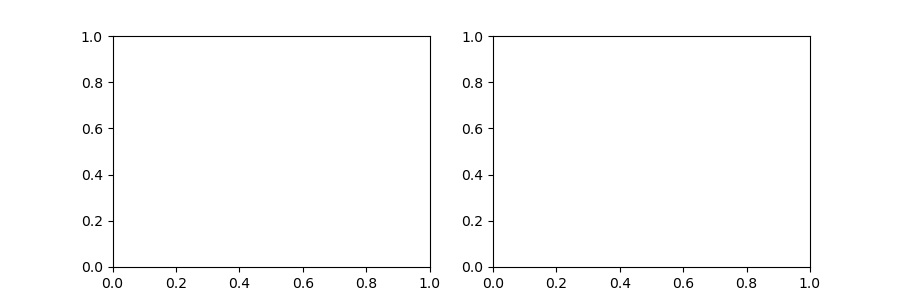

In [16]:
if "action_fig" in locals():
    plt.close(action_fig)
# action_fig = plt.figure()
# action_ax = action_fig.gca()

plt.ion()
action_fig, action_ax = plt.subplots(1, 2, figsize=[9, 3])

In [924]:
"""
WARNING: This cell needs to be executed in combination with "endeffector_fig" cell above, as simulation data is only pre-processed above!
"""

for axis in action_ax:
    axis.clear()
action_fig.subplots_adjust(left=0.1, right=0.95, bottom=0.17, top=0.9, wspace=0.26, hspace=0.2)

####
## INFO: uses TrajectoryData classes defined above

# WHICH/HOW MANY MOVS?
TRIAL_IDS = None  #list of indices, None, or "different_target_sizes" (in the latter two cases, N_MOVS is used)
N_MOVS = None #number of movements to take into account (only used, if TRIAL_IDS is not a list of indices)

# WHAT TO PLOT?
SHOW_AGGREGATED_RECRUITMENTS = True  #if True, show boxplot with aggregated muscle recruitments for each muscle
ACTUATOR_ID = 0 #index of actuator to plot (only if SHOW_AGGREGATED_RECRUITMENTS == False)

# HOW TO PLOT?
NORMALIZE_TIME = True  #only if SHOW_AGGREGATED_RECRUITMENTS == False

# WHICH BASELINE?
SHOW_STUDY = True  #if False, show both simulation control and simulation action values

####

trajectories_SIMULATION.compute_indices(TRIAL_IDS=TRIAL_IDS, N_MOVS=N_MOVS)
trajectories = trajectories_SIMULATION

if SHOW_AGGREGATED_RECRUITMENTS:
    # Aggregated muscle recruitment plot (with noise)
    if isinstance(trajectories.control_series, list):
        aggregated_recruitments_controls = {actuator_name: [np.sum(trajectories.control_series[meta_id][current_idx: next_idx, actuator_idx]) for meta_id, indices_current_radius in enumerate(trajectories.indices) for last_idx, current_idx, next_idx in trajectories_SIMULATION.selected_movements_indices] for actuator_idx, actuator_name in enumerate(actuator_names)}
    else:
        aggregated_recruitments_controls = {actuator_name: [np.sum(trajectories.control_series[current_idx: next_idx, actuator_idx]) for last_idx, current_idx, next_idx in trajectories_SIMULATION.selected_movements_indices] for actuator_idx, actuator_name in enumerate(actuator_names)}

    #action_ax[0].boxplot(aggregated_recruitments_controls.values(), labels=aggregated_recruitments_controls.keys())
    sns.boxplot(data=pd.DataFrame(aggregated_recruitments_controls), ax=action_ax[0])#, labels=aggregated_recruitments_controls.keys())
    
    action_ax[0].set_xticklabels(aggregated_recruitments_controls.keys(), rotation=90, fontsize=6)
    action_ax[0].set_title(f"Aggregated Muscle Recruitment{' (SIMULATION)' if SHOW_STUDY else ''}")
    #action_ax[0].set_xlabel("Muscle")
    action_ax[0].set_ylabel("Sum of Muscle Control Values")
    
    if SHOW_STUDY:
        trajectories_STUDY.compute_indices(TRIAL_IDS=TRIAL_IDS, N_MOVS=N_MOVS)
        trajectories = trajectories_STUDY
        
        # Aggregated muscle recruitment plot (with noise) -- USER STUDY
        aggregated_recruitments_controls_STUDY = {actuator_name: [np.sum(trajectories.act_series[current_idx: next_idx, actuator_idx]) for last_idx, current_idx, next_idx in trajectories.selected_movements_indices] for actuator_idx, actuator_name in enumerate(trajectories.actuator_names)}

        #action_ax[1].boxplot(aggregated_recruitments_controls_STUDY.values(), labels=aggregated_recruitments_controls_STUDY.keys())
        sns.boxplot(data=pd.DataFrame(aggregated_recruitments_controls_STUDY), ax=action_ax[1])#, labels=aggregated_recruitments_controls_STUDY.keys())

        action_ax[1].set_xticklabels(aggregated_recruitments_controls_STUDY.keys(), rotation=90, fontsize=6)
        action_ax[1].set_title("Aggregated Muscle Recruitment (STUDY)")
        #action_ax[1].set_xlabel("Muscle")
        action_ax[1].set_ylabel("Sum of Muscle Control Values")
    else:
        # Aggregated muscle recruitment plot (without noise)
        if isinstance(trajectories.action_series, list):
            aggregated_recruitments_actions = {actuator_name: [np.sum(trajectories.action_series[meta_id][current_idx: next_idx, actuator_idx]) for meta_id, indices_current_radius in enumerate(trajectories.indices) for last_idx, current_idx, next_idx in list(zip(np.concatenate(([-1], indices_current_radius[:-1])), indices_current_radius, indices_current_radius[1:]))] for actuator_idx, actuator_name in enumerate(actuator_names)}
        else:
            aggregated_recruitments_actions = {actuator_name: [np.sum(trajectories.action_series[current_idx: next_idx, actuator_idx]) for last_idx, current_idx, next_idx in list(zip(np.concatenate(([-1], trajectories.indices[:-1])), trajectories.indices, trajectories.indices[1:]))] for actuator_idx, actuator_name in enumerate(actuator_names)}        
        #action_ax[0].boxplot(aggregated_recruitments_actions.values(), labels=aggregated_recruitments_actions.keys())
        sns.boxplot(data=pd.DataFrame(aggregated_recruitments_actions), ax=action_ax[1])#, labels=aggregated_recruitments_actions.keys())

        action_ax[1].set_xticklabels(aggregated_recruitments_actions.keys(), rotation=90, fontsize=6)
        action_ax[1].set_title("Aggregated Muscle Recruitment")
        #action_ax[1].set_xlabel("Muscle")
        action_ax[1].set_ylabel("Sum of Muscle Action Values")
    
    action_fig.savefig(f"plots/{filename}/aggregated_muscle_{trajectories_SIMULATION.data_key}.png", dpi=120)
else:
    ## ANALYSIS OF POINTING TASKS -> Plot actions and rewards
    solid_line = Line2D([0], [0], color='black', linestyle='-', label='Actions')
    dashed_line = Line2D([0], [0], color='black', linestyle='--', label='Controls')
    action_ax[0].legend(handles=[solid_line, dashed_line])


    action_ax[0].set_title(f"Action and Control Time Series – {trajectories.actuator_names[ACTUATOR_ID]}")
    action_ax[0].set_xlabel(f"Time {'[normalized]' if NORMALIZE_TIME else '(s)'}")
    action_ax[0].set_ylabel("Action/Control [normalized]")

    action_ax[1].set_title("Reward Time Series")
    action_ax[1].set_xlabel(f"Time {'[normalized]' if NORMALIZE_TIME else '(s)'}")
    action_ax[1].set_ylabel("Reward")
    action_ax[1].set_yscale("symlog")

    for last_idx, current_idx, next_idx in trajectories.selected_movements_indices:  #list(zip(np.concatenate(([-1], trajectories.indices[:-1])), trajectories.indices, trajectories.indices[1:]))[1:N_MOVS+1]:
        time_series_shifted = np.array(trajectories.time_series[current_idx: next_idx]) - trajectories.time_series["timestep"][current_idx]
        if NORMALIZE_TIME:
            time_series_shifted = (time_series_shifted - time_series_shifted[0])/(time_series_shifted[-1] - time_series_shifted[0])

        ### ACTIONS AND CONTROLS
        action_ax[0].plot(time_series_shifted, trajectories.action_series[current_idx: next_idx, ACTUATOR_ID], linestyle='-')
        action_ax[0].plot(time_series_shifted, trajectories.control_series[current_idx: next_idx, ACTUATOR_ID], linestyle='--')

        ### REWARD
        latest_plot, = action_ax[1].plot(time_series_shifted, trajectories.reward_series[current_idx: next_idx])

    action_fig.savefig(f"plots/{filename}/actions_controls_rewards.png", dpi=120)

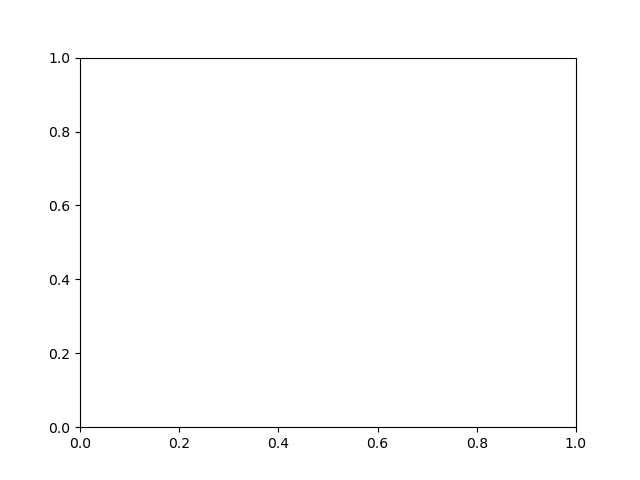

In [18]:
if "fittslaw_fig" in locals():
    plt.close(fittslaw_fig)
plt.ion()
fittslaw_fig = plt.figure()
fittslaw_ax = fittslaw_fig.gca()
# fittslaw_fig, fittslaw_ax = plt.subplots(1, 2, figsize=[9, 3])

In [19]:
fittslaw_ax.clear()

###
REMOVE_OUTLIERS = True

USE_TARGETBOUND_AS_DIST = False
DWELL_TIME = 0.3  #only used if USE_TARGETBOUND_AS_DIST == False

PLOT_TYPE = "meandata"  #"alldata", "boxplot", "mean_groups", "meandata", "density_ID"
BOXPLOT_category = "ID"
BOXPLOT_nbins = 5
BOXPLOT_qbins = True  #whether to use quantile-based bins (i.e., same number of samples per bin) or range-based bins (i.e., same length of each bin interval)

DENSITY_group_nIDbins = 5  #number of ID groups
DENSITY_group_IDbin_ID = 0  #index of ID group (between 0 and DENSITY_group_nIDbins-1) for which a density plot of movement times is created (only used if PLOT_TYPE == "density_ID")
DENSITY_group_nMTbins = 50
###

if PLOT_TYPE != "boxplot":
    BOXPLOT_category = "ID (bits)"  #used for xlabel
    

assert not REPEATED_MOVEMENTS
trajectories = trajectories_SIMULATION

# Compute ID and MT pairs from dataset:
distance_list = []
width_list = []
ID_list = []
MT_list = []
target_position_list = []
initial_position_list = []
failed_movements_counter = 0
for EPISODE_ID, data_episode in trajectories.data.items():
    position_series = data_episode["fingertip_xpos"]
    time_per_step = np.diff(data_episode["timestep"]).mean()  #0.01
    if REPEATED_MOVEMENTS:
        indices = np.where(data_episode["target_spawned"])[0]
    else:
    #    indices = np.append(np.insert(np.where(data_episode["target_hit"])[0], 0, 0), len(data_episode["target_hit"]))
        indices = np.insert(np.where(data_episode["target_spawned"])[0], 0, 0)
    for last_idx, current_idx, next_idx in list(zip([-1] + list(indices), indices, indices[1:])):
        #test[idx] = (next_idx - current_idx, data_episode["target_radius"][current_idx])
        width = 2 * data_episode["target_radius"][current_idx]
        # use nominal distance:
        init_val = data_episode["target_position"][last_idx] if last_idx >= 0 else position_series[0]
        if USE_TARGETBOUND_AS_DIST:
            if "inside_target" not in data_episode:  #use "target_radius" column
                assert len(np.unique(data_episode["target_radius"][current_idx + 1:next_idx])) == 1, "ERROR: Target radius changes during movement! Cannot find reliable information about when target has been entered.\nFix dataset or use target center as distance (set 'USE_TARGETBOUND_AS_DIST=False')."
                rel_indices_targetbound = np.where(np.linalg.norm(np.array(position_series[current_idx + 1:next_idx]) - np.array(data_episode["target_position"][current_idx + 1:next_idx]), axis=1) < data_episode["target_radius"][current_idx + 1])[0]
            else:  #use "inside_target" column
                rel_indices_targetbound = np.where(data_episode["inside_target"][current_idx + 1:next_idx])[0]
            if len(rel_indices_targetbound) > 0 :
                targetbound_idx = current_idx + 1 + rel_indices_targetbound[0]
            else:  #movement failed
                failed_movements_counter += 1
                continue
            final_val = position_series[targetbound_idx]
        else:
            final_val = data_episode["target_position"][current_idx] #or position_series[next_idx - 1]
        if isinstance(final_val, tuple) and len(final_val) == 1:
            final_val = final_val[0]
        # # use effective distance:
        # init_val = position_series[current_idx]
        # final_val = position_series[next_idx - 1]
        ######################################
        distance = np.linalg.norm(final_val - init_val)
        fitts_ID = np.log2(2*distance/width)
        width_list.append(width)
        distance_list.append(distance)
        ID_list.append(fitts_ID)
        if USE_TARGETBOUND_AS_DIST:
            MT_list.append((targetbound_idx - current_idx)*time_per_step)
        else:
            MT_list.append((next_idx - current_idx)*time_per_step - DWELL_TIME)
        target_position_list.append(final_val)
        initial_position_list.append(init_val)
# Remove outliers:
movement_indices_TO_DELETE = []
if REMOVE_OUTLIERS:
    # Ensure that too long movements are removed (all movements with duration - mean(duration) > 3 * std(duration))
    #MT_list_zscores = stats.zscore(MT_list)
    #movement_indices_TO_DELETE = np.where(np.abs(stats.zscore(MT_list)) > 3)[0].tolist()
    
    movement_indices_TO_DELETE = np.where(np.array(MT_list) >= 4.0 - DWELL_TIME)[0].tolist()

    distance_list = [val for idx, val in enumerate(distance_list) if idx not in movement_indices_TO_DELETE]
    width_list = [val for idx, val in enumerate(width_list) if idx not in movement_indices_TO_DELETE]
    ID_list = [val for idx, val in enumerate(ID_list) if idx not in movement_indices_TO_DELETE]
    MT_list = [val for idx, val in enumerate(MT_list) if idx not in movement_indices_TO_DELETE]
    target_position_list = [val for idx, val in enumerate(target_position_list) if idx not in movement_indices_TO_DELETE]
    initial_position_list = [val for idx, val in enumerate(initial_position_list) if idx not in movement_indices_TO_DELETE]

add_info = f'{len(movement_indices_TO_DELETE)} outliers were dropped' if movement_indices_TO_DELETE else '', f'{failed_movements_counter} movements failed' if failed_movements_counter else ''
add_info_nonempty = [i for i in add_info if len(i)]
add_info_str = f" ({'; '.join(add_info_nonempty)})" if add_info_nonempty else ""
print(f"INFO: Using {len(ID_list)} movements from {len(trajectories.data)} episodes{add_info_str}.")

# Linear regression:
poly_coef = np.polyfit(ID_list, MT_list, 1)
p_linreg = np.poly1d(poly_coef)

# Coefficient of determination:
SQE = np.square(np.linalg.norm(p_linreg(ID_list) - np.mean(MT_list)))
SQT = np.square(np.linalg.norm(MT_list - np.mean(MT_list)))
R2 = SQE/SQT
print("Fitts' Law - Coefficient of determination (R^2): {}".format(R2))

if PLOT_TYPE == "boxplot":
    df = pd.DataFrame({"Distance": distance_list, "Width": width_list, "ID": ID_list, "MT": MT_list})
    if BOXPLOT_qbins:
        df_bins = df.groupby([pd.qcut(df[BOXPLOT_category], BOXPLOT_nbins)])["MT"].apply(list)
    else:
        df_bins = df.groupby([pd.cut(df[BOXPLOT_category], BOXPLOT_nbins)])["MT"].apply(list)
    df_bins_renamed = df_bins.rename(lambda x: x if type(x) == float else f"{x.left.round(2)}-{x.right.round(2)}", axis=0)
    fittslaw_ax.boxplot(df_bins_renamed, labels=df_bins_renamed.index, positions=[x.mid for x in df_bins.index], widths=[0.8*(x.right - x.left) for x in df_bins.index])
    fittslaw_ax.relim()
    if BOXPLOT_category == "ID":
        lin_regression_x = locals()[f"{BOXPLOT_category}_list"]
        lin_regression_y = p_linreg(ID_list)
        lin_regression_sorted = sorted(zip(lin_regression_x, lin_regression_y))
        lin_regression_x = [x for x, y in lin_regression_sorted]
        lin_regression_y = [y for x, y in lin_regression_sorted]
        fittslaw_ax.plot(lin_regression_x, lin_regression_y, color="red")
elif PLOT_TYPE == "mean_groups":
    df = pd.DataFrame({"Distance": distance_list, "Width": width_list, "ID": ID_list, "MT": MT_list})
    if REPEATED_MOVEMENTS:
        assert df["Width"].nunique() == BOXPLOT_nbins, f"Set 'BOXPLOT_nbins' to the number of different target sizes included in the current dataset ({df['Width'].nunique()})!"
        if BOXPLOT_qbins:
            df_bins_groupby = df.groupby([pd.qcut(df["Distance"], BOXPLOT_nbins), df["Width"]])["MT"]
        else:
            df_bins_groupby = df.groupby([pd.cut(df["Distance"], BOXPLOT_nbins), df["Width"]])["MT"]
    else:
        if BOXPLOT_qbins:
            df_bins_groupby = df.groupby([pd.qcut(df["Distance"], BOXPLOT_nbins), pd.qcut(df["Width"], BOXPLOT_nbins)])["MT"]
        else:
            df_bins_groupby = df.groupby([pd.cut(df["Distance"], BOXPLOT_nbins), pd.cut(df["Width"], BOXPLOT_nbins)])["MT"]
    df_bins = df_bins_groupby.mean()
    df_bins_renamed = df_bins.rename(lambda x: x if type(x) == float else f"{x.left.round(2)}-{x.right.round(2)}", axis=0)
    df_bins_renamed.index = df_bins_renamed.index.map(lambda x: f"D: {x[0]}, W: {x[1]}")
    trans_dict_dist = {number: chr(ord('@')+number+1) for number in range(BOXPLOT_nbins)}
    trans_dict_width = {number: str(number) for number in range(BOXPLOT_nbins)}
    group_identifiers_dist = [(str(trans_dict_dist[idx]), f"D: {value}") for idx, value in enumerate(df_bins.index.get_level_values(0).unique().tolist())]
    group_identifiers_width = [(str(trans_dict_width[idx]), f"W: {value}") for idx, value in enumerate(df_bins.index.get_level_values(1).unique().tolist())]
    group_identifiers = df_bins.index.map(lambda x: "".join([trans_dict_dist[df_bins.index.get_level_values(0).unique().tolist().index(x[0])], trans_dict_width[df_bins.index.get_level_values(1).unique().tolist().index(x[1])]]))
    if REPEATED_MOVEMENTS:
        assert df["Width"].nunique() == BOXPLOT_nbins, f"Set 'BOXPLOT_nbins' to the number of different target sizes included in the current dataset ({df['Width'].nunique()})!"
        if BOXPLOT_qbins:
            df["classification"] = [df_bins.index.get_loc((x["Distance"], x["Width"])) for _, x in pd.concat((pd.qcut(df["Distance"], BOXPLOT_nbins), df["Width"]), axis=1).iterrows()]
        else:
            df["classification"] = [df_bins.index.get_loc((x["Distance"], x["Width"])) for _, x in pd.concat((pd.cut(df["Distance"], BOXPLOT_nbins), df["Width"]), axis=1).iterrows()]
    else:
        if BOXPLOT_qbins:
            df["classification"] = [df_bins.index.get_loc((x["Distance"], x["Width"])) for _, x in pd.concat((pd.qcut(df["Distance"], BOXPLOT_nbins), pd.qcut(df["Width"], BOXPLOT_nbins)), axis=1).iterrows()]
        else:
            df["classification"] = [df_bins.index.get_loc((x["Distance"], x["Width"])) for _, x in pd.concat((pd.cut(df["Distance"], BOXPLOT_nbins), pd.cut(df["Width"], BOXPLOT_nbins)), axis=1).iterrows()]
    df_bins = df_bins.reset_index()
    df_bins["ID"] = df_bins.apply(lambda x: pd.Interval(np.log2(2*x["Distance"].left / x["Width"]), np.log2(2*x["Distance"].right / x["Width"])) if type(x["Width"]) == float else (pd.Interval(np.log2(2*x["Distance"] / x["Width"].right), np.log2(2*x["Distance"] / x["Width"].left)) if type(x["Distance"]) == float else pd.Interval(np.log2(2*x["Distance"].left / x["Width"].right), np.log2(2*x["Distance"].right / x["Width"].left))), axis=1)
    df_bins["Average ID"] = df_bins.apply(lambda x: np.log2(2*x["Distance"].mid / x["Width"]) if type(x["Width"]) == float else (np.log2(2*x["Distance"] / x["Width"].mid) if type(x["Distance"]) == float else np.log2(2*x["Distance"].mid / x["Width"].mid)), axis=1)
    df_bins["Number of Samples"] = df_bins_groupby.size().reset_index(drop=True)
    xtick_offset = 0
    
    ### ONLY SHOW SOME CONDITIONS:
    # df = df.loc[(df["classification"] >= 5) & (df["classification"] < 15)]
    # group_identifiers_dist = group_identifiers_dist[1:3]
    # group_identifiers = group_identifiers[5:15]
    # df_bins = df_bins.iloc[5:15]
    # df_bins_renamed = df_bins_renamed.iloc[5:15]
    # xtick_offset = 5

    fittslaw_ax.scatter(range(xtick_offset, xtick_offset + len(df_bins_renamed)), df_bins_renamed, color="red")#, positions=[x.mid for x in df_bins.index], widths=[0.8*(x.right - x.left) for x in df_bins.index])
    fittslaw_ax.scatter(df["classification"], df["MT"], color="blue", s=0.2)
    ## VARIANT 1 - detailed xlabels:
    #fittslaw_ax.set_xticks(range(len(df_bins_renamed)), df_bins_renamed.index, fontsize=4)
    ## VARIANT 2 - abbreviations as xlabels, additional legend:
    #fittslaw_ax.set_xticks(df_bins[~df_bins["MT"].isna()].index, df_bins[~df_bins["MT"].isna()].index + 1)
    fittslaw_ax.set_xticks(df_bins[~df_bins["MT"].isna()].index, group_identifiers[~df_bins["MT"].isna()])
    class MarkerHandler(mpl.legend_handler.HandlerBase):  #source: https://stackoverflow.com/a/47395401
        def create_artists(self, legend, integer, xdescent, ydescent,
                            width, height, fontsize,trans):
            marker_obj = mpl.markers.MarkerStyle(f'${integer}$') #Here you place your integer
            path = marker_obj.get_path().transformed(marker_obj.get_transform())

            path._vertices = np.array(path._vertices)*8 #To make it larger
            patch = mpl.patches.PathPatch(path, color="black", lw=0, transform=trans+mpl.transforms.Affine2D().translate(0, 5.5))
            return [patch]
    fittslaw_ax.legend([x for x, y in group_identifiers_dist + group_identifiers_width], [y for x,y in group_identifiers_dist + group_identifiers_width], handler_map={str:MarkerHandler()}, handletextpad=0, handlelength=1)#, fontsize=8)
    ################################
    fittslaw_ax.relim()
elif PLOT_TYPE == "meandata":
    df = pd.DataFrame({"Distance": distance_list, "Width": width_list, "ID": ID_list, "MT": MT_list})
    if REPEATED_MOVEMENTS:
        assert df["Width"].nunique() == BOXPLOT_nbins, f"Set 'BOXPLOT_nbins' to the number of different target sizes included in the current dataset ({df['Width'].nunique()})!"
        if BOXPLOT_qbins:
            df_bins_groupby = df.groupby([pd.qcut(df["Distance"], BOXPLOT_nbins), df["Width"]])["MT"]
        else:
            df_bins_groupby = df.groupby([pd.cut(df["Distance"], BOXPLOT_nbins), df["Width"]])["MT"]   
    else:
        if BOXPLOT_qbins:
            df_bins_groupby = df.groupby([pd.qcut(df["Distance"], BOXPLOT_nbins), pd.qcut(df["Width"], BOXPLOT_nbins)])["MT"]
        else:
            df_bins_groupby = df.groupby([pd.cut(df["Distance"], BOXPLOT_nbins), pd.cut(df["Width"], BOXPLOT_nbins)])["MT"]        
    df_bins = df_bins_groupby.mean()
    df_bins_renamed = df_bins.rename(lambda x: x if type(x) == float else f"{x.left.round(2)}-{x.right.round(2)}", axis=0)
    df_bins_renamed.index = df_bins_renamed.index.map(lambda x: f"D: {x[0]}, W: {x[1]}")
    df_bins = df_bins.reset_index()
    df_bins["ID"] = df_bins.apply(lambda x: pd.Interval(np.log2(2*x["Distance"].left / x["Width"]), np.log2(2*x["Distance"].right / x["Width"])) if type(x["Width"]) == float else (pd.Interval(np.log2(2*x["Distance"] / x["Width"].right), np.log2(2*x["Distance"] / x["Width"].left)) if type(x["Distance"]) == float else pd.Interval(np.log2(2*x["Distance"].left / x["Width"].right), np.log2(2*x["Distance"].right / x["Width"].left))), axis=1)
    df_bins["Average ID"] = df_bins.apply(lambda x: np.log2(2*x["Distance"].mid / x["Width"]) if type(x["Width"]) == float else (np.log2(2*x["Distance"] / x["Width"].mid) if type(x["Distance"]) == float else np.log2(2*x["Distance"].mid / x["Width"].mid)), axis=1)
    
    df_bins["Number of Samples"] = df_bins_groupby.size().reset_index(drop=True)
    
    ### ONLY SHOW SOME CONDITIONS:
#     df_bins = df_bins.iloc[5:15]
#     df_bins_renamed = df_bins_renamed.iloc[5:15]
    
    fittslaw_ax.scatter(df_bins["Average ID"], df_bins["MT"])
    fittslaw_ax.plot(df_bins["Average ID"], p_linreg(df_bins["Average ID"]), color="red")
    
    # Coefficient of determination on mean groups:
    ID_list_mean = df_bins.loc[~df_bins["MT"].isna(), "Average ID"]
    MT_list_mean = df_bins.loc[~df_bins["MT"].isna(), "MT"]
    poly_coef_mean = np.polyfit(ID_list_mean, MT_list_mean, 1)
    p_linreg_mean = np.poly1d(poly_coef_mean)
    SQE_mean = np.square(np.linalg.norm(p_linreg_mean(ID_list_mean) - np.mean(MT_list_mean)))
    SQT_mean = np.square(np.linalg.norm(MT_list_mean - np.mean(MT_list_mean)))
    R2_mean = SQE_mean/SQT_mean
    print("Fitts' Law [ON MEAN PER CONDITION] - Coefficient of determination (R^2): {}".format(R2_mean))
elif PLOT_TYPE == "alldata":
    fittslaw_ax.scatter(ID_list, MT_list)
    fittslaw_ax.plot(ID_list, p_linreg(ID_list), color="red")
elif PLOT_TYPE == "density_ID":
    df = pd.DataFrame({"Distance": distance_list, "Width": width_list, "ID": ID_list, "MT": MT_list})
    if BOXPLOT_qbins:
        df_bins_ID_helper = pd.qcut(df["ID"], DENSITY_group_nIDbins)
        df_bins_ID_groupby = df.groupby([df_bins_ID_helper])["MT"]
        df_bins_ID = df_bins_ID_groupby.mean()
        df["classification"] = [df_bins_ID.index.get_loc(x) for x in df_bins_ID_helper.values]
    else:
        df_bins_ID_helper = pd.cut(df["ID"], DENSITY_group_nIDbins)
        df_bins_ID_groupby = df.groupby([df_bins_ID_helper])["MT"]
        df_bins_ID = df_bins_ID_groupby.mean()
        df["classification"] = [df_bins_ID.index.get_loc(x) for x in df_bins_ID_helper.values]
    ID_groups = sorted(df_bins_ID_helper.unique())
    df_bins_ID = df_bins_ID.reset_index()
    df_bins_ID["Average ID"] = df_bins_ID.apply(lambda x: x["ID"].mid, axis=1)
    df_bins_ID["Number of Samples"] = df_bins_ID_groupby.size().reset_index(drop=True)

    fittslaw_ax.hist(df.loc[df["classification"] == DENSITY_group_IDbin_ID, "MT"], DENSITY_group_nMTbins)
else:
    raise NotImplementedError

# # Save the default tick positions, so we can reset them...
# locs = fittslaw_ax.get_xticks()
# # Reset the xtick locations.
# fittslaw_ax.set_xticks(locs)

if PLOT_TYPE == "density_ID":
    fittslaw_ax.set_xlabel("MT (s)")
elif PLOT_TYPE not in ["mean_groups"]:
    fittslaw_ax.set_xlabel(BOXPLOT_category + (f" bits" if (BOXPLOT_category == "ID") else "")) #"ID (bits)")  
if PLOT_TYPE == "density_ID":
    fittslaw_ax.set_ylabel("Frequency")    
else:
    fittslaw_ax.set_ylabel("MT (s)")
if PLOT_TYPE == "meandata":
    fittslaw_ax.set_title("Fitts' Law on Mean Data ($R^2=${:.4f}; $a=${:.2f}, $b=${:.2f})".format(R2_mean, poly_coef_mean[1], poly_coef_mean[0]), fontsize=14) #fontsize=18)
elif PLOT_TYPE == "density_ID":
    fittslaw_ax.set_title(f"Movement Time – Density Plot (ID: {ID_groups[DENSITY_group_IDbin_ID]})")
else:
    fittslaw_ax.set_title("Fitts' Law ($R^2=${:.4f}; $a=${:.2f}, $b=${:.2f})".format(R2, poly_coef[1], poly_coef[0]), fontsize=14) #fontsize=18)

if PLOT_TYPE == "density_ID":
    fittslaw_fig.savefig(f"plots/{filename}/movement_time_{PLOT_TYPE}group{DENSITY_group_IDbin_ID}.png", dpi=120)
else:
    fittslaw_fig.savefig(f"plots/{filename}/fittslaw_{PLOT_TYPE}.png", dpi=120)
        

INFO: Using 1000 movements from 100 episodes.
Fitts' Law - Coefficient of determination (R^2): 0.27026559612187456
Fitts' Law [ON MEAN PER CONDITION] - Coefficient of determination (R^2): 0.7272652081968621


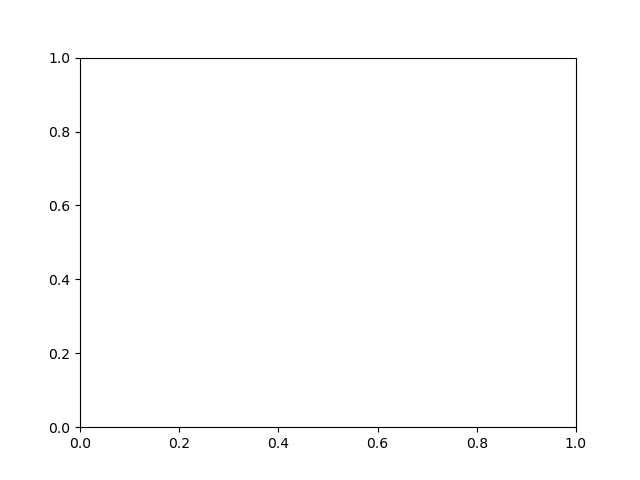

In [20]:
if "endpointvar_fig" in locals():
    plt.close(endpointvar_fig)
plt.ion()
endpointvar_fig = plt.figure()
endpointvar_ax = endpointvar_fig.gca()
# endpointvar_fig, endpointvar_ax = plt.subplots(1, 2, figsize=[9, 3])

In [21]:
endpointvar_ax.clear()

###
REMOVE_OUTLIERS = True

USE_TARGETBOUND_AS_DIST = False
DWELL_TIME = 0.3  #only used if USE_TARGETBOUND_AS_DIST == False

PLOT_TYPE = "alldata"  #"alldata", "boxplot", "mean_groups", "meandata", "density_ID"
COVARIANCE_AXIS = 0
BOXPLOT_category = "Width"
BOXPLOT_nbins = 5
BOXPLOT_qbins = True  #whether to use quantile-based bins (i.e., same number of samples per bin) or range-based bins (i.e., same length of each bin interval)

DENSITY_group_nIDbins = 5  #number of ID groups
DENSITY_group_IDbin_ID = 0  #index of ID group (between 0 and DENSITY_group_nIDbins-1) for which a density plot of movement times is created (only used if PLOT_TYPE == "density_ID")
DENSITY_group_nMTbins = 50
###

if PLOT_TYPE != "boxplot":
    BOXPLOT_category = "Endpoint Std. (m)"  #used for xlabel

# Compute end-point (i.e., end-effector dwell time) variances from dataset:
covariances_list = []
dwelltime_indices_list = []
num_target_entries_list = []
distance_list = []
width_list = []
MT_list = []

failed_movements_counter = 0
for EPISODE_ID, data_episode in trajectories.data.items():
    position_series = data_episode["fingertip_xpos"]
    time_per_step = np.diff(data_episode["timestep"]).mean()  #0.01
    if REPEATED_MOVEMENTS:
        indices = np.where(data_episode["target_spawned"])[0]
    else:
    #    indices = np.append(np.insert(np.where(data_episode["target_hit"])[0], 0, 0), len(data_episode["target_hit"]))
        indices = np.insert(np.where(data_episode["target_spawned"])[0], 0, 0)
    for last_idx, current_idx, next_idx in list(zip([-1] + list(indices), indices, indices[1:])):
        #test[idx] = (next_idx - current_idx, data_episode["target_radius"][current_idx])
        # use nominal distance:
        init_val = data_episode["target_position"][last_idx] if last_idx >= 0 else position_series[0]
        if USE_TARGETBOUND_AS_DIST:
            if "inside_target" not in data_episode:  #use "target_radius" column
                assert len(np.unique(data_episode["target_radius"][current_idx + 1:next_idx])) == 1, "ERROR: Target radius changes during movement! Cannot find reliable information about when target has been entered.\nFix dataset or use target center as distance (set 'USE_TARGETBOUND_AS_DIST=False')."
                rel_indices_targetbound = np.where(np.linalg.norm(np.array(position_series[current_idx + 1:next_idx]) - np.array(data_episode["target_position"][current_idx + 1:next_idx]), axis=1) < data_episode["target_radius"][current_idx + 1])[0]
            else:  #use "inside_target" column
                rel_indices_targetbound = np.where(data_episode["inside_target"][current_idx + 1:next_idx])[0]
            if len(rel_indices_targetbound) > 0 :
                targetbound_idx = current_idx + 1 + rel_indices_targetbound[0]
            else:  #movement failed
                failed_movements_counter += 1
                continue
            final_val = position_series[targetbound_idx]
        else:
            final_val = data_episode["target_position"][current_idx] #or position_series[next_idx - 1]
        if isinstance(final_val, tuple) and len(final_val) == 1:
            final_val = final_val[0]
        # # use effective distance:
        # init_val = position_series[current_idx]
        # final_val = position_series[next_idx - 1]
        ######################################
        distance = np.linalg.norm(final_val - init_val)
        
        # compute indices at which end-effector is inside target ("dwell time indices"), number of target (re-)entries, and covariance of end-effector position during these dwell time indices
        current_position_series = np.squeeze(position_series[current_idx + 1:next_idx])
        dwelltime_indices = np.where(data_episode["inside_target"][current_idx + 1:next_idx])[0]
        target_re_entries_meta_indices = np.where(np.diff(dwelltime_indices) != 1)[0] + 1
        num_target_entries = len(target_re_entries_meta_indices) + 1
        endeffector_dwelltime_covariance = np.cov(current_position_series[dwelltime_indices], rowvar=False)
        
        distance_list.append(distance)
        width_list.append(2 * data_episode["target_radius"][current_idx])
        if USE_TARGETBOUND_AS_DIST:
            targetbound_idx = dwelltime_indices[target_re_entries_meta_indices[-1]:][0] if len(target_re_entries_meta_indices) > 0 else dwelltime_indices[0]
            MT_list.append((targetbound_idx - current_idx)*time_per_step)
        else:
            MT_list.append((next_idx - current_idx)*time_per_step - DWELL_TIME)
        ######################################
        covariances_list.append(endeffector_dwelltime_covariance)
        dwelltime_indices_list.append(dwelltime_indices)
        num_target_entries_list.append(num_target_entries)
# Remove outliers:
movement_indices_TO_DELETE = []
if REMOVE_OUTLIERS:
    # Ensure that too long movements are removed (all movements with duration - mean(duration) > 3 * std(duration))
    #MT_list_zscores = stats.zscore(MT_list)
    #movement_indices_TO_DELETE = np.where(np.abs(stats.zscore(MT_list)) > 3)[0].tolist()
    
    movement_indices_TO_DELETE = np.where(np.array(MT_list) >= 4.0 - DWELL_TIME)[0].tolist()

    covariances_list = [val for idx, val in enumerate(covariances_list) if idx not in movement_indices_TO_DELETE]
    dwelltime_indices_list = [val for idx, val in enumerate(dwelltime_indices_list) if idx not in movement_indices_TO_DELETE]
    num_target_entries_list = [val for idx, val in enumerate(num_target_entries_list) if idx not in movement_indices_TO_DELETE]
    width_list = [val for idx, val in enumerate(width_list) if idx not in movement_indices_TO_DELETE]
    MT_list = [val for idx, val in enumerate(MT_list) if idx not in movement_indices_TO_DELETE]

# Map covariance matrices to scalar value (e.g., standard deviation along a given Cartesian axis)
std_mapped = list(map(lambda x: np.sqrt(x[COVARIANCE_AXIS, COVARIANCE_AXIS]), covariances_list))

add_info = f'{len(movement_indices_TO_DELETE)} outliers were dropped' if movement_indices_TO_DELETE else '', f'{failed_movements_counter} movements failed' if failed_movements_counter else ''
add_info_nonempty = [i for i in add_info if len(i)]
add_info_str = f" ({'; '.join(add_info_nonempty)})" if add_info_nonempty else ""
print(f"INFO: Using {len(covariances_list)} movements from {len(trajectories.data)} episodes{add_info_str}.")

# Linear regression:
poly_coef = np.polyfit(width_list, std_mapped, 1)
p_linreg = np.poly1d(poly_coef)

# Coefficient of determination:
SQE = np.square(np.linalg.norm(p_linreg(width_list) - np.mean(std_mapped)))
SQT = np.square(np.linalg.norm(std_mapped - np.mean(std_mapped)))
R2 = SQE/SQT
print("Linear Mapping between Width and Standard Deviation - Coefficient of determination (R^2): {}".format(R2))

if PLOT_TYPE == "boxplot":
    df = pd.DataFrame({"Width": width_list, "Endpoint Std": std_mapped})
    if BOXPLOT_qbins:
        df_bins = df.groupby([pd.qcut(df[BOXPLOT_category], BOXPLOT_nbins)])["Endpoint Std"].apply(list)
    else:
        df_bins = df.groupby([pd.cut(df[BOXPLOT_category], BOXPLOT_nbins)])["Endpoint Std"].apply(list)
    df_bins_renamed = df_bins.rename(lambda x: x if type(x) == float else f"{x.left.round(2)}-{x.right.round(2)}", axis=0)
    endpointvar_ax.boxplot(df_bins_renamed, labels=df_bins_renamed.index, positions=[x.mid for x in df_bins.index], widths=[0.8*(x.right - x.left) for x in df_bins.index])
    endpointvar_ax.relim()
    if BOXPLOT_category == "Width":
        lin_regression_x = width_list
        lin_regression_y = p_linreg(width_list)
        lin_regression_sorted = sorted(zip(lin_regression_x, lin_regression_y))
        lin_regression_x = [x for x, y in lin_regression_sorted]
        lin_regression_y = [y for x, y in lin_regression_sorted]
        endpointvar_ax.plot(lin_regression_x, lin_regression_y, color="red")
elif PLOT_TYPE == "mean_groups":
    df = pd.DataFrame({"Distance": distance_list, "Width": width_list, "Endpoint Std": std_mapped})
    if REPEATED_MOVEMENTS:
        assert df["Width"].nunique() == BOXPLOT_nbins, f"Set 'BOXPLOT_nbins' to the number of different target sizes included in the current dataset ({df['Width'].nunique()})!"
        if BOXPLOT_qbins:
            df_bins_groupby = df.groupby([pd.qcut(df["Distance"], BOXPLOT_nbins), df["Width"]])["Endpoint Std"]
        else:
            df_bins_groupby = df.groupby([pd.cut(df["Distance"], BOXPLOT_nbins), df["Width"]])["Endpoint Std"]
    else:
        if BOXPLOT_qbins:
            df_bins_groupby = df.groupby([pd.qcut(df["Distance"], BOXPLOT_nbins), pd.qcut(df["Width"], BOXPLOT_nbins)])["Endpoint Std"]
        else:
            df_bins_groupby = df.groupby([pd.cut(df["Distance"], BOXPLOT_nbins), pd.cut(df["Width"], BOXPLOT_nbins)])["Endpoint Std"]
    df_bins = df_bins_groupby.mean()
    df_bins_renamed = df_bins.rename(lambda x: x if type(x) == float else f"{x.left.round(2)}-{x.right.round(2)}", axis=0)
    df_bins_renamed.index = df_bins_renamed.index.map(lambda x: f"D: {x[0]}, W: {x[1]}")
    trans_dict_dist = {number: chr(ord('@')+number+1) for number in range(BOXPLOT_nbins)}
    trans_dict_width = {number: str(number) for number in range(BOXPLOT_nbins)}
    group_identifiers_dist = [(str(trans_dict_dist[idx]), f"D: {value}") for idx, value in enumerate(df_bins.index.get_level_values(0).unique().tolist())]
    group_identifiers_width = [(str(trans_dict_width[idx]), f"W: {value}") for idx, value in enumerate(df_bins.index.get_level_values(1).unique().tolist())]
    group_identifiers = df_bins.index.map(lambda x: "".join([trans_dict_dist[df_bins.index.get_level_values(0).unique().tolist().index(x[0])], trans_dict_width[df_bins.index.get_level_values(1).unique().tolist().index(x[1])]]))
    if REPEATED_MOVEMENTS:
        assert df["Width"].nunique() == BOXPLOT_nbins, f"Set 'BOXPLOT_nbins' to the number of different target sizes included in the current dataset ({df['Width'].nunique()})!"
        if BOXPLOT_qbins:
            df["classification"] = [df_bins.index.get_loc((x["Distance"], x["Width"])) for _, x in pd.concat((pd.qcut(df["Distance"], BOXPLOT_nbins), df["Width"]), axis=1).iterrows()]
        else:
            df["classification"] = [df_bins.index.get_loc((x["Distance"], x["Width"])) for _, x in pd.concat((pd.cut(df["Distance"], BOXPLOT_nbins), df["Width"]), axis=1).iterrows()]
    else:
        if BOXPLOT_qbins:
            df["classification"] = [df_bins.index.get_loc((x["Distance"], x["Width"])) for _, x in pd.concat((pd.qcut(df["Distance"], BOXPLOT_nbins), pd.qcut(df["Width"], BOXPLOT_nbins)), axis=1).iterrows()]
        else:
            df["classification"] = [df_bins.index.get_loc((x["Distance"], x["Width"])) for _, x in pd.concat((pd.cut(df["Distance"], BOXPLOT_nbins), pd.cut(df["Width"], BOXPLOT_nbins)), axis=1).iterrows()]
    df_bins = df_bins.reset_index()
    df_bins["ID"] = df_bins.apply(lambda x: pd.Interval(np.log2(2*x["Distance"].left / x["Width"]), np.log2(2*x["Distance"].right / x["Width"])) if type(x["Width"]) == float else (pd.Interval(np.log2(2*x["Distance"] / x["Width"].right), np.log2(2*x["Distance"] / x["Width"].left)) if type(x["Distance"]) == float else pd.Interval(np.log2(2*x["Distance"].left / x["Width"].right), np.log2(2*x["Distance"].right / x["Width"].left))), axis=1)
    df_bins["Average ID"] = df_bins.apply(lambda x: np.log2(2*x["Distance"].mid / x["Width"]) if type(x["Width"]) == float else (np.log2(2*x["Distance"] / x["Width"].mid) if type(x["Distance"]) == float else np.log2(2*x["Distance"].mid / x["Width"].mid)), axis=1)
    df_bins["Number of Samples"] = df_bins_groupby.size().reset_index(drop=True)
    xtick_offset = 0
    
    ### ONLY SHOW SOME CONDITIONS:
    # df = df.loc[(df["classification"] >= 5) & (df["classification"] < 15)]
    # group_identifiers_dist = group_identifiers_dist[1:3]
    # group_identifiers = group_identifiers[5:15]
    # df_bins = df_bins.iloc[5:15]
    # df_bins_renamed = df_bins_renamed.iloc[5:15]
    # xtick_offset = 5

    endpointvar_ax.scatter(range(xtick_offset, xtick_offset + len(df_bins_renamed)), df_bins_renamed, color="red")#, positions=[x.mid for x in df_bins.index], widths=[0.8*(x.right - x.left) for x in df_bins.index])
    endpointvar_ax.scatter(df["classification"], df["Endpoint Std"], color="blue", s=0.2)
    ## VARIANT 1 - detailed xlabels:
    #endpointvar_ax.set_xticks(range(len(df_bins_renamed)), df_bins_renamed.index, fontsize=4)
    ## VARIANT 2 - abbreviations as xlabels, additional legend:
    #endpointvar_ax.set_xticks(df_bins[~df_bins["Endpoint Std"].isna()].index, df_bins[~df_bins["Endpoint Std"].isna()].index + 1)
    endpointvar_ax.set_xticks(df_bins[~df_bins["Endpoint Std"].isna()].index, group_identifiers[~df_bins["Endpoint Std"].isna()])
    class MarkerHandler(mpl.legend_handler.HandlerBase):  #source: https://stackoverflow.com/a/47395401
        def create_artists(self, legend, integer, xdescent, ydescent,
                            width, height, fontsize,trans):
            marker_obj = mpl.markers.MarkerStyle(f'${integer}$') #Here you place your integer
            path = marker_obj.get_path().transformed(marker_obj.get_transform())

            path._vertices = np.array(path._vertices)*8 #To make it larger
            patch = mpl.patches.PathPatch(path, color="black", lw=0, transform=trans+mpl.transforms.Affine2D().translate(0, 5.5))
            return [patch]
    endpointvar_ax.legend([x for x, y in group_identifiers_dist + group_identifiers_width], [y for x,y in group_identifiers_dist + group_identifiers_width], handler_map={str:MarkerHandler()}, handletextpad=0, handlelength=1)#, fontsize=8)
    ################################
    endpointvar_ax.relim()
elif PLOT_TYPE == "meandata":
   
    df = pd.DataFrame({"Distance": distance_list, "Width": width_list, "Endpoint Std": std_mapped})
    if REPEATED_MOVEMENTS:
        assert df["Width"].nunique() == BOXPLOT_nbins, f"Set 'BOXPLOT_nbins' to the number of different target sizes included in the current dataset ({df['Width'].nunique()})!"
        if BOXPLOT_qbins:
            df_bins_groupby = df.groupby([pd.qcut(df["Distance"], BOXPLOT_nbins), df["Width"]])["Endpoint Std"]
        else:
            df_bins_groupby = df.groupby([pd.cut(df["Distance"], BOXPLOT_nbins), df["Width"]])["Endpoint Std"]   
    else:
        if BOXPLOT_qbins:
            df_bins_groupby = df.groupby([pd.qcut(df["Distance"], BOXPLOT_nbins), pd.qcut(df["Width"], BOXPLOT_nbins)])["Endpoint Std"]
        else:
            df_bins_groupby = df.groupby([pd.cut(df["Distance"], BOXPLOT_nbins), pd.cut(df["Width"], BOXPLOT_nbins)])["Endpoint Std"]        
    df_bins = df_bins_groupby.mean()
    df_bins_renamed = df_bins.rename(lambda x: x if type(x) == float else f"{x.left.round(2)}-{x.right.round(2)}", axis=0)
    df_bins_renamed.index = df_bins_renamed.index.map(lambda x: f"D: {x[0]}, W: {x[1]}")
    df_bins = df_bins.reset_index()
    #df_bins["ID"] = df_bins.apply(lambda x: pd.Interval(np.log2(2*x["Distance"].left / x["Width"]), np.log2(2*x["Distance"].right / x["Width"])) if type(x["Width"]) == float else (pd.Interval(np.log2(2*x["Distance"] / x["Width"].right), np.log2(2*x["Distance"] / x["Width"].left)) if type(x["Distance"]) == float else pd.Interval(np.log2(2*x["Distance"].left / x["Width"].right), np.log2(2*x["Distance"].right / x["Width"].left))), axis=1)
    #df_bins["Average ID"] = df_bins.apply(lambda x: np.log2(2*x["Distance"].mid / x["Width"]) if type(x["Width"]) == float else (np.log2(2*x["Distance"] / x["Width"].mid) if type(x["Distance"]) == float else np.log2(2*x["Distance"].mid / x["Width"].mid)), axis=1)
    df_bins["Average Width"] = df_bins.apply(lambda x: x["Width"].mid, axis=1)

    df_bins["Number of Samples"] = df_bins_groupby.size().reset_index(drop=True)
    
    ### ONLY SHOW SOME CONDITIONS:
#     df_bins = df_bins.iloc[5:15]
#     df_bins_renamed = df_bins_renamed.iloc[5:15]
    
    endpointvar_ax.scatter(df_bins["Average Width"], df_bins["Endpoint Std"])
    endpointvar_ax.plot(df_bins["Average Width"], p_linreg(df_bins["Average Width"]), color="red")
    
    # Coefficient of determination on mean groups:
    width_list_mean = df_bins.loc[~df_bins["Endpoint Std"].isna(), "Average Width"]
    std_mapped_mean = df_bins.loc[~df_bins["Endpoint Std"].isna(), "Endpoint Std"]
    poly_coef_mean = np.polyfit(width_list_mean, std_mapped_mean, 1)
    p_linreg_mean = np.poly1d(poly_coef_mean)
    SQE_mean = np.square(np.linalg.norm(p_linreg_mean(width_list_mean) - np.mean(std_mapped_mean)))
    SQT_mean = np.square(np.linalg.norm(std_mapped_mean - np.mean(std_mapped_mean)))
    R2_mean = SQE_mean/SQT_mean
    print("Linear Mapping between Width and Standard Deviation [ON MEAN PER CONDITION] - Coefficient of determination (R^2): {}".format(R2_mean))
elif PLOT_TYPE == "alldata":
    endpointvar_ax.scatter(width_list, std_mapped)
    endpointvar_ax.plot(width_list, p_linreg(width_list), color="red")
elif PLOT_TYPE == "density_ID":
    df = pd.DataFrame({"Distance": distance_list, "Width": width_list, "Endpoint Std": std_mapped})
    if BOXPLOT_qbins:
        df_bins_ID_helper = pd.qcut(df["Width"], DENSITY_group_nIDbins)
        df_bins_ID_groupby = df.groupby([df_bins_ID_helper])["Endpoint Std"]
        df_bins_ID = df_bins_ID_groupby.mean()
        df["classification"] = [df_bins_ID.index.get_loc(x) for x in df_bins_ID_helper.values]
    else:
        df_bins_ID_helper = pd.cut(df["Width"], DENSITY_group_nIDbins)
        df_bins_ID_groupby = df.groupby([df_bins_ID_helper])["Endpoint Std"]
        df_bins_ID = df_bins_ID_groupby.mean()
        df["classification"] = [df_bins_ID.index.get_loc(x) for x in df_bins_ID_helper.values]
    ID_groups = sorted(df_bins_ID_helper.unique())
    df_bins_ID = df_bins_ID.reset_index()
    df_bins_ID["Average Width"] = df_bins_ID.apply(lambda x: x["Width"].mid, axis=1)
    df_bins_ID["Number of Samples"] = df_bins_ID_groupby.size().reset_index(drop=True)

    endpointvar_ax.hist(df.loc[df["classification"] == DENSITY_group_IDbin_ID, "Endpoint Std"], DENSITY_group_nMTbins)
else:
    raise NotImplementedError

# # Save the default tick positions, so we can reset them...
# locs = endpointvar_ax.get_xticks()
# # Reset the xtick locations.
# endpointvar_ax.set_xticks(locs)

if PLOT_TYPE == "density_ID":
    endpointvar_ax.set_xlabel("Endpoint Std. (m)")
elif PLOT_TYPE not in ["mean_groups"]:
    endpointvar_ax.set_xlabel(BOXPLOT_category + (f" (m)" if (BOXPLOT_category == "Width") else "")) #"ID (bits)")  
if PLOT_TYPE == "density_ID":
    endpointvar_ax.set_ylabel("Frequency")    
else:
    endpointvar_ax.set_ylabel("Endpoint Std. (m)")
if PLOT_TYPE == "meandata":
    endpointvar_ax.set_title("Linear Endpoint Variability on Mean Data ($R^2=${:.4f}; $a=${:.2f}, $b=${:.2f})".format(R2_mean, poly_coef_mean[1], poly_coef_mean[0]), fontsize=14) #fontsize=18)
elif PLOT_TYPE == "density_ID":
    endpointvar_ax.set_title(f"Endpoint Variability – Density Plot (ID: {ID_groups[DENSITY_group_IDbin_ID]})")
else:
    endpointvar_ax.set_title("Endpoint Variability ($R^2=${:.4f}; $a=${:.2f}, $b=${:.2f})".format(R2, poly_coef[1], poly_coef[0]), fontsize=14) #fontsize=18)

if PLOT_TYPE == "density_ID":
    endpointvar_fig.savefig(f"plots/{filename}/endpoint_std_{PLOT_TYPE}group{DENSITY_group_IDbin_ID}.png", dpi=120)
else:
    endpointvar_fig.savefig(f"plots/{filename}/endpoint_std_{PLOT_TYPE}.png", dpi=120)
        

INFO: Using 1000 movements from 100 episodes.
Linear Mapping between Width and Standard Deviation - Coefficient of determination (R^2): 0.17029944127690214


In [19]:
[x/np.linalg.norm(x) for i in movement_indices_TO_DELETE if (x := (target_position_list[i] - initial_position_list[i])) is not None]

[]

In [75]:

# position_series = (np.cumsum(velocity_series, axis=0) * time_per_step)
# position_series = pd.DataFrame(position_series).apply(lambda x: savgol_filter(x, 15, 3, deriv=0, delta = time_per_step)).values
# position_series += target_position_series[indices[1]-1] - position_series[indices[1]-1] #ensure that target is reached at target hit/switch time

position_series[10], target_position_series[10]

(array([ 0.01647862, -0.30795222,  0.30651335]),
 (array([0.482445  , 0.11064147, 0.9822798 ]),))

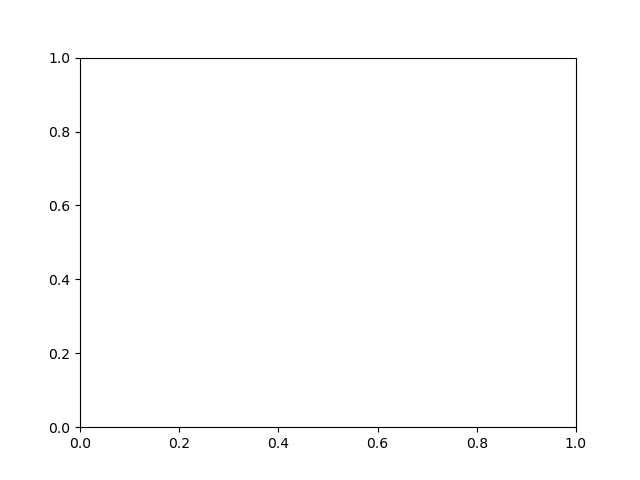

In [49]:
if "repeated_movements_fig" in locals():
    plt.close(repeated_movements_fig)
plt.ion()
repeated_movements_fig = plt.figure()
repeated_movements_ax = repeated_movements_fig.gca()
# repeated_movements_fig, repeated_movements_ax = plt.subplots(1, 2, figsize=[9, 3])

In [181]:
MOVEMENT_ID = "1".zfill(2)

rep_movs_filepath = f"~/user-in-the-box/output/{REP_MOVS_FILENAME}/repeated-movements/movement_{MOVEMENT_ID}/radius_4/state_log.pickle"

rep_movs_data = []
with open(os.path.expanduser(rep_movs_filepath), "rb") as f:
    rep_movs_data = pickle.load(f)

np.where(rep_movs_data["episode_1"]["target_hit"])

(array([ 79, 117]),)

In [50]:
repeated_movements_ax.clear()

###
REP_MOVS_FILENAME = "NegativeExpDistance-neural"

REMOVE_OUTLIERS = True

USE_TARGETBOUND_AS_DIST = False
DWELL_TIME = 0.3  #only used if USE_TARGETBOUND_AS_DIST == False

PLOT_TYPE = "mean_groups"  #"alldata", "boxplot", "mean_groups", "meandata", "density_ID"
BOXPLOT_category = "ID"
BOXPLOT_nbins = 5
BOXPLOT_qbins = True  #whether to use quantile-based bins (i.e., same number of samples per bin) or range-based bins (i.e., same length of each bin interval)

DENSITY_group_nIDbins = 5  #number of ID groups
DENSITY_group_IDbin_ID = 4  #index of ID group (between 0 and DENSITY_group_nIDbins-1) for which a density plot of movement times is created (only used if PLOT_TYPE == "density_ID")
DENSITY_group_nMTbins = 50
###

rep_movs_filepath = f"~/user-in-the-box/output/{REP_MOVS_FILENAME}/repeated-movements"

if PLOT_TYPE != "boxplot":
    BOXPLOT_category = "ID (bits)"  #used for xlabel

# Compute ID and MT pairs from dataset:
distance_list = []
width_list = []
ID_list = []
MT_list = []
target_position_list = []
initial_position_list = []
failed_movements_counter = 0
for EPISODE_ID, data_episode in data.items():
    position_series = data_episode["fingertip_xpos"]
    time_per_step = np.diff(data_episode["timestep"]).mean()  #0.01
#    indices = np.append(np.insert(np.where(data_episode["target_hit"])[0], 0, 0), len(data_episode["target_hit"]))
    indices = np.insert(np.where(data_episode["target_spawned"])[0], 0, 0)
    for last_idx, current_idx, next_idx in list(zip(np.concatenate(([-1], indices[:-1])), indices, indices[1:])):
        #test[idx] = (next_idx - current_idx, data_episode["target_radius"][current_idx])
        width = 2 * data_episode["target_radius"][current_idx]
        # use nominal distance:
        init_val = data_episode["target_position"][last_idx] if last_idx >= 0 else position_series[0]
        if USE_TARGETBOUND_AS_DIST:
            if "inside_target" not in data_episode:  #use "target_radius" column
                assert len(np.unique(data_episode["target_radius"][current_idx + 1:next_idx])) == 1, "ERROR: Target radius changes during movement! Cannot find reliable information about when target has been entered.\nFix dataset or use target center as distance (set 'USE_TARGETBOUND_AS_DIST=False')."
                rel_indices_targetbound = np.where(np.linalg.norm(np.array(position_series[current_idx + 1:next_idx]) - np.array(data_episode["target_position"][current_idx + 1:next_idx]), axis=1) < data_episode["target_radius"][current_idx + 1])[0]
            else:  #use "inside_target" column
                rel_indices_targetbound = np.where(data_episode["inside_target"][current_idx + 1:next_idx])[0]
            if len(rel_indices_targetbound) > 0 :
                targetbound_idx = current_idx + 1 + rel_indices_targetbound[0]
            else:  #movement failed
                failed_movements_counter += 1
                continue
            final_val = position_series[targetbound_idx]
        else:
            final_val = data_episode["target_position"][current_idx] #or position_series[next_idx - 1]
        if isinstance(final_val, tuple) and len(final_val) == 1:
            final_val = final_val[0]
        # # use effective distance:
        # init_val = position_series[current_idx]
        # final_val = position_series[next_idx - 1]
        ######################################
        distance = np.linalg.norm(final_val - init_val)
        fitts_ID = np.log2(2*distance/width)
        width_list.append(width)
        distance_list.append(distance)
        ID_list.append(fitts_ID)
        if USE_TARGETBOUND_AS_DIST:
            MT_list.append((targetbound_idx - current_idx)*time_per_step)
        else:
            MT_list.append((next_idx - current_idx)*time_per_step - DWELL_TIME)
        target_position_list.append(final_val)
        initial_position_list.append(init_val)
# Remove outliers:
movement_indices_TO_DELETE = []
if REMOVE_OUTLIERS:
    # Ensure that too long movements are removed (all movements with duration - mean(duration) > 3 * std(duration))
    #MT_list_zscores = stats.zscore(MT_list)
    #movement_indices_TO_DELETE = np.where(np.abs(stats.zscore(MT_list)) > 3)[0].tolist()
    
    movement_indices_TO_DELETE = np.where(np.array(MT_list) >= 4.0 - DWELL_TIME)[0].tolist()

    distance_list = [val for idx, val in enumerate(distance_list) if idx not in movement_indices_TO_DELETE]
    width_list = [val for idx, val in enumerate(width_list) if idx not in movement_indices_TO_DELETE]
    ID_list = [val for idx, val in enumerate(ID_list) if idx not in movement_indices_TO_DELETE]
    MT_list = [val for idx, val in enumerate(MT_list) if idx not in movement_indices_TO_DELETE]
    target_position_list = [val for idx, val in enumerate(target_position_list) if idx not in movement_indices_TO_DELETE]
    initial_position_list = [val for idx, val in enumerate(initial_position_list) if idx not in movement_indices_TO_DELETE]

add_info = f'{len(movement_indices_TO_DELETE)} outliers were dropped' if movement_indices_TO_DELETE else '', f'{failed_movements_counter} movements failed' if failed_movements_counter else ''
add_info_nonempty = [i for i in add_info if len(i)]
add_info_str = f" ({'; '.join(add_info_nonempty)})" if add_info_nonempty else ""
print(f"INFO: Using {len(ID_list)} movements from {len(data)} episodes{add_info_str}.")

# Linear regression:
poly_coef = np.polyfit(ID_list, MT_list, 1)
p_linreg = np.poly1d(poly_coef)

# Coefficient of determination:
SQE = np.square(np.linalg.norm(p_linreg(ID_list) - np.mean(MT_list)))
SQT = np.square(np.linalg.norm(MT_list - np.mean(MT_list)))
R2 = SQE/SQT
print("Fitts' Law - Coefficient of determination (R^2): {}".format(R2))

if PLOT_TYPE == "boxplot":
    df = pd.DataFrame({"Distance": distance_list, "Width": width_list, "ID": ID_list, "MT": MT_list})
    if BOXPLOT_qbins:
        df_bins = df.groupby([pd.qcut(df[BOXPLOT_category], BOXPLOT_nbins)])["MT"].apply(list)
    else:
        df_bins = df.groupby([pd.cut(df[BOXPLOT_category], BOXPLOT_nbins)])["MT"].apply(list)
    df_bins_renamed = df_bins.rename(lambda x: f"{x.left.round(2)}-{x.right.round(2)}", axis=0)
    repeated_movements_ax.boxplot(df_bins_renamed, labels=df_bins_renamed.index, positions=[x.mid for x in df_bins.index], widths=[0.8*(x.right - x.left) for x in df_bins.index])
    repeated_movements_ax.relim()
    if BOXPLOT_category == "ID":
        lin_regression_x = locals()[f"{BOXPLOT_category}_list"]
        lin_regression_y = p_linreg(ID_list)
        lin_regression_sorted = sorted(zip(lin_regression_x, lin_regression_y))
        lin_regression_x = [x for x, y in lin_regression_sorted]
        lin_regression_y = [y for x, y in lin_regression_sorted]
        repeated_movements_ax.plot(lin_regression_x, lin_regression_y, color="red")
elif PLOT_TYPE == "mean_groups":
    df = pd.DataFrame({"Distance": distance_list, "Width": width_list, "ID": ID_list, "MT": MT_list})
    if BOXPLOT_qbins:
        df_bins_groupby = df.groupby([pd.qcut(df["Distance"], BOXPLOT_nbins), pd.qcut(df["Width"], BOXPLOT_nbins)])["MT"]
    else:
        df_bins_groupby = df.groupby([pd.cut(df["Distance"], BOXPLOT_nbins), pd.cut(df["Width"], BOXPLOT_nbins)])["MT"]
    df_bins = df_bins_groupby.mean()
    df_bins_renamed = df_bins.rename(lambda x: f"{x.left.round(2)}-{x.right.round(2)}", axis=0)
    df_bins_renamed.index = df_bins_renamed.index.map(lambda x: f"D: {x[0]}, W: {x[1]}")
    trans_dict_dist = {number: chr(ord('@')+number+1) for number in range(BOXPLOT_nbins)}
    trans_dict_width = {number: str(number) for number in range(BOXPLOT_nbins)}
    group_identifiers_dist = [(str(trans_dict_dist[idx]), f"D: {value}") for idx, value in enumerate(df_bins.index.get_level_values(0).unique().tolist())]
    group_identifiers_width = [(str(trans_dict_width[idx]), f"W: {value}") for idx, value in enumerate(df_bins.index.get_level_values(1).unique().tolist())]
    group_identifiers = df_bins.index.map(lambda x: "".join([trans_dict_dist[df_bins.index.get_level_values(0).unique().tolist().index(x[0])], trans_dict_width[df_bins.index.get_level_values(1).unique().tolist().index(x[1])]]))
    if BOXPLOT_qbins:
        df["classification"] = [df_bins.index.get_loc((x["Distance"], x["Width"])) for _, x in pd.concat((pd.qcut(df["Distance"], BOXPLOT_nbins), pd.qcut(df["Width"], BOXPLOT_nbins)), axis=1).iterrows()]
    else:
        df["classification"] = [df_bins.index.get_loc((x["Distance"], x["Width"])) for _, x in pd.concat((pd.cut(df["Distance"], BOXPLOT_nbins), pd.cut(df["Width"], BOXPLOT_nbins)), axis=1).iterrows()]
    df_bins = df_bins.reset_index()
    df_bins["ID"] = df_bins.apply(lambda x: pd.Interval(np.log2(2*x["Distance"].left / x["Width"].right), np.log2(2*x["Distance"].right / x["Width"].left)), axis=1)
    df_bins["Average ID"] = df_bins.apply(lambda x: np.log2(2*x["Distance"].mid / x["Width"].mid), axis=1)
    df_bins["Number of Samples"] = df_bins_groupby.size().reset_index(drop=True)
    xtick_offset = 0
    
    ### ONLY SHOW SOME CONDITIONS:
    # df = df.loc[(df["classification"] >= 5) & (df["classification"] < 15)]
    # group_identifiers_dist = group_identifiers_dist[1:3]
    # group_identifiers = group_identifiers[5:15]
    # df_bins = df_bins.iloc[5:15]
    # df_bins_renamed = df_bins_renamed.iloc[5:15]
    # xtick_offset = 5

    repeated_movements_ax.scatter(range(xtick_offset, xtick_offset + len(df_bins_renamed)), df_bins_renamed, color="red")#, positions=[x.mid for x in df_bins.index], widths=[0.8*(x.right - x.left) for x in df_bins.index])
    repeated_movements_ax.scatter(df["classification"], df["MT"], color="blue", s=0.2)
    ## VARIANT 1 - detailed xlabels:
    #repeated_movements_ax.set_xticks(range(len(df_bins_renamed)), df_bins_renamed.index, fontsize=4)
    ## VARIANT 2 - abbreviations as xlabels, additional legend:
    #repeated_movements_ax.set_xticks(df_bins[~df_bins["MT"].isna()].index, df_bins[~df_bins["MT"].isna()].index + 1)
    repeated_movements_ax.set_xticks(df_bins[~df_bins["MT"].isna()].index, group_identifiers[~df_bins["MT"].isna()])
    class MarkerHandler(mpl.legend_handler.HandlerBase):  #source: https://stackoverflow.com/a/47395401
        def create_artists(self, legend, integer, xdescent, ydescent,
                            width, height, fontsize,trans):
            marker_obj = mpl.markers.MarkerStyle(f'${integer}$') #Here you place your integer
            path = marker_obj.get_path().transformed(marker_obj.get_transform())

            path._vertices = np.array(path._vertices)*8 #To make it larger
            patch = mpl.patches.PathPatch(path, color="black", lw=0, transform=trans+mpl.transforms.Affine2D().translate(0, 5.5))
            return [patch]
    repeated_movements_ax.legend([x for x, y in group_identifiers_dist + group_identifiers_width], [y for x,y in group_identifiers_dist + group_identifiers_width], handler_map={str:MarkerHandler()}, handletextpad=0, handlelength=1)#, fontsize=8)
    ################################
    repeated_movements_ax.relim()
elif PLOT_TYPE == "meandata":
    df = pd.DataFrame({"Distance": distance_list, "Width": width_list, "ID": ID_list, "MT": MT_list})
    if BOXPLOT_qbins:
        df_bins_groupby = df.groupby([pd.qcut(df["Distance"], BOXPLOT_nbins), pd.qcut(df["Width"], BOXPLOT_nbins)])["MT"]
    else:
        df_bins_groupby = df.groupby([pd.cut(df["Distance"], BOXPLOT_nbins), pd.cut(df["Width"], BOXPLOT_nbins)])["MT"]        
    df_bins = df_bins_groupby.mean()
    df_bins_renamed = df_bins.rename(lambda x: f"{x.left.round(2)}-{x.right.round(2)}", axis=0)
    df_bins_renamed.index = df_bins_renamed.index.map(lambda x: f"D: {x[0]}, W: {x[1]}")
    df_bins = df_bins.reset_index()
    df_bins["ID"] = df_bins.apply(lambda x: pd.Interval(np.log2(2*x["Distance"].left / x["Width"].right), np.log2(2*x["Distance"].right / x["Width"].left)), axis=1)
    df_bins["Average ID"] = df_bins.apply(lambda x: np.log2(2*x["Distance"].mid / x["Width"].mid), axis=1)
    df_bins["Number of Samples"] = df_bins_groupby.size().reset_index(drop=True)
    
    ### ONLY SHOW SOME CONDITIONS:
#     df_bins = df_bins.iloc[5:15]
#     df_bins_renamed = df_bins_renamed.iloc[5:15]
    
    repeated_movements_ax.scatter(df_bins["Average ID"], df_bins["MT"])
    repeated_movements_ax.plot(df_bins["Average ID"], p_linreg(df_bins["Average ID"]), color="red")
    
    # Coefficient of determination on mean groups:
    ID_list_mean = df_bins.loc[~df_bins["MT"].isna(), "Average ID"]
    MT_list_mean = df_bins.loc[~df_bins["MT"].isna(), "MT"]
    poly_coef_mean = np.polyfit(ID_list_mean, MT_list_mean, 1)
    p_linreg_mean = np.poly1d(poly_coef_mean)
    SQE_mean = np.square(np.linalg.norm(p_linreg_mean(ID_list_mean) - np.mean(MT_list_mean)))
    SQT_mean = np.square(np.linalg.norm(MT_list_mean - np.mean(MT_list_mean)))
    R2_mean = SQE_mean/SQT_mean
    print("Fitts' Law [ON MEAN PER CONDITION] - Coefficient of determination (R^2): {}".format(R2_mean))
elif PLOT_TYPE == "alldata":
    repeated_movements_ax.scatter(ID_list, MT_list)
    repeated_movements_ax.plot(ID_list, p_linreg(ID_list), color="red")
elif PLOT_TYPE == "density_ID":
    df = pd.DataFrame({"Distance": distance_list, "Width": width_list, "ID": ID_list, "MT": MT_list})
    if BOXPLOT_qbins:
        df_bins_ID_helper = pd.qcut(df["ID"], DENSITY_group_nIDbins)
        df_bins_ID_groupby = df.groupby([df_bins_ID_helper])["MT"]
        df_bins_ID = df_bins_ID_groupby.mean()
        df["classification"] = [df_bins_ID.index.get_loc(x) for x in df_bins_ID_helper.values]
    else:
        df_bins_ID_helper = pd.cut(df["ID"], DENSITY_group_nIDbins)
        df_bins_ID_groupby = df.groupby([df_bins_ID_helper])["MT"]
        df_bins_ID = df_bins_ID_groupby.mean()
        df["classification"] = [df_bins_ID.index.get_loc(x) for x in df_bins_ID_helper.values]
    ID_groups = sorted(df_bins_ID_helper.unique())
    df_bins_ID = df_bins_ID.reset_index()
    df_bins_ID["Average ID"] = df_bins_ID.apply(lambda x: x["ID"].mid, axis=1)
    df_bins_ID["Number of Samples"] = df_bins_ID_groupby.size().reset_index(drop=True)

    repeated_movements_ax.hist(df.loc[df["classification"] == DENSITY_group_IDbin_ID, "MT"], DENSITY_group_nMTbins)
else:
    raise NotImplementedError

# # Save the default tick positions, so we can reset them...
# locs = repeated_movements_ax.get_xticks()
# # Reset the xtick locations.
# repeated_movements_ax.set_xticks(locs)

if PLOT_TYPE == "density_ID":
    repeated_movements_ax.set_xlabel("MT (s)")
elif PLOT_TYPE not in ["mean_groups"]:
    repeated_movements_ax.set_xlabel(BOXPLOT_category + (f" bits" if (BOXPLOT_category == "ID") else "")) #"ID (bits)")  
if PLOT_TYPE == "density_ID":
    repeated_movements_ax.set_ylabel("Frequency")    
else:
    repeated_movements_ax.set_ylabel("MT (s)")
if PLOT_TYPE == "meandata":
    repeated_movements_ax.set_title("Fitts' Law on Mean Data ($R^2=${:.4f}; $a=${:.2f}, $b=${:.2f})".format(R2_mean, poly_coef_mean[1], poly_coef_mean[0]), fontsize=14) #fontsize=18)
elif PLOT_TYPE == "density_ID":
    repeated_movements_ax.set_title(f"Movement Time – Density Plot (ID: {ID_groups[DENSITY_group_IDbin_ID]})")
else:
    repeated_movements_ax.set_title("Fitts' Law ($R^2=${:.4f}; $a=${:.2f}, $b=${:.2f})".format(R2, poly_coef[1], poly_coef[0]), fontsize=14) #fontsize=18)

if PLOT_TYPE == "density_ID":
    repeated_movements_fig.savefig(f"plots/{REP_MOVS_FILENAME}/repeated_movs_movement_time_{PLOT_TYPE}group{DENSITY_group_IDbin_ID}.png", dpi=120)
else:
    repeated_movements_fig.savefig(f"plots/{REP_MOVS_FILENAME}/repeated_movs_fittslaw_{PLOT_TYPE}.png", dpi=120)
        

INFO: Using 1000 movements from 100 episodes.
Fitts' Law - Coefficient of determination (R^2): 0.27026559612187456


In [376]:
atest = pd.read_csv("/mnt/external/data/NewExperimentForCHI/U1/20200913-164321_Experiment_U1_Standing_ID_ISO_15_plane.csv")

atest2 = (atest.loc[:, "Target.Position.x":"Target Position.z"].iloc[0:] - atest.loc[0, "Shoulder.Position.x":"Shoulder.Position.z"].tolist()).to_numpy()
#target_array_user = (experiment_info.loc[:, "Target.Position.x":"Target Position.z"].iloc[0:]).to_numpy()
atest2 *= np.array([-1, 1, 1])
atest2 = atest2[:, [2, 0, 1]] #-np.array([0.55, 0, 0.1])
atest2[:13]#.mean(axis=0)

array([[ 5.5000e-01, -1.0000e-01, -1.5000e-01],
       [ 5.5000e-01, -1.3590e-01,  1.4564e-01],
       [ 5.5000e-01, -3.0300e-02, -1.3282e-01],
       [ 5.5000e-01, -1.9947e-01,  1.1228e-01],
       [ 5.5000e-01,  2.3440e-02, -8.5210e-02],
       [ 5.5000e-01, -2.4026e-01,  5.3190e-02],
       [ 5.5000e-01,  4.8900e-02, -1.8080e-02],
       [ 5.5000e-01, -2.4891e-01, -1.8080e-02],
       [ 5.5000e-01,  4.0250e-02,  5.3190e-02],
       [ 5.5000e-01, -2.2345e-01, -8.5210e-02],
       [ 5.5000e-01, -5.4000e-04,  1.1228e-01],
       [ 5.5000e-01, -1.6971e-01, -1.3282e-01],
       [ 5.5000e-01, -6.4110e-02,  1.4564e-01]])

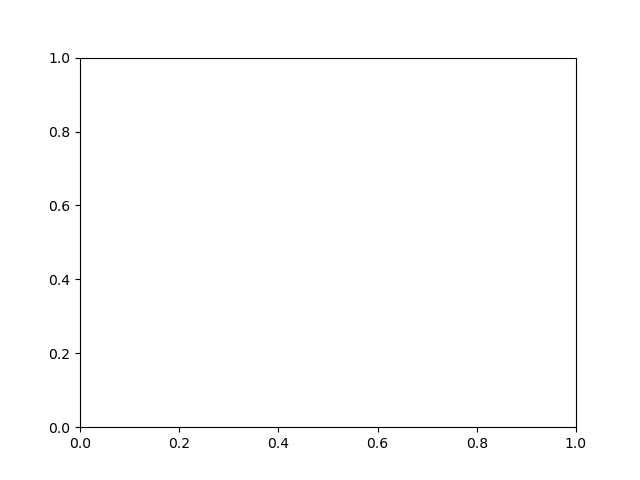

In [191]:
test_figg = plt.figure()
test_axx = test_figg.gca()

In [310]:
test_axx.clear()

test_study_targets = (target_position_series_STUDY[indices_STUDY[:, 0], :])[:, [2, 0, 1]]
test_axx.scatter(-test_study_targets[:13, 1], test_study_targets[:13, 2])
for idx, i in enumerate(test_study_targets[:13, :]):
    test_axx.annotate(indices_STUDY[idx, 3], (-i[1], i[2]))
    
test_simulation_targets = np.squeeze(target_position_series)[[i[1] for i in selected_movements_indices]]#[:, [0, 2, 1]]
test_axx.scatter(-test_simulation_targets[:, 1], test_simulation_targets[:, 2])
for idx, i in enumerate(test_simulation_targets):
    test_axx.annotate((idx+1)%13, (-i[1], i[2]), color="tab:red")

